In [92]:
#Priority Queue - Nirali

class PriorityQueue():
    '''
    An implementation of a (minimum) priority queue
    
    The arguments passed to a PriorityQueue must consist of
    objects than can be compared using <.
    Use a tuple (priority, item) if necessary.
    '''

    def __init__(self):
        self._array = []
        self._counter_bubble = 0
        self._counter_sift = 0
        

    def push(self, obj):
        # append at end and bubble up
        self._array.append( obj )
        n = len(self._array)
        self._bubble_up(n-1)
        
    def pop(self):
        n = len(self._array)
        if n==0:
            return None
        if n==1:
            return self._array.pop()
        
        # replace with last item and sift down:
        obj = self._array[0]
        self._array[0] = self._array.pop()
        self._sift_down(0)
        return obj
    
    def _parent(self, n):
        return (n-1)//2

    def _left_child(self, n):
        return 2*n + 1

    def _right_child(self, n):
        return 2*n + 2

    def _bubble_up(self, index):
        self._counter_bubble += 1
        
        while index>0:
            cur_item = self._array[index]
            parent_idx = self._parent(index)
            parent_item = self._array[parent_idx]
            
            if cur_item < parent_item:
                # swap with parent
                self._array[parent_idx] = cur_item
                self._array[index] = parent_item
                index = parent_idx
                
            else:
                break

    def count_bubble_operations(self):
        return self._counter_bubble
    
        
    def _sift_down(self,index):
        self._counter_sift += 1
        
        n = len(self._array)
        
        while index<n:           
            cur_item = self._array[index]
            lc = self._left_child(index)
            self._counter_sift += 1

            if n <= lc:
                break

            # first set small child to left child:
            small_child_item = self._array[lc]
            small_child_idx = lc
            
            # right exists and is smaller?
            rc = self._right_child(index)
            if rc < n:
                r_item = self._array[rc]
                if r_item < small_child_item:
                    # right child is smaller than left child:
                    small_child_item = r_item
                    small_child_idx = rc
            
            # done: we are smaller than both children:
            if cur_item <= small_child_item:
                break
            
            # swap with smallest child:
            self._array[index] = small_child_item
            self._array[small_child_idx] = cur_item
            
            # continue with smallest child:
            index = small_child_idx
            
    def count_sift_operations(self):
        return self._counter_sift
    
    def size(self):
        return len(self._array)
    
    def is_empty(self):
        return len(self._array) == 0
    
    def show(self, index=0, level=0):
        cur_item = self._array[index]
        print("\t"*level, cur_item)

        n = len(self._array)

        left_child_idx = self._left_child(index)
        if left_child_idx<n:
            self.show(left_child_idx, level+1)

        right_child_idx = self._right_child(index) 
        if right_child_idx<n:  
            self.show(right_child_idx, level+1)
    
    def heapify(self, items):
        """ Take an array of unsorted items and replace the contents
        of this priority queue by them. """
        self._array = []
        for item in items:
            self.push(item)

    def decrease_priority(self, old, new):
        """ replace the item old (assumed in the priority queue)
        by the item new, which is assumed to have a smaller value """
        # replace old by new and we can assume that new will compare smaller
        # (so priority is higher or the value is smaller)
        assert(new <= old)

        for index, item in enumerate(self._array):
            if item==old:
                self._array[index] = new
                self._bubble_up(index)
                break
        

In [101]:
#COMPLEXITY TESTS by COUNTING OPERATIONS - NIRALI 

PQ = PriorityQueue()

import random
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
from scipy import stats

class Count_Complexity():
    
    
    def __init__(self):
        self._siftArray = []
        self._bubbleArray = []
        
        
    def bubbleup_ops(self):
        t1 = [32]
        t5 = [941, 101, 149, 857, 616]
        t10 = [989, 721, 588, 411, 284, 860, 988, 594, 27, 548]
        t20 = [475, 808, 691, 902, 521, 507, 703, 256, 301, 792, 52, 244, 893, 764, 692, 926, 866, 42, 587, 15]
        t50 = [34, 685, 698, 403, 440, 688, 573, 90, 312, 682, 925, 598, 304, 629, 635, 947, 184, 784, 523, 365, 656, 146, 189, 310, 522, 128, 800, 94, 474, 180, 789, 386, 321, 773, 987, 166, 214, 650, 550, 531, 255, 552, 724, 696, 526, 133, 383, 884, 410, 360]
        t100 = [909, 648, 4, 882, 278, 370, 189, 691, 994, 629, 107, 131, 468, 168, 910, 590, 712, 75, 830, 697, 159, 63, 46, 733, 441, 898, 800, 927, 233, 382, 255, 414, 748, 188, 407, 146, 473, 343, 144, 628, 174, 48, 71, 586, 54, 716, 607, 595, 25, 211, 595, 670, 534, 597, 483, 502, 205, 984, 167, 92, 667, 971, 226, 848, 59, 10, 166, 187, 981, 890, 314, 529, 667, 157, 78, 480, 994, 876, 912, 738, 428, 978, 55, 275, 873, 345, 67, 935, 572, 578, 379, 666, 876, 309, 453, 866, 44, 139, 208, 996]
        t200 = [742, 511, 796, 303, 330, 841, 236, 900, 619, 653, 113, 440, 212, 567, 965, 839, 677, 997, 310, 80, 631, 74, 27, 885, 762, 886, 298, 225, 325, 482, 504, 502, 912, 225, 379, 704, 857, 618, 448, 233, 196, 986, 3, 913, 183, 167, 327, 477, 542, 572, 882, 421, 480, 721, 701, 294, 407, 277, 324, 748, 973, 754, 293, 95, 743, 293, 479, 169, 142, 440, 457, 399, 776, 856, 736, 300, 382, 658, 733, 853, 18, 554, 763, 982, 924, 579, 151, 894, 56, 954, 525, 746, 965, 77, 841, 820, 252, 290, 88, 532, 597, 687, 744, 59, 679, 566, 772, 841, 171, 739, 187, 512, 348, 49, 713, 366, 217, 272, 368, 247, 313, 662, 952, 870, 528, 209, 300, 860, 955, 806, 671, 937, 171, 653, 950, 176, 602, 12, 520, 492, 379, 908, 243, 547, 578, 562, 460, 654, 391, 686, 758, 995, 518, 595, 264, 343, 601, 911, 149, 345, 650, 362, 510, 967, 128, 53, 551, 902, 71, 318, 592, 180, 50, 113, 435, 768, 37, 423, 405, 199, 583, 149, 24, 587, 825, 256, 368, 316, 748, 63, 262, 128, 730, 735, 11, 53, 125, 607, 122, 361]
        t500 = [528, 412, 858, 626, 833, 972, 393, 8, 830, 784, 985, 659, 501, 575, 263, 697, 230, 314, 715, 885, 199, 140, 593, 154, 564, 748, 763, 197, 486, 805, 822, 423, 804, 908, 147, 744, 260, 583, 918, 374, 161, 471, 677, 713, 963, 99, 315, 557, 528, 463, 334, 15, 666, 93, 409, 506, 169, 988, 54, 551, 618, 952, 193, 109, 814, 520, 850, 515, 778, 846, 248, 839, 301, 319, 480, 927, 482, 387, 692, 73, 700, 61, 133, 920, 242, 265, 292, 368, 434, 525, 952, 965, 351, 57, 290, 321, 434, 153, 16, 131, 496, 194, 39, 29, 907, 800, 961, 634, 163, 798, 702, 645, 556, 948, 379, 213, 299, 803, 255, 76, 848, 307, 319, 182, 822, 123, 17, 851, 801, 707, 957, 386, 682, 775, 471, 406, 673, 654, 266, 107, 240, 738, 428, 594, 262, 278, 837, 16, 836, 596, 376, 698, 367, 544, 875, 925, 438, 655, 274, 162, 670, 466, 751, 233, 318, 314, 67, 375, 577, 416, 138, 650, 549, 914, 767, 80, 18, 86, 702, 527, 901, 528, 863, 472, 216, 100, 62, 867, 853, 694, 812, 587, 517, 845, 324, 556, 636, 269, 211, 339, 238, 139, 418, 929, 917, 689, 194, 425, 701, 70, 266, 593, 497, 865, 1, 815, 229, 214, 669, 896, 107, 879, 855, 909, 714, 696, 400, 793, 846, 568, 638, 935, 957, 801, 360, 825, 205, 314, 599, 490, 898, 711, 437, 871, 29, 26, 317, 185, 792, 563, 44, 944, 810, 236, 634, 247, 211, 235, 312, 793, 93, 339, 657, 55, 906, 719, 675, 182, 21, 24, 486, 658, 219, 40, 410, 57, 60, 97, 557, 208, 450, 931, 77, 152, 691, 234, 830, 783, 447, 295, 78, 74, 795, 952, 846, 560, 716, 348, 228, 284, 1, 937, 351, 217, 564, 732, 132, 673, 515, 280, 890, 465, 197, 254, 309, 308, 607, 917, 785, 687, 985, 164, 896, 296, 567, 577, 714, 985, 433, 341, 639, 320, 360, 486, 727, 964, 735, 421, 61, 115, 734, 981, 294, 279, 156, 120, 363, 343, 610, 248, 791, 397, 767, 892, 266, 410, 463, 611, 835, 315, 850, 23, 372, 239, 854, 588, 960, 521, 151, 699, 651, 775, 381, 116, 114, 115, 999, 111, 517, 713, 820, 722, 251, 725, 265, 686, 323, 232, 473, 80, 285, 698, 972, 848, 612, 583, 119, 328, 502, 661, 628, 430, 734, 239, 950, 325, 584, 245, 443, 535, 994, 363, 670, 149, 938, 395, 184, 146, 326, 95, 392, 194, 802, 649, 455, 75, 377, 547, 225, 321, 47, 513, 803, 87, 823, 86, 448, 928, 867, 341, 931, 101, 796, 261, 800, 787, 745, 880, 757, 613, 852, 400, 165, 914, 660, 256, 732, 831, 124, 117, 316, 460, 273, 449, 993, 977, 650, 80, 85, 882, 110, 861, 52, 386, 161, 787, 38, 297, 799, 11, 945, 885, 727, 338, 332, 657, 182, 287, 494, 373, 616, 400, 315, 836, 231, 960, 432, 977, 337, 458]
        t1000 = [5, 130, 297, 91, 254, 978, 950, 46, 147, 448, 574, 191, 979, 69, 368, 706, 952, 914, 801, 451, 89, 139, 243, 52, 329, 698, 455, 323, 66, 201, 664, 580, 584, 152, 764, 174, 986, 148, 644, 947, 291, 632, 53, 90, 528, 112, 58, 977, 222, 62, 775, 805, 19, 991, 779, 986, 468, 960, 97, 443, 426, 309, 865, 188, 206, 346, 798, 998, 495, 221, 810, 95, 368, 111, 431, 361, 187, 137, 915, 135, 596, 176, 296, 600, 757, 415, 92, 640, 735, 266, 232, 535, 683, 694, 799, 973, 226, 954, 834, 261, 115, 109, 648, 422, 541, 4, 236, 827, 816, 268, 692, 297, 758, 820, 696, 741, 179, 56, 328, 814, 101, 316, 530, 365, 215, 288, 59, 675, 718, 695, 953, 242, 728, 404, 760, 807, 998, 118, 922, 395, 366, 325, 882, 949, 521, 697, 247, 217, 115, 340, 3, 165, 949, 396, 3, 463, 263, 915, 345, 570, 316, 192, 36, 560, 648, 948, 609, 467, 442, 956, 326, 943, 753, 998, 577, 222, 835, 562, 847, 753, 905, 64, 349, 879, 393, 773, 698, 117, 335, 611, 396, 409, 334, 201, 820, 90, 956, 708, 569, 938, 132, 768, 930, 698, 52, 632, 290, 609, 854, 925, 158, 224, 860, 812, 107, 198, 560, 702, 360, 503, 239, 845, 539, 107, 697, 400, 459, 671, 617, 651, 855, 899, 862, 999, 563, 616, 867, 567, 956, 394, 303, 878, 994, 546, 638, 883, 913, 329, 609, 294, 801, 609, 244, 651, 26, 799, 441, 826, 276, 834, 78, 174, 901, 837, 549, 401, 922, 178, 445, 624, 402, 509, 985, 890, 169, 919, 183, 33, 815, 222, 713, 54, 163, 555, 892, 971, 26, 289, 669, 952, 114, 469, 202, 210, 353, 705, 988, 270, 589, 968, 7, 702, 182, 43, 289, 394, 972, 23, 459, 281, 568, 196, 669, 411, 19, 763, 346, 169, 911, 605, 851, 715, 624, 888, 911, 442, 62, 105, 540, 603, 211, 159, 628, 143, 435, 976, 918, 211, 830, 864, 56, 707, 732, 55, 5, 672, 700, 425, 67, 628, 84, 365, 117, 355, 370, 219, 805, 889, 694, 516, 486, 135, 907, 552, 841, 48, 728, 456, 306, 377, 58, 334, 26, 421, 85, 815, 876, 345, 57, 654, 140, 660, 720, 913, 257, 573, 364, 732, 192, 491, 793, 682, 510, 902, 812, 387, 94, 761, 86, 974, 28, 616, 522, 380, 286, 678, 733, 994, 325, 84, 783, 40, 782, 461, 963, 684, 629, 294, 470, 528, 179, 846, 808, 866, 673, 541, 332, 243, 470, 141, 401, 188, 142, 491, 676, 981, 345, 36, 900, 27, 637, 201, 431, 78, 829, 493, 847, 73, 528, 957, 25, 733, 824, 195, 89, 914, 556, 163, 815, 45, 974, 637, 310, 455, 916, 222, 918, 638, 696, 239, 966, 510, 377, 934, 698, 23, 625, 698, 109, 142, 367, 406, 981, 856, 55, 188, 531, 761, 549, 338, 300, 33, 153, 642, 158, 606, 472, 632, 594, 187, 512, 591, 278, 997, 520, 629, 600, 610, 988, 652, 989, 600, 54, 613, 795, 517, 964, 727, 54, 674, 280, 492, 495, 141, 248, 568, 723, 608, 882, 565, 168, 196, 989, 537, 917, 47, 742, 929, 829, 931, 406, 160, 18, 214, 151, 273, 335, 742, 779, 166, 492, 429, 444, 417, 399, 459, 113, 552, 103, 162, 238, 803, 725, 957, 67, 328, 365, 647, 774, 991, 40, 81, 612, 992, 772, 259, 701, 844, 769, 438, 397, 749, 37, 69, 196, 257, 903, 342, 823, 793, 719, 50, 76, 747, 966, 727, 466, 618, 778, 167, 179, 19, 138, 999, 676, 25, 336, 347, 456, 544, 526, 174, 943, 446, 843, 626, 269, 197, 504, 192, 807, 317, 917, 881, 547, 497, 412, 425, 483, 526, 849, 278, 34, 852, 462, 215, 202, 814, 333, 390, 176, 892, 659, 834, 897, 378, 299, 190, 897, 30, 370, 639, 551, 730, 976, 846, 487, 628, 189, 692, 502, 557, 995, 11, 708, 107, 356, 210, 994, 866, 682, 295, 83, 299, 709, 982, 95, 22, 513, 351, 213, 466, 160, 65, 591, 829, 9, 823, 416, 634, 117, 210, 572, 789, 401, 959, 359, 835, 686, 215, 632, 228, 404, 161, 375, 230, 431, 82, 239, 531, 829, 594, 412, 212, 496, 89, 949, 167, 565, 453, 116, 208, 589, 175, 931, 770, 86, 36, 167, 295, 530, 125, 273, 490, 103, 118, 73, 770, 965, 753, 490, 258, 510, 684, 552, 757, 990, 281, 477, 976, 236, 107, 922, 750, 25, 144, 942, 20, 164, 314, 712, 331, 947, 943, 519, 293, 972, 798, 121, 555, 684, 47, 550, 708, 978, 16, 991, 1, 518, 50, 922, 556, 604, 224, 745, 609, 263, 954, 765, 972, 227, 823, 640, 558, 976, 935, 402, 787, 523, 100, 663, 203, 651, 358, 63, 324, 917, 67, 204, 241, 119, 145, 64, 692, 554, 1000, 778, 71, 227, 119, 99, 950, 108, 401, 413, 685, 844, 875, 683, 432, 815, 762, 466, 432, 695, 305, 742, 765, 81, 739, 55, 473, 979, 980, 579, 267, 937, 44, 237, 368, 446, 930, 125, 637, 406, 891, 487, 306, 942, 218, 818, 402, 859, 953, 254, 998, 515, 637, 865, 358, 995, 349, 647, 374, 502, 593, 246, 294, 11, 47, 112, 607, 611, 450, 753, 434, 799, 340, 961, 943, 403, 912, 229, 299, 320, 195, 702, 282, 248, 173, 736, 443, 577, 987, 458, 34, 344, 258, 330, 412, 385, 705, 899, 614, 31, 658, 317, 304, 116, 852, 807, 761, 616, 447, 945, 58, 980, 524, 611, 764, 344, 795, 913, 865, 412, 724, 343, 639, 317, 26, 254, 592, 225, 695, 408, 256, 473, 371, 771, 1, 84, 774, 804, 386, 222, 631, 318, 253, 129, 197, 894, 869, 770, 844, 429, 559, 367, 444, 395, 609, 90, 233, 149, 596, 158, 323, 793, 164, 266, 296, 188, 907, 759, 326, 625, 951, 160, 806, 134, 918, 794, 289, 7, 173, 608, 166, 383, 689, 517, 9]
        t5000 = [480, 785, 157, 513, 517, 305, 122, 435, 445, 299, 255, 456, 633, 255, 245, 778, 649, 266, 551, 237, 265, 830, 258, 961, 514, 372, 108, 113, 853, 478, 600, 891, 406, 761, 922, 352, 102, 354, 392, 685, 873, 952, 676, 453, 247, 156, 827, 968, 933, 580, 429, 356, 954, 572, 738, 783, 835, 643, 531, 318, 299, 578, 767, 569, 93, 179, 88, 488, 375, 788, 460, 553, 235, 771, 405, 178, 92, 992, 139, 879, 842, 602, 355, 356, 875, 507, 103, 280, 74, 328, 981, 184, 254, 225, 665, 731, 460, 90, 989, 873, 323, 34, 239, 621, 1, 818, 83, 105, 873, 814, 241, 766, 515, 223, 551, 866, 778, 668, 322, 1, 116, 972, 119, 198, 541, 336, 152, 384, 556, 483, 372, 53, 760, 467, 892, 923, 310, 417, 685, 195, 736, 117, 306, 775, 200, 329, 359, 43, 317, 277, 674, 487, 99, 430, 397, 171, 921, 859, 283, 378, 622, 868, 986, 996, 622, 475, 36, 75, 112, 819, 839, 521, 618, 546, 714, 785, 464, 747, 82, 284, 761, 537, 765, 664, 472, 85, 853, 530, 799, 170, 11, 171, 263, 861, 949, 974, 911, 958, 775, 639, 315, 583, 10, 793, 956, 116, 795, 871, 698, 814, 917, 269, 260, 315, 903, 900, 321, 915, 281, 431, 406, 224, 454, 876, 317, 241, 548, 207, 285, 318, 550, 891, 389, 263, 751, 888, 600, 901, 649, 55, 975, 428, 638, 160, 58, 214, 311, 285, 309, 902, 226, 697, 644, 586, 668, 38, 341, 646, 703, 634, 657, 570, 953, 631, 500, 370, 757, 32, 757, 379, 856, 964, 264, 704, 780, 594, 794, 59, 597, 951, 623, 883, 253, 222, 764, 57, 550, 586, 205, 585, 150, 740, 782, 17, 435, 773, 614, 797, 754, 971, 714, 919, 886, 630, 410, 843, 798, 836, 108, 271, 403, 301, 173, 951, 753, 696, 319, 130, 305, 942, 596, 477, 159, 540, 177, 723, 346, 59, 305, 779, 677, 273, 433, 295, 231, 307, 284, 775, 395, 755, 381, 186, 337, 581, 226, 619, 570, 319, 880, 192, 364, 328, 560, 535, 476, 351, 557, 653, 609, 179, 390, 431, 593, 603, 527, 873, 608, 242, 330, 474, 453, 191, 58, 349, 804, 811, 412, 318, 132, 425, 167, 205, 787, 787, 137, 945, 710, 368, 817, 268, 875, 828, 311, 249, 623, 404, 39, 301, 406, 177, 517, 309, 451, 723, 274, 468, 170, 217, 731, 371, 288, 176, 140, 120, 716, 733, 834, 337, 674, 578, 257, 392, 613, 106, 254, 231, 369, 897, 842, 71, 93, 72, 121, 769, 937, 795, 754, 133, 532, 983, 320, 24, 471, 490, 606, 7, 825, 255, 814, 743, 283, 713, 379, 31, 91, 992, 670, 988, 892, 766, 94, 268, 103, 142, 949, 818, 312, 620, 635, 980, 132, 912, 334, 683, 515, 974, 785, 860, 478, 190, 532, 592, 884, 950, 913, 216, 194, 370, 469, 290, 431, 627, 80, 884, 737, 364, 804, 685, 552, 256, 524, 679, 393, 170, 110, 743, 446, 254, 457, 744, 324, 258, 6, 811, 120, 164, 978, 325, 935, 750, 574, 87, 169, 516, 274, 819, 21, 470, 936, 891, 751, 91, 145, 336, 302, 202, 268, 866, 552, 730, 17, 320, 461, 915, 548, 307, 734, 977, 416, 65, 996, 575, 413, 760, 865, 162, 427, 557, 654, 554, 864, 633, 643, 961, 521, 20, 975, 384, 241, 954, 451, 817, 366, 765, 837, 614, 443, 730, 506, 282, 635, 905, 97, 616, 602, 949, 776, 244, 790, 317, 915, 31, 22, 981, 194, 937, 293, 997, 151, 620, 871, 482, 973, 512, 502, 29, 353, 916, 687, 465, 817, 654, 460, 657, 196, 280, 556, 259, 546, 859, 225, 351, 842, 868, 210, 75, 836, 28, 361, 366, 742, 595, 777, 401, 577, 813, 845, 243, 461, 528, 971, 323, 771, 501, 321, 227, 905, 208, 745, 158, 260, 282, 186, 132, 309, 861, 195, 571, 209, 25, 394, 152, 27, 492, 691, 33, 601, 411, 1000, 971, 4, 634, 411, 750, 169, 582, 836, 441, 715, 280, 870, 443, 329, 658, 295, 295, 958, 743, 347, 976, 771, 304, 480, 464, 982, 731, 78, 452, 381, 869, 471, 277, 340, 66, 224, 526, 983, 243, 300, 58, 85, 821, 978, 906, 988, 123, 655, 839, 595, 913, 344, 986, 335, 497, 402, 164, 309, 124, 823, 2, 35, 158, 563, 736, 697, 674, 482, 50, 658, 618, 367, 331, 627, 463, 258, 286, 939, 390, 97, 716, 414, 923, 650, 312, 947, 881, 36, 308, 745, 174, 637, 259, 113, 593, 980, 645, 174, 569, 410, 989, 609, 61, 421, 695, 401, 18, 721, 115, 721, 786, 84, 939, 50, 923, 88, 616, 997, 275, 371, 955, 856, 646, 573, 194, 828, 106, 267, 65, 46, 309, 381, 862, 478, 770, 810, 153, 943, 954, 403, 412, 625, 541, 704, 665, 684, 424, 423, 179, 916, 592, 495, 235, 999, 862, 818, 44, 952, 108, 224, 452, 252, 403, 229, 629, 984, 864, 59, 544, 182, 650, 917, 159, 869, 771, 792, 492, 284, 404, 314, 428, 708, 362, 185, 48, 747, 180, 702, 516, 25, 282, 916, 507, 648, 151, 523, 689, 436, 911, 108, 613, 544, 289, 660, 787, 453, 764, 214, 240, 247, 817, 134, 595, 389, 300, 769, 14, 323, 314, 258, 629, 617, 503, 364, 43, 552, 135, 645, 103, 261, 991, 456, 347, 909, 915, 473, 558, 908, 221, 61, 577, 89, 503, 350, 334, 964, 385, 310, 767, 455, 1, 980, 578, 909, 696, 699, 198, 145, 159, 298, 685, 725, 21, 557, 37, 139, 447, 140, 931, 15, 957, 914, 57, 732, 402, 343, 993, 948, 403, 787, 475, 11, 902, 47, 136, 68, 315, 450, 989, 864, 629, 894, 564, 616, 320, 610, 176, 681, 88, 216, 801, 415, 522, 434, 448, 138, 976, 458, 271, 676, 697, 993, 793, 712, 377, 16, 118, 69, 786, 116, 717, 209, 603, 637, 531, 565, 386, 854, 658, 415, 471, 583, 877, 312, 127, 393, 996, 545, 907, 598, 530, 919, 831, 242, 273, 276, 783, 960, 622, 162, 138, 317, 349, 487, 451, 901, 872, 69, 286, 663, 531, 200, 821, 276, 80, 188, 185, 742, 858, 809, 626, 606, 404, 193, 371, 37, 250, 396, 401, 128, 642, 763, 155, 216, 337, 211, 996, 972, 592, 871, 895, 461, 948, 480, 884, 348, 601, 442, 804, 29, 298, 718, 192, 418, 588, 257, 938, 996, 877, 389, 872, 424, 619, 76, 850, 607, 898, 420, 990, 469, 895, 98, 561, 950, 447, 941, 889, 523, 309, 43, 159, 1, 874, 985, 473, 510, 685, 702, 823, 86, 172, 129, 430, 217, 949, 277, 849, 811, 828, 685, 389, 254, 977, 460, 974, 221, 762, 307, 732, 375, 212, 934, 50, 903, 304, 206, 740, 346, 993, 429, 112, 622, 763, 916, 322, 406, 25, 897, 186, 463, 423, 863, 363, 474, 843, 697, 874, 384, 638, 206, 93, 241, 84, 210, 9, 338, 683, 148, 363, 655, 400, 78, 890, 515, 729, 298, 914, 924, 601, 984, 781, 546, 110, 5, 244, 409, 758, 959, 32, 66, 415, 607, 797, 185, 962, 597, 393, 233, 145, 16, 740, 609, 715, 717, 892, 490, 854, 158, 919, 472, 206, 72, 391, 138, 623, 963, 789, 183, 134, 754, 974, 732, 889, 798, 54, 743, 859, 821, 112, 759, 730, 758, 821, 131, 340, 601, 429, 521, 977, 745, 505, 557, 35, 888, 526, 367, 362, 513, 912, 346, 792, 209, 603, 857, 106, 387, 656, 538, 842, 683, 531, 963, 534, 152, 151, 738, 929, 618, 484, 434, 324, 954, 983, 641, 38, 485, 4, 248, 139, 648, 523, 74, 453, 770, 278, 545, 917, 167, 37, 851, 79, 568, 651, 469, 786, 733, 57, 944, 774, 164, 427, 934, 379, 550, 343, 400, 9, 326, 167, 348, 686, 696, 32, 480, 571, 884, 497, 822, 946, 780, 213, 997, 559, 94, 280, 517, 26, 802, 377, 802, 257, 976, 427, 115, 660, 940, 896, 602, 980, 604, 302, 290, 168, 71, 425, 317, 409, 133, 640, 548, 913, 265, 177, 146, 586, 14, 153, 89, 565, 619, 643, 889, 111, 973, 275, 874, 843, 720, 717, 925, 589, 253, 162, 730, 624, 622, 966, 195, 570, 251, 436, 923, 282, 344, 78, 622, 182, 699, 540, 246, 710, 565, 85, 624, 439, 707, 835, 384, 505, 162, 723, 500, 543, 483, 415, 595, 16, 921, 778, 65, 94, 403, 181, 726, 492, 168, 982, 803, 259, 923, 695, 588, 551, 943, 935, 456, 542, 827, 548, 168, 708, 287, 285, 457, 801, 238, 943, 381, 88, 835, 695, 694, 502, 339, 796, 255, 43, 133, 352, 457, 887, 810, 724, 580, 372, 219, 885, 738, 742, 431, 324, 753, 466, 4, 605, 442, 411, 81, 144, 27, 865, 553, 555, 711, 931, 145, 153, 797, 149, 205, 32, 669, 503, 254, 369, 562, 433, 898, 324, 568, 373, 56, 734, 313, 2, 492, 204, 842, 946, 620, 327, 466, 438, 162, 621, 819, 10, 826, 321, 430, 776, 166, 247, 986, 971, 514, 252, 905, 92, 746, 349, 313, 971, 957, 15, 652, 13, 887, 898, 246, 93, 909, 201, 79, 1000, 478, 813, 66, 607, 815, 328, 655, 630, 583, 416, 967, 332, 337, 551, 419, 586, 635, 380, 187, 684, 824, 97, 720, 693, 134, 217, 259, 651, 985, 387, 860, 312, 155, 275, 36, 220, 830, 966, 134, 134, 842, 18, 169, 352, 142, 946, 849, 485, 62, 80, 445, 744, 449, 673, 503, 769, 951, 705, 336, 681, 517, 394, 667, 836, 5, 133, 81, 975, 171, 859, 274, 981, 148, 735, 982, 928, 214, 33, 546, 377, 209, 848, 275, 388, 191, 980, 586, 618, 823, 768, 356, 805, 718, 182, 15, 595, 37, 491, 528, 966, 791, 170, 364, 53, 136, 103, 912, 552, 141, 241, 336, 89, 217, 508, 319, 655, 579, 865, 510, 38, 86, 9, 858, 516, 965, 236, 436, 215, 492, 679, 816, 953, 801, 74, 489, 607, 899, 431, 292, 828, 977, 674, 806, 423, 314, 932, 982, 958, 317, 961, 627, 513, 965, 675, 718, 179, 783, 599, 202, 777, 915, 64, 237, 181, 354, 424, 754, 269, 589, 225, 991, 280, 733, 334, 458, 422, 500, 956, 273, 420, 616, 168, 126, 619, 519, 749, 750, 341, 521, 837, 643, 916, 844, 473, 17, 687, 967, 466, 31, 791, 573, 400, 887, 221, 429, 877, 717, 331, 704, 300, 111, 408, 634, 832, 506, 58, 293, 636, 405, 823, 172, 778, 133, 625, 862, 793, 556, 276, 973, 8, 494, 361, 100, 889, 890, 774, 801, 157, 656, 460, 909, 800, 185, 467, 445, 550, 644, 744, 720, 577, 842, 635, 752, 609, 496, 132, 438, 84, 786, 933, 699, 541, 267, 396, 156, 41, 434, 831, 403, 583, 370, 574, 731, 49, 220, 830, 407, 859, 245, 235, 632, 290, 45, 868, 27, 698, 580, 511, 636, 744, 807, 896, 616, 693, 273, 41, 323, 892, 601, 788, 701, 877, 993, 252, 646, 349, 406, 362, 238, 480, 480, 429, 766, 231, 414, 832, 420, 671, 561, 359, 988, 814, 8, 115, 254, 235, 169, 882, 596, 914, 59, 889, 331, 6, 757, 252, 954, 357, 238, 339, 413, 739, 768, 86, 94, 998, 555, 160, 992, 620, 934, 144, 582, 198, 82, 47, 737, 531, 649, 860, 318, 911, 197, 788, 151, 504, 467, 383, 514, 339, 885, 270, 741, 493, 201, 696, 153, 240, 288, 423, 924, 540, 780, 753, 579, 299, 964, 388, 674, 134, 401, 394, 231, 187, 828, 312, 876, 603, 169, 473, 985, 285, 702, 441, 70, 99, 293, 986, 170, 869, 105, 989, 635, 625, 544, 745, 908, 342, 135, 234, 198, 956, 976, 908, 209, 787, 909, 770, 435, 806, 65, 474, 623, 939, 94, 457, 916, 506, 114, 137, 657, 13, 870, 178, 279, 185, 404, 119, 268, 91, 948, 198, 626, 543, 508, 147, 980, 988, 18, 901, 315, 878, 451, 500, 499, 751, 204, 532, 632, 183, 14, 484, 854, 673, 155, 673, 347, 930, 967, 466, 661, 661, 780, 271, 48, 359, 578, 110, 987, 152, 583, 411, 366, 206, 231, 919, 364, 934, 645, 164, 833, 740, 953, 644, 630, 768, 562, 76, 481, 119, 824, 581, 434, 257, 892, 337, 622, 977, 838, 554, 777, 951, 883, 181, 856, 205, 782, 602, 399, 188, 841, 949, 340, 84, 355, 811, 114, 413, 795, 723, 663, 140, 618, 557, 449, 320, 527, 257, 938, 963, 249, 238, 671, 39, 451, 468, 152, 240, 424, 104, 630, 496, 374, 983, 547, 1, 460, 587, 846, 574, 199, 257, 904, 923, 901, 222, 824, 619, 76, 326, 20, 205, 631, 887, 94, 185, 181, 217, 154, 141, 536, 265, 277, 273, 270, 594, 438, 54, 354, 1, 213, 942, 725, 169, 613, 498, 647, 681, 541, 791, 368, 224, 154, 150, 637, 672, 963, 555, 748, 255, 989, 931, 956, 809, 822, 205, 432, 625, 762, 273, 47, 280, 312, 977, 38, 312, 445, 446, 288, 129, 568, 326, 717, 993, 15, 594, 908, 9, 234, 933, 620, 714, 729, 703, 529, 475, 252, 922, 636, 819, 369, 194, 500, 14, 89, 1000, 84, 809, 809, 620, 145, 257, 685, 445, 928, 846, 441, 434, 409, 720, 638, 803, 464, 468, 393, 463, 92, 135, 523, 757, 694, 326, 880, 362, 865, 68, 344, 5, 536, 960, 387, 668, 921, 704, 699, 226, 933, 342, 841, 533, 187, 187, 879, 285, 686, 215, 113, 83, 910, 942, 268, 556, 189, 549, 246, 369, 663, 752, 557, 183, 307, 332, 316, 983, 253, 219, 966, 705, 225, 17, 114, 75, 962, 48, 300, 588, 4, 337, 315, 699, 523, 332, 611, 378, 841, 429, 279, 515, 837, 937, 8, 767, 773, 479, 900, 413, 536, 97, 777, 724, 100, 26, 400, 399, 56, 863, 876, 460, 989, 20, 451, 287, 863, 14, 524, 300, 733, 843, 103, 569, 373, 279, 876, 353, 653, 767, 288, 968, 123, 896, 883, 387, 992, 423, 451, 38, 455, 345, 741, 28, 320, 398, 408, 409, 730, 51, 752, 324, 979, 830, 774, 347, 758, 864, 52, 150, 543, 99, 473, 813, 100, 481, 916, 321, 542, 220, 799, 8, 830, 901, 147, 996, 340, 117, 835, 867, 906, 130, 154, 130, 59, 177, 371, 703, 304, 681, 72, 723, 824, 801, 925, 898, 655, 588, 438, 318, 921, 430, 185, 121, 738, 745, 583, 307, 822, 343, 458, 142, 982, 717, 235, 763, 248, 621, 1000, 1, 871, 176, 242, 347, 457, 284, 849, 992, 607, 957, 656, 202, 332, 34, 353, 402, 218, 208, 689, 871, 305, 279, 486, 424, 513, 17, 701, 375, 816, 941, 282, 105, 542, 462, 800, 631, 340, 824, 614, 529, 256, 83, 770, 260, 685, 291, 280, 709, 632, 565, 950, 609, 610, 835, 112, 207, 556, 525, 579, 478, 393, 627, 117, 996, 274, 712, 111, 144, 303, 243, 792, 555, 263, 698, 785, 46, 505, 356, 141, 403, 969, 72, 100, 959, 326, 60, 767, 975, 119, 769, 632, 313, 33, 215, 393, 679, 56, 193, 241, 569, 615, 568, 33, 873, 376, 4, 10, 137, 359, 421, 627, 485, 529, 697, 814, 229, 339, 38, 415, 535, 501, 978, 33, 224, 521, 65, 620, 921, 811, 438, 54, 906, 104, 52, 321, 178, 79, 811, 65, 138, 285, 264, 196, 27, 183, 833, 342, 296, 160, 364, 418, 594, 427, 485, 706, 184, 258, 699, 454, 968, 482, 508, 201, 989, 601, 446, 275, 418, 267, 572, 831, 971, 312, 506, 309, 423, 620, 727, 911, 365, 782, 574, 215, 477, 443, 439, 80, 996, 436, 855, 599, 952, 689, 538, 66, 442, 501, 674, 667, 716, 902, 72, 476, 361, 275, 662, 117, 934, 419, 754, 429, 853, 234, 66, 448, 788, 965, 693, 384, 491, 426, 398, 433, 713, 365, 893, 367, 684, 186, 605, 546, 763, 556, 236, 775, 734, 636, 863, 339, 918, 169, 597, 233, 872, 104, 110, 942, 599, 278, 948, 378, 943, 646, 690, 166, 897, 239, 163, 786, 321, 119, 186, 688, 813, 268, 849, 619, 131, 420, 151, 714, 233, 572, 173, 488, 895, 151, 60, 937, 276, 202, 147, 659, 609, 968, 836, 912, 581, 403, 16, 512, 555, 984, 565, 531, 761, 145, 619, 172, 967, 988, 402, 817, 164, 237, 837, 493, 931, 849, 16, 790, 382, 683, 278, 330, 869, 665, 968, 780, 420, 442, 934, 870, 556, 638, 860, 871, 114, 18, 259, 33, 510, 31, 223, 185, 17, 581, 199, 420, 181, 407, 753, 70, 288, 16, 77, 874, 898, 592, 606, 997, 923, 321, 552, 577, 173, 674, 771, 215, 564, 43, 913, 232, 511, 404, 357, 278, 19, 612, 225, 67, 553, 267, 310, 628, 956, 910, 319, 957, 99, 485, 991, 850, 954, 63, 176, 67, 302, 167, 897, 548, 176, 507, 242, 743, 911, 837, 134, 360, 754, 572, 982, 650, 859, 689, 453, 70, 813, 926, 525, 474, 388, 47, 498, 421, 696, 43, 95, 852, 337, 737, 132, 756, 863, 840, 211, 573, 530, 364, 822, 28, 653, 300, 166, 473, 354, 423, 115, 803, 248, 518, 738, 272, 318, 204, 27, 196, 586, 636, 717, 117, 932, 418, 24, 368, 420, 274, 120, 828, 141, 483, 395, 647, 965, 95, 335, 888, 489, 440, 589, 589, 289, 748, 383, 320, 193, 788, 365, 175, 61, 830, 656, 213, 255, 14, 9, 59, 672, 776, 829, 535, 636, 654, 656, 800, 544, 454, 114, 157, 930, 629, 900, 973, 963, 924, 794, 611, 267, 389, 351, 56, 249, 475, 144, 124, 448, 524, 458, 302, 537, 84, 450, 942, 43, 816, 622, 928, 901, 317, 139, 327, 802, 358, 356, 80, 270, 493, 292, 492, 914, 420, 138, 682, 182, 161, 66, 402, 160, 549, 656, 706, 347, 322, 53, 65, 839, 29, 943, 457, 45, 542, 175, 723, 933, 671, 962, 791, 654, 815, 338, 450, 557, 954, 403, 785, 175, 938, 296, 111, 750, 217, 336, 621, 844, 932, 15, 193, 68, 98, 580, 870, 47, 73, 219, 317, 907, 625, 952, 841, 233, 83, 391, 743, 911, 691, 432, 220, 884, 429, 947, 415, 816, 735, 448, 65, 504, 174, 715, 992, 796, 148, 504, 28, 601, 748, 33, 204, 857, 712, 669, 560, 627, 108, 433, 816, 770, 47, 431, 792, 713, 87, 528, 183, 802, 139, 807, 403, 375, 641, 789, 763, 917, 230, 860, 338, 246, 962, 700, 142, 573, 96, 656, 148, 21, 207, 597, 895, 13, 419, 977, 356, 860, 121, 561, 279, 883, 75, 390, 973, 283, 826, 228, 125, 487, 469, 278, 896, 251, 286, 880, 802, 336, 228, 50, 909, 714, 698, 881, 810, 456, 375, 884, 70, 804, 516, 687, 363, 934, 969, 935, 432, 641, 896, 979, 444, 71, 871, 605, 59, 176, 796, 862, 533, 634, 755, 583, 563, 917, 603, 559, 463, 298, 555, 230, 139, 273, 60, 494, 615, 640, 10, 882, 836, 521, 716, 728, 681, 977, 172, 581, 180, 575, 375, 420, 19, 580, 200, 174, 691, 224, 897, 702, 620, 283, 35, 300, 553, 881, 141, 490, 154, 914, 915, 869, 871, 984, 638, 843, 286, 223, 982, 421, 136, 565, 836, 962, 504, 264, 149, 640, 166, 455, 272, 575, 979, 998, 450, 409, 768, 797, 837, 417, 974, 711, 269, 914, 62, 844, 93, 281, 977, 413, 4, 256, 444, 580, 713, 650, 486, 251, 420, 793, 147, 220, 114, 402, 726, 592, 133, 993, 418, 176, 695, 334, 782, 797, 916, 531, 846, 30, 759, 867, 233, 16, 31, 967, 228, 649, 831, 460, 890, 904, 451, 91, 99, 710, 593, 630, 775, 594, 714, 494, 346, 345, 124, 870, 717, 553, 641, 502, 467, 203, 906, 884, 165, 932, 931, 833, 940, 522, 725, 835, 276, 286, 271, 132, 259, 655, 825, 412, 414, 672, 401, 316, 327, 811, 351, 942, 226, 275, 561, 315, 691, 506, 792, 701, 951, 201, 765, 262, 182, 334, 796, 630, 922, 173, 88, 992, 534, 970, 751, 526, 233, 328, 130, 404, 686, 946, 721, 44, 788, 597, 55, 273, 131, 404, 271, 510, 304, 448, 244, 780, 413, 825, 734, 468, 751, 936, 85, 862, 860, 490, 755, 566, 531, 695, 200, 202, 688, 901, 412, 24, 162, 940, 261, 399, 660, 531, 99, 427, 428, 833, 181, 923, 851, 144, 294, 416, 389, 754, 330, 364, 729, 482, 107, 855, 651, 650, 137, 931, 476, 699, 100, 700, 900, 450, 568, 311, 36, 967, 264, 213, 729, 739, 118, 950, 320, 279, 589, 205, 902, 685, 80, 729, 951, 393, 314, 967, 832, 717, 829, 38, 821, 14, 992, 159, 587, 421, 971, 548, 694, 217, 288, 748, 752, 404, 548, 989, 639, 789, 200, 541, 207, 262, 774, 514, 613, 862, 899, 187, 896, 259, 5, 342, 360, 99, 127, 314, 986, 100, 722, 710, 268, 702, 549, 120, 965, 741, 300, 866, 447, 242, 384, 220, 132, 661, 964, 842, 346, 614, 290, 338, 923, 383, 615, 201, 775, 849, 256, 970, 62, 944, 711, 386, 549, 790, 363, 823, 633, 900, 51, 195, 427, 81, 123, 20, 383, 646, 154, 520, 865, 325, 212, 234, 1000, 876, 51, 141, 79, 501, 433, 859, 375, 332, 542, 798, 348, 489, 71, 224, 805, 219, 307, 106, 796, 80, 864, 826, 418, 835, 260, 704, 335, 884, 29, 536, 246, 260, 220, 273, 439, 815, 949, 793, 766, 230, 711, 999, 496, 589, 87, 478, 412, 970, 369, 949, 567, 647, 449, 197, 166, 234, 639, 391, 379, 934, 242, 103, 709, 40, 546, 268, 500, 460, 249, 895, 266, 407, 372, 446, 281, 256, 678, 838, 54, 450, 527, 378, 604, 222, 989, 38, 230, 374, 233, 474, 909, 767, 284, 551, 86, 64, 896, 904, 869, 10, 261, 256, 214, 579, 967, 433, 187, 311, 597, 698, 763, 819, 126, 146, 354, 68, 316, 968, 52, 983, 867, 750, 4, 393, 375, 442, 307, 469, 696, 940, 400, 115, 271, 523, 757, 499, 596, 738, 984, 399, 432, 657, 464, 487, 167, 503, 792, 256, 879, 258, 329, 275, 984, 808, 526, 362, 715, 233, 161, 628, 220, 370, 88, 37, 560, 876, 573, 666, 448, 297, 722, 843, 905, 830, 912, 219, 163, 408, 211, 207, 746, 462, 809, 608, 986, 694, 73, 231, 309, 899, 176, 497, 733, 945, 11, 337, 680, 299, 295, 360, 391, 860, 933, 463, 990, 165, 880, 408, 617, 215, 391, 784, 400, 806, 768, 766, 520, 604, 262, 700, 827, 258, 863, 451, 348, 350, 752, 698, 296, 834, 501, 670, 886, 620, 521, 613, 619, 304, 688, 239, 513, 35, 840, 651, 684, 244, 688, 368, 401, 161, 467, 913, 674, 888, 179, 791, 379, 157, 426, 663, 563, 511, 90, 78, 219, 565, 745, 89, 873, 221, 188, 555, 805, 178, 219, 661, 937, 81, 72, 664, 288, 148, 156, 829, 73, 975, 472, 422, 852, 341, 255, 405, 713, 244, 237, 707, 717, 574, 214, 768, 902, 495, 981, 114, 888, 352, 49, 930, 434, 507, 693, 833, 884, 775, 740, 41, 333, 401, 63, 409, 547, 610, 830, 606, 688, 491, 16, 118, 414, 284, 538, 82, 642, 439, 49, 883, 900, 720, 478, 270, 2, 559, 465, 742, 80, 800, 883, 133, 764, 195, 908, 866, 452, 241, 687, 393, 371, 521, 480, 66, 137, 591, 232, 487, 583, 70, 516, 434, 575, 795, 197, 175, 353, 157, 866, 350, 142, 559, 163, 98, 672, 915, 580, 945, 711, 416, 251, 916, 534, 129, 597, 89, 483, 58, 906, 713, 814, 286, 994, 880, 812, 630, 252, 782, 643, 459, 483, 30, 195, 158, 785, 838, 304, 888, 181, 496, 457, 561, 511, 266, 956, 752, 269, 836, 354, 491, 497, 703, 275, 687, 867, 61, 711, 21, 370, 260, 456, 214, 882, 319, 202, 386, 955, 115, 575, 774, 554, 48, 817, 519, 945, 997, 739, 519, 949, 223, 22, 862, 56, 64, 816, 410, 971, 202, 638, 877, 565, 626, 54, 58, 355, 940, 719, 947, 944, 229, 802, 308, 976, 185, 53, 120, 631, 815, 539, 269, 1000, 150, 763, 355, 536, 513, 526, 658, 62, 153, 611, 579, 854, 443, 875, 565, 971, 443, 97, 971, 540, 764, 140, 651, 950, 470, 437, 263, 833, 125, 288, 751, 5, 332, 579, 434, 607, 584, 633, 688, 675, 498, 877, 958, 687, 76, 843, 184, 194, 962, 802, 308, 665, 913, 534, 975, 181, 430, 342, 454, 250, 980, 688, 394, 295, 981, 436, 548, 373, 16, 223, 750, 878, 17, 315, 555, 498, 354, 105, 69, 588, 187, 848, 648, 176, 740, 782, 838, 473, 279, 325, 750, 661, 698, 432, 633, 707, 222, 743, 649, 251, 837, 474, 109, 808, 432, 189, 280, 703, 565, 562, 322, 808, 369, 337, 232, 27, 453, 555, 891, 384, 368, 885, 98, 416, 78, 297, 805, 553, 354, 536, 322, 433, 1, 830, 976, 612, 93, 282, 459, 22, 308, 398, 827, 679, 990, 553, 951, 890, 196, 18, 701, 89, 585, 586, 345, 760, 917, 623, 609, 630, 249, 321, 398, 785, 656, 500, 426, 783, 925, 49, 475, 924, 810, 837, 131, 222, 374, 162, 854, 314, 255, 437, 285, 603, 198, 391, 381, 170, 14, 303, 1, 21, 136, 217, 448, 692, 237, 237, 919, 237, 445, 162, 341, 798, 587, 282, 951, 290, 858, 239, 534, 134, 397, 277, 95, 518, 21, 64, 706, 774, 614, 885, 824, 882, 638, 669, 732, 881, 166, 629, 244, 785, 877, 519, 208, 552, 318, 808, 43, 192, 591, 387, 18, 172, 979, 278, 350, 633, 140, 949, 888, 897, 756, 345, 638, 895, 171, 151, 198, 352, 211, 32, 461, 351, 877, 678, 332, 488, 128, 2, 705, 567, 858, 589, 682, 29, 195, 659, 687, 41, 953, 989, 976, 62, 393, 624, 420, 287, 285, 192, 535, 914, 483, 239, 518, 289, 912, 449, 453, 513, 413, 842, 725, 208, 467, 402, 48, 993, 467, 50, 374, 657, 686, 643, 512, 72, 94, 663, 451, 223, 88, 568, 663, 999, 571, 28, 652, 78, 96, 686, 849, 847, 449, 93, 986, 361, 897, 103, 378, 322, 952, 71, 915, 896, 173, 336, 930, 257, 198, 139, 883, 696, 971, 784, 801, 899, 663, 626, 179, 275, 710, 43, 667, 341, 804, 302, 375, 823, 1, 158, 744, 34, 179, 847, 967, 18, 294, 410, 638, 811, 34, 222, 762, 516, 453, 386, 958, 764, 856, 130, 880, 215, 732, 414, 609, 430, 291, 496, 909, 140, 95, 628, 81, 79, 7, 607, 538, 549, 312, 736, 949, 336, 615, 874, 702, 936, 207, 289, 428, 196, 501, 131, 508, 211, 621, 9, 753, 865, 215, 271, 694, 940, 535, 413, 422, 778, 754, 281, 247, 914, 880, 872, 256, 552, 556, 251, 284, 896, 264, 738, 955, 864, 967, 929, 930, 715, 388, 420, 220, 625, 66, 428, 64, 437, 203, 831, 946, 515, 474, 263, 827, 439, 792, 905, 711, 734, 55, 222, 113, 778, 817, 764, 822, 248, 265, 5, 479, 60, 396, 972, 247, 205, 894, 436, 576, 636, 386, 113, 764, 563, 24, 153, 619, 376, 826, 600, 475, 793, 916, 231, 54, 406, 551, 698, 309, 395, 142, 511, 274, 497, 614, 407, 551, 106, 992, 46, 958, 964, 871, 213, 916, 247, 241, 768, 870, 240, 239, 994, 963, 377, 912, 624, 360, 88, 123, 63, 238, 578, 595, 359, 71, 497, 364, 350, 137, 963, 897, 929, 184, 685, 862, 361, 243, 604, 504, 75, 956, 995, 341, 19, 32, 181, 761, 129, 727, 538, 92, 525, 769, 233, 464, 439, 683, 675, 513, 301, 467, 694, 954, 15, 552, 751, 477, 303, 543, 233, 707, 865, 360, 734, 115, 790, 338, 155, 208, 21, 24, 19, 312, 411, 239, 10, 605, 103, 438, 587, 185, 719, 447, 605, 3, 201, 564, 278, 624, 328, 936, 876, 131, 366, 136, 23, 609, 921, 646, 68, 977, 211, 519, 846, 663, 360, 95, 132, 977, 108, 918, 292, 927, 323, 941, 92, 498, 875, 378, 244, 31, 536, 537, 928, 156, 229, 857, 584, 216, 384, 455, 178, 355, 849, 990, 691, 697, 813, 153, 486, 324, 137, 830, 683, 549, 12, 208, 253, 699, 195, 958, 51, 309, 592, 202, 31, 13, 542, 46, 316, 655, 640, 682, 480, 683, 958, 677, 720, 115, 432, 123, 730, 568, 45, 496, 758, 110, 875, 939, 935, 259, 890, 824, 462, 507, 107, 401, 120, 824, 804, 418, 331, 591, 862, 86, 505, 741, 846, 575, 209, 4, 351, 914, 803, 447, 483, 645, 383, 830, 652, 192, 485, 330, 26, 821, 171, 575, 128, 100, 923, 644, 545, 237, 878, 138, 996, 920, 228, 557, 738, 297, 978, 67, 140, 140, 194, 253, 822, 102, 857, 97, 674, 910, 604, 92, 99, 395, 81, 509, 651, 405, 516, 991, 25, 13, 155, 589, 710, 616, 456, 601, 606, 693, 276, 857, 208, 627, 506, 924, 121, 815, 360, 505, 570, 926, 283, 367, 462, 833, 195, 639, 319, 438, 852, 376, 232, 354, 415, 681, 217, 790, 332, 529, 804, 349, 223, 102, 12, 436, 294, 110, 21, 739, 483, 495, 695, 118, 212, 830, 943, 69, 75, 935, 914, 294, 539, 569, 926, 674, 911, 363, 499, 587, 975, 237, 715, 298, 865, 572, 80, 569, 978, 274, 930, 347, 84, 547, 458, 982, 908, 520, 134, 10, 817, 403, 814, 66, 93, 294, 204, 52, 109, 188, 690, 177, 764, 734, 482, 367, 400, 429, 680, 194, 112, 807, 540, 931, 227, 39, 251, 265, 306, 229, 194, 579, 357, 83, 367, 301, 513, 134, 811, 156, 875, 523, 705, 42, 473, 543, 535, 801, 614, 986, 653, 921, 179, 222, 207, 588, 270, 450, 407, 628, 73, 698, 565, 572, 381, 970, 933, 757, 133, 622, 682, 244, 146, 899, 970, 634, 315, 167, 823, 401, 131, 970, 869, 530, 96, 145, 412, 71, 381, 750, 29, 876, 334, 600, 131, 662, 134, 332]
        t10000 = [941, 338, 971, 908, 510, 753, 502, 767, 253, 221, 259, 342, 132, 297, 823, 388, 678, 169, 640, 540, 197, 449, 236, 167, 927, 988, 16, 508, 102, 35, 315, 592, 550, 994, 417, 165, 758, 336, 592, 596, 281, 685, 626, 564, 186, 753, 524, 443, 163, 577, 875, 500, 164, 766, 650, 218, 872, 989, 714, 836, 352, 417, 683, 937, 694, 795, 32, 151, 270, 189, 592, 650, 173, 881, 920, 237, 708, 739, 415, 308, 103, 105, 213, 841, 621, 509, 337, 113, 405, 812, 292, 262, 915, 512, 779, 893, 474, 357, 804, 641, 408, 741, 822, 406, 972, 518, 216, 605, 594, 18, 292, 549, 932, 729, 804, 954, 184, 358, 463, 672, 737, 138, 892, 244, 360, 917, 962, 861, 186, 106, 586, 879, 664, 510, 116, 381, 215, 446, 602, 676, 523, 595, 375, 817, 268, 879, 445, 499, 249, 236, 158, 416, 884, 340, 42, 431, 42, 68, 60, 913, 322, 244, 714, 627, 603, 738, 938, 610, 313, 368, 524, 547, 231, 269, 30, 370, 239, 896, 206, 706, 776, 333, 619, 212, 631, 663, 774, 769, 292, 146, 83, 636, 836, 908, 658, 603, 215, 499, 395, 123, 703, 654, 433, 318, 792, 563, 477, 455, 904, 422, 497, 905, 374, 535, 466, 310, 164, 259, 99, 225, 209, 895, 628, 705, 783, 985, 74, 325, 936, 88, 383, 858, 992, 854, 377, 37, 947, 753, 404, 391, 526, 448, 957, 777, 943, 498, 435, 161, 193, 501, 163, 886, 932, 367, 833, 624, 605, 101, 514, 231, 367, 444, 731, 830, 192, 44, 849, 807, 696, 377, 34, 528, 780, 470, 356, 51, 870, 377, 845, 242, 992, 551, 150, 286, 793, 175, 268, 311, 240, 955, 275, 788, 431, 704, 39, 278, 256, 61, 85, 551, 806, 473, 750, 239, 119, 580, 119, 683, 955, 368, 883, 427, 741, 58, 468, 209, 975, 37, 167, 533, 466, 392, 533, 135, 920, 23, 236, 212, 356, 873, 38, 621, 607, 691, 799, 306, 346, 514, 786, 237, 544, 386, 223, 40, 533, 988, 662, 709, 386, 68, 932, 589, 275, 147, 903, 685, 403, 730, 908, 410, 660, 407, 416, 545, 524, 67, 885, 566, 213, 445, 873, 412, 38, 21, 758, 99, 503, 464, 451, 543, 452, 604, 849, 772, 332, 410, 262, 663, 546, 945, 84, 355, 57, 325, 626, 149, 527, 557, 383, 299, 68, 667, 398, 303, 439, 782, 913, 83, 663, 903, 198, 828, 421, 829, 803, 647, 385, 724, 878, 903, 114, 188, 352, 394, 73, 459, 136, 395, 206, 310, 639, 581, 683, 665, 662, 827, 166, 712, 99, 662, 90, 28, 915, 416, 787, 813, 141, 443, 133, 491, 76, 25, 700, 508, 383, 692, 380, 819, 495, 259, 366, 491, 51, 533, 533, 975, 950, 447, 396, 551, 956, 181, 688, 42, 982, 812, 432, 896, 494, 97, 452, 534, 428, 447, 680, 51, 503, 691, 678, 995, 776, 606, 133, 538, 987, 55, 586, 1, 408, 726, 928, 578, 372, 912, 443, 282, 277, 549, 415, 587, 515, 147, 108, 239, 555, 461, 756, 751, 933, 299, 755, 957, 632, 627, 953, 333, 544, 974, 754, 947, 609, 673, 404, 198, 29, 661, 518, 226, 839, 283, 216, 395, 758, 756, 963, 845, 277, 479, 399, 799, 587, 162, 86, 877, 817, 156, 669, 954, 647, 128, 104, 680, 965, 182, 976, 748, 289, 320, 961, 331, 714, 47, 804, 700, 114, 298, 135, 668, 603, 311, 30, 32, 421, 132, 739, 469, 887, 812, 209, 758, 556, 720, 527, 560, 700, 273, 451, 397, 884, 77, 432, 371, 205, 880, 845, 43, 89, 814, 240, 790, 982, 796, 825, 365, 987, 354, 203, 377, 692, 759, 138, 416, 603, 595, 828, 404, 484, 798, 613, 29, 317, 620, 853, 701, 830, 97, 930, 207, 78, 320, 979, 456, 74, 551, 64, 158, 180, 658, 825, 757, 916, 751, 970, 98, 660, 163, 885, 165, 347, 572, 212, 357, 376, 232, 460, 938, 567, 143, 96, 116, 50, 522, 258, 525, 823, 649, 541, 172, 8, 10, 401, 202, 677, 505, 301, 784, 922, 1000, 46, 317, 441, 152, 723, 876, 860, 590, 420, 716, 733, 932, 78, 132, 302, 413, 542, 642, 911, 80, 642, 697, 931, 262, 530, 170, 713, 774, 882, 399, 828, 435, 134, 497, 816, 670, 521, 975, 301, 331, 804, 808, 614, 687, 884, 76, 699, 242, 678, 660, 980, 42, 954, 302, 161, 886, 905, 197, 739, 539, 23, 603, 400, 972, 533, 370, 252, 733, 998, 622, 837, 386, 718, 983, 328, 8, 940, 24, 805, 208, 257, 368, 471, 928, 457, 491, 340, 904, 112, 842, 274, 161, 990, 818, 800, 374, 458, 89, 522, 172, 856, 533, 187, 765, 48, 31, 551, 906, 738, 76, 352, 574, 252, 278, 478, 48, 852, 920, 101, 72, 130, 253, 178, 723, 740, 487, 355, 122, 180, 252, 516, 610, 49, 611, 373, 952, 59, 7, 163, 14, 156, 477, 283, 137, 1, 247, 658, 696, 408, 998, 290, 357, 180, 451, 756, 200, 555, 706, 413, 249, 314, 207, 734, 112, 275, 861, 211, 103, 453, 16, 404, 305, 782, 564, 566, 940, 527, 915, 868, 403, 331, 255, 213, 458, 270, 283, 829, 124, 321, 649, 296, 64, 732, 247, 953, 245, 307, 518, 898, 105, 396, 230, 959, 77, 237, 834, 51, 776, 604, 302, 162, 510, 919, 100, 74, 116, 401, 467, 513, 169, 149, 535, 418, 434, 618, 204, 18, 339, 856, 758, 110, 920, 302, 564, 133, 121, 582, 64, 790, 164, 800, 397, 78, 624, 383, 594, 936, 876, 70, 593, 635, 626, 961, 474, 470, 33, 724, 507, 57, 238, 657, 36, 181, 316, 429, 735, 36, 94, 913, 353, 774, 878, 670, 366, 268, 418, 982, 466, 214, 618, 160, 543, 760, 147, 181, 929, 577, 802, 904, 903, 186, 873, 584, 216, 314, 341, 720, 283, 213, 251, 125, 188, 222, 324, 706, 371, 369, 258, 18, 688, 591, 410, 651, 812, 371, 881, 96, 208, 537, 380, 567, 557, 925, 221, 685, 563, 405, 414, 238, 82, 118, 998, 240, 607, 128, 960, 263, 500, 970, 792, 173, 211, 356, 554, 218, 861, 874, 552, 9, 426, 787, 517, 804, 501, 5, 408, 629, 606, 163, 433, 602, 709, 12, 294, 272, 620, 687, 514, 447, 915, 466, 590, 303, 464, 694, 53, 387, 714, 906, 672, 280, 944, 776, 447, 236, 103, 564, 512, 224, 306, 475, 747, 922, 570, 576, 107, 578, 489, 174, 787, 55, 156, 424, 408, 348, 764, 523, 702, 920, 214, 117, 161, 762, 177, 8, 46, 511, 363, 496, 217, 637, 150, 866, 309, 595, 236, 673, 879, 361, 845, 698, 183, 873, 994, 965, 293, 373, 796, 488, 179, 53, 317, 460, 783, 498, 709, 930, 328, 162, 301, 444, 963, 668, 670, 909, 888, 233, 743, 508, 223, 276, 813, 868, 187, 49, 652, 209, 839, 115, 183, 931, 194, 928, 559, 409, 261, 239, 492, 991, 280, 955, 521, 677, 620, 116, 510, 543, 386, 401, 299, 232, 689, 729, 770, 114, 346, 107, 951, 894, 830, 990, 72, 226, 893, 50, 504, 916, 893, 663, 320, 671, 308, 713, 205, 46, 508, 562, 337, 270, 456, 850, 170, 25, 528, 426, 418, 201, 821, 224, 798, 388, 160, 718, 714, 267, 450, 735, 291, 635, 281, 297, 917, 310, 523, 252, 107, 824, 822, 86, 637, 659, 235, 206, 685, 612, 484, 204, 502, 242, 115, 22, 900, 731, 819, 571, 128, 47, 59, 522, 287, 713, 274, 959, 926, 783, 121, 245, 778, 98, 978, 529, 944, 927, 584, 422, 57, 750, 26, 628, 686, 313, 231, 869, 805, 773, 963, 967, 868, 665, 590, 828, 231, 453, 943, 101, 258, 963, 64, 351, 339, 420, 322, 928, 769, 508, 921, 575, 283, 493, 926, 784, 62, 531, 496, 847, 381, 582, 276, 9, 434, 765, 923, 557, 209, 466, 118, 131, 670, 330, 584, 419, 321, 853, 16, 831, 855, 174, 498, 505, 788, 681, 145, 898, 632, 932, 821, 442, 592, 208, 413, 546, 712, 84, 944, 293, 696, 934, 876, 756, 340, 769, 408, 689, 461, 538, 698, 478, 364, 84, 923, 78, 524, 448, 440, 380, 263, 728, 123, 133, 112, 394, 151, 471, 296, 16, 884, 889, 349, 875, 335, 798, 605, 630, 139, 295, 691, 423, 148, 930, 760, 562, 829, 921, 627, 685, 423, 655, 244, 790, 604, 75, 540, 828, 782, 61, 955, 329, 476, 389, 777, 462, 770, 969, 511, 114, 129, 914, 514, 153, 200, 929, 478, 742, 109, 750, 62, 385, 626, 2, 205, 218, 492, 695, 694, 382, 369, 163, 846, 192, 999, 674, 902, 969, 711, 404, 462, 866, 561, 216, 408, 81, 979, 162, 66, 54, 4, 628, 966, 284, 500, 405, 618, 982, 836, 776, 991, 519, 267, 907, 620, 262, 770, 37, 455, 452, 932, 111, 599, 469, 846, 697, 920, 152, 193, 261, 217, 939, 158, 449, 555, 24, 637, 897, 725, 278, 825, 961, 227, 832, 460, 775, 599, 378, 114, 82, 742, 564, 450, 635, 351, 659, 406, 856, 326, 904, 41, 158, 634, 654, 254, 485, 130, 134, 593, 994, 995, 398, 149, 166, 25, 94, 429, 432, 834, 616, 531, 161, 551, 50, 693, 816, 229, 998, 932, 437, 335, 575, 126, 117, 319, 216, 197, 452, 407, 507, 540, 453, 779, 740, 26, 755, 938, 871, 976, 140, 310, 333, 228, 856, 405, 964, 274, 198, 557, 842, 335, 757, 499, 636, 782, 263, 385, 159, 511, 704, 163, 947, 73, 509, 180, 181, 289, 335, 558, 997, 642, 870, 172, 175, 888, 435, 831, 592, 104, 673, 226, 167, 728, 117, 209, 371, 794, 849, 933, 729, 115, 600, 928, 955, 71, 166, 36, 55, 316, 560, 745, 665, 533, 775, 958, 511, 16, 495, 691, 502, 846, 738, 279, 734, 30, 902, 122, 517, 826, 312, 528, 437, 752, 980, 919, 591, 33, 272, 207, 264, 3, 218, 305, 56, 12, 699, 415, 820, 123, 963, 375, 330, 61, 497, 81, 160, 212, 719, 543, 952, 80, 524, 271, 785, 884, 261, 131, 805, 661, 580, 350, 203, 584, 390, 648, 189, 815, 37, 127, 980, 703, 971, 226, 155, 646, 833, 585, 84, 221, 82, 192, 547, 950, 889, 10, 914, 660, 916, 752, 311, 201, 439, 273, 351, 689, 39, 330, 999, 699, 154, 164, 94, 378, 169, 718, 737, 504, 584, 856, 901, 472, 643, 748, 620, 3, 112, 398, 491, 106, 45, 234, 767, 351, 712, 833, 642, 970, 956, 536, 603, 839, 564, 157, 389, 197, 992, 148, 499, 984, 477, 447, 539, 163, 482, 995, 432, 83, 836, 647, 772, 902, 844, 37, 894, 477, 285, 713, 803, 363, 183, 491, 719, 698, 659, 649, 309, 205, 173, 567, 197, 454, 821, 389, 519, 572, 243, 405, 480, 837, 108, 239, 831, 680, 397, 638, 729, 464, 524, 589, 635, 451, 973, 832, 404, 242, 705, 570, 413, 454, 770, 950, 75, 349, 328, 175, 743, 232, 918, 287, 445, 789, 73, 364, 324, 444, 429, 706, 697, 238, 113, 19, 209, 193, 102, 626, 130, 455, 638, 341, 411, 585, 887, 48, 263, 84, 475, 5, 400, 649, 519, 150, 147, 954, 835, 487, 420, 891, 155, 75, 496, 188, 142, 943, 837, 517, 673, 946, 359, 954, 391, 507, 350, 967, 64, 758, 155, 863, 241, 743, 806, 441, 732, 292, 382, 789, 261, 658, 636, 952, 31, 274, 413, 209, 778, 54, 228, 412, 459, 23, 102, 739, 654, 278, 577, 271, 703, 889, 284, 910, 837, 954, 151, 86, 989, 514, 502, 593, 682, 790, 375, 498, 466, 85, 352, 182, 728, 127, 701, 695, 953, 466, 553, 419, 636, 124, 400, 354, 111, 928, 237, 680, 606, 15, 388, 583, 368, 895, 181, 631, 932, 54, 168, 492, 944, 479, 610, 388, 904, 404, 521, 864, 769, 501, 894, 636, 845, 305, 606, 300, 153, 39, 218, 810, 617, 945, 604, 206, 367, 394, 649, 390, 726, 956, 273, 51, 500, 458, 276, 480, 807, 863, 870, 629, 816, 776, 628, 35, 983, 652, 746, 970, 805, 325, 244, 421, 902, 744, 97, 378, 497, 635, 871, 98, 99, 903, 642, 188, 970, 66, 684, 990, 23, 66, 195, 448, 916, 994, 736, 548, 965, 83, 865, 68, 543, 726, 893, 345, 47, 117, 173, 458, 413, 49, 737, 411, 1000, 543, 187, 435, 28, 427, 745, 949, 223, 51, 284, 982, 388, 532, 146, 374, 657, 827, 836, 66, 581, 508, 458, 668, 187, 993, 27, 581, 470, 76, 525, 105, 825, 528, 550, 370, 266, 909, 697, 95, 499, 337, 66, 983, 984, 800, 196, 652, 296, 368, 864, 352, 793, 732, 145, 917, 648, 433, 810, 665, 610, 180, 671, 212, 881, 597, 840, 316, 453, 510, 999, 811, 516, 770, 637, 503, 996, 338, 548, 633, 162, 681, 215, 643, 372, 221, 159, 439, 316, 636, 873, 901, 64, 702, 110, 698, 96, 238, 27, 901, 187, 788, 735, 608, 274, 127, 680, 24, 546, 472, 556, 963, 97, 837, 866, 46, 357, 423, 869, 776, 245, 863, 509, 684, 231, 801, 741, 800, 439, 570, 539, 820, 964, 274, 503, 335, 417, 764, 467, 142, 782, 821, 946, 815, 500, 805, 631, 505, 882, 883, 188, 570, 246, 368, 551, 839, 54, 988, 448, 430, 786, 136, 18, 381, 268, 557, 110, 186, 460, 28, 522, 351, 97, 907, 738, 493, 299, 150, 784, 939, 786, 94, 291, 246, 724, 386, 802, 340, 197, 158, 370, 241, 197, 252, 515, 66, 454, 637, 212, 418, 402, 317, 482, 639, 162, 798, 983, 69, 382, 482, 832, 989, 353, 267, 706, 816, 1, 509, 154, 534, 463, 854, 142, 128, 629, 190, 740, 253, 317, 671, 308, 181, 733, 423, 976, 436, 826, 478, 874, 73, 434, 704, 528, 999, 184, 858, 225, 395, 306, 19, 947, 524, 713, 332, 836, 823, 680, 805, 983, 564, 733, 20, 451, 800, 872, 83, 721, 227, 617, 553, 859, 235, 692, 483, 630, 996, 843, 299, 68, 734, 268, 771, 148, 182, 220, 293, 155, 755, 776, 181, 448, 996, 387, 263, 318, 83, 901, 658, 713, 35, 957, 39, 535, 973, 157, 488, 263, 670, 150, 982, 657, 628, 929, 295, 906, 209, 295, 761, 828, 898, 90, 58, 960, 930, 738, 885, 813, 464, 970, 836, 915, 591, 18, 132, 560, 719, 742, 546, 29, 151, 124, 647, 544, 964, 901, 353, 526, 326, 57, 696, 52, 491, 327, 209, 464, 655, 948, 597, 110, 774, 507, 480, 46, 355, 609, 612, 373, 402, 547, 64, 468, 804, 639, 162, 494, 619, 384, 334, 65, 60, 312, 569, 228, 262, 773, 993, 643, 449, 36, 432, 587, 391, 62, 901, 28, 508, 950, 483, 31, 547, 317, 323, 93, 123, 475, 392, 775, 917, 396, 194, 946, 171, 236, 308, 538, 720, 843, 493, 349, 150, 682, 345, 252, 832, 490, 896, 351, 11, 253, 781, 514, 167, 754, 342, 594, 44, 103, 81, 328, 242, 616, 836, 959, 212, 364, 956, 142, 875, 338, 335, 555, 877, 588, 995, 849, 184, 369, 525, 873, 7, 588, 833, 84, 459, 71, 352, 14, 257, 915, 56, 26, 879, 36, 999, 551, 991, 165, 629, 579, 318, 609, 452, 509, 345, 306, 769, 570, 698, 738, 625, 340, 207, 319, 258, 547, 131, 626, 216, 795, 962, 792, 438, 240, 845, 929, 708, 85, 270, 733, 712, 48, 62, 569, 640, 522, 820, 328, 826, 744, 475, 538, 401, 329, 968, 527, 214, 387, 650, 702, 60, 310, 764, 71, 790, 704, 58, 786, 379, 937, 480, 171, 964, 653, 351, 568, 703, 862, 90, 51, 433, 740, 717, 492, 159, 812, 990, 305, 110, 442, 900, 906, 991, 574, 564, 211, 934, 747, 602, 63, 51, 260, 839, 523, 315, 578, 857, 241, 879, 709, 241, 27, 744, 756, 425, 372, 139, 619, 999, 246, 84, 103, 770, 380, 51, 535, 749, 189, 542, 794, 407, 940, 508, 95, 351, 203, 120, 913, 997, 257, 287, 140, 1, 586, 697, 689, 418, 743, 389, 844, 220, 519, 792, 313, 989, 565, 790, 67, 660, 582, 195, 500, 756, 100, 383, 364, 910, 460, 94, 550, 831, 148, 76, 788, 697, 655, 221, 711, 538, 336, 780, 260, 594, 45, 405, 918, 158, 839, 832, 287, 299, 934, 389, 930, 296, 72, 796, 935, 315, 220, 126, 44, 412, 739, 771, 920, 486, 391, 455, 424, 901, 744, 739, 805, 317, 330, 509, 230, 114, 963, 688, 823, 940, 882, 644, 363, 243, 311, 483, 717, 322, 11, 229, 635, 861, 567, 30, 681, 254, 756, 988, 130, 875, 906, 522, 716, 415, 881, 460, 193, 27, 294, 596, 121, 305, 40, 608, 268, 212, 339, 690, 692, 731, 878, 452, 523, 58, 794, 663, 133, 646, 300, 586, 765, 828, 398, 166, 433, 529, 89, 831, 719, 114, 963, 19, 444, 30, 192, 548, 67, 365, 153, 138, 396, 912, 207, 889, 746, 458, 218, 429, 941, 19, 407, 168, 468, 344, 625, 971, 527, 260, 353, 49, 79, 695, 166, 872, 599, 770, 124, 948, 616, 415, 371, 671, 533, 701, 111, 367, 470, 248, 26, 486, 976, 286, 504, 346, 873, 197, 223, 439, 840, 84, 501, 255, 533, 56, 194, 599, 478, 531, 50, 915, 253, 251, 595, 139, 856, 802, 365, 547, 625, 579, 840, 492, 562, 544, 722, 870, 294, 55, 915, 522, 601, 528, 979, 214, 578, 996, 879, 81, 793, 415, 848, 75, 529, 502, 332, 963, 326, 177, 144, 938, 500, 883, 855, 433, 828, 323, 683, 730, 430, 896, 153, 555, 418, 976, 366, 195, 858, 259, 863, 409, 735, 3, 238, 790, 119, 117, 927, 128, 255, 774, 226, 59, 785, 401, 403, 944, 986, 558, 434, 684, 850, 204, 358, 785, 468, 681, 176, 776, 407, 486, 223, 195, 978, 266, 315, 123, 189, 341, 133, 722, 622, 80, 908, 651, 394, 801, 132, 305, 611, 314, 466, 331, 297, 805, 879, 603, 447, 329, 994, 767, 723, 283, 8, 732, 629, 558, 114, 924, 166, 828, 440, 168, 801, 693, 742, 849, 623, 47, 32, 609, 950, 292, 799, 301, 454, 597, 164, 699, 947, 92, 250, 121, 924, 813, 526, 725, 283, 6, 13, 108, 898, 341, 494, 540, 793, 925, 595, 83, 522, 322, 671, 920, 229, 513, 309, 947, 254, 941, 403, 807, 169, 9, 504, 74, 200, 874, 798, 283, 812, 599, 864, 141, 653, 892, 182, 822, 854, 305, 858, 214, 12, 185, 664, 767, 390, 31, 574, 111, 60, 437, 12, 166, 336, 133, 243, 860, 713, 824, 862, 645, 33, 468, 509, 498, 359, 267, 912, 551, 567, 338, 909, 636, 333, 237, 96, 589, 872, 427, 755, 655, 534, 413, 889, 365, 720, 263, 599, 590, 962, 262, 559, 390, 468, 462, 481, 375, 675, 624, 522, 782, 607, 151, 354, 681, 626, 525, 586, 233, 621, 54, 231, 898, 11, 364, 882, 995, 639, 126, 764, 777, 127, 790, 469, 753, 544, 968, 602, 867, 788, 921, 37, 40, 700, 546, 925, 630, 524, 886, 192, 304, 249, 250, 398, 578, 318, 332, 462, 487, 625, 39, 12, 10, 488, 562, 461, 523, 255, 498, 405, 908, 696, 773, 23, 305, 848, 956, 982, 685, 564, 897, 649, 572, 586, 918, 494, 534, 73, 537, 671, 249, 58, 563, 873, 163, 725, 701, 743, 17, 99, 709, 105, 370, 202, 779, 127, 952, 631, 329, 364, 185, 281, 265, 135, 210, 250, 788, 218, 938, 2, 774, 697, 535, 184, 420, 142, 907, 91, 38, 686, 953, 242, 47, 193, 630, 212, 582, 719, 294, 593, 386, 787, 102, 324, 897, 914, 189, 55, 333, 538, 364, 391, 959, 198, 993, 332, 853, 744, 304, 517, 622, 725, 573, 887, 311, 569, 898, 883, 23, 59, 236, 726, 676, 870, 713, 847, 354, 706, 895, 255, 122, 899, 92, 869, 54, 410, 990, 946, 384, 554, 663, 281, 459, 851, 751, 257, 65, 720, 4, 777, 159, 833, 365, 430, 670, 619, 657, 370, 731, 155, 396, 194, 200, 210, 423, 706, 814, 616, 894, 751, 175, 832, 687, 223, 295, 437, 474, 795, 428, 207, 441, 588, 689, 303, 522, 574, 702, 989, 448, 491, 512, 50, 102, 119, 616, 957, 144, 953, 997, 616, 574, 98, 797, 916, 610, 145, 825, 342, 115, 196, 504, 614, 9, 92, 376, 403, 398, 115, 503, 757, 383, 248, 190, 872, 359, 608, 68, 27, 642, 947, 374, 163, 151, 457, 86, 946, 7, 34, 772, 255, 787, 627, 277, 165, 1, 592, 998, 692, 467, 40, 692, 782, 490, 859, 633, 344, 77, 525, 513, 505, 897, 315, 257, 107, 139, 664, 968, 661, 871, 389, 39, 571, 190, 710, 473, 712, 668, 540, 511, 331, 507, 18, 71, 472, 495, 162, 858, 903, 744, 80, 860, 542, 3, 365, 73, 361, 567, 63, 155, 313, 846, 854, 978, 240, 359, 247, 970, 60, 689, 258, 698, 881, 506, 495, 956, 816, 155, 764, 546, 796, 650, 279, 382, 734, 141, 749, 847, 163, 722, 538, 176, 602, 585, 808, 775, 486, 786, 403, 364, 160, 381, 218, 135, 868, 86, 415, 112, 349, 188, 141, 598, 973, 847, 522, 465, 404, 479, 949, 217, 922, 310, 958, 649, 293, 979, 664, 831, 257, 665, 473, 600, 90, 891, 770, 61, 914, 424, 950, 891, 446, 604, 415, 279, 346, 94, 5, 873, 463, 533, 902, 450, 140, 838, 238, 18, 517, 83, 922, 938, 817, 570, 102, 618, 436, 64, 337, 263, 658, 41, 103, 947, 424, 628, 703, 697, 130, 80, 471, 599, 894, 949, 147, 820, 486, 845, 605, 112, 585, 581, 89, 909, 302, 82, 876, 321, 764, 154, 28, 967, 297, 362, 229, 381, 332, 897, 327, 7, 459, 705, 161, 994, 629, 833, 911, 174, 458, 928, 976, 763, 682, 435, 373, 925, 844, 256, 210, 145, 721, 329, 213, 728, 956, 877, 901, 160, 64, 646, 420, 250, 569, 114, 588, 584, 176, 826, 898, 64, 187, 507, 811, 426, 553, 757, 285, 747, 372, 841, 564, 64, 477, 618, 736, 509, 899, 184, 380, 66, 887, 365, 149, 590, 198, 50, 992, 541, 360, 976, 162, 223, 427, 965, 735, 461, 903, 623, 213, 261, 547, 559, 321, 115, 210, 911, 337, 402, 338, 773, 317, 631, 950, 709, 614, 909, 151, 110, 844, 719, 567, 992, 827, 941, 400, 560, 853, 945, 506, 609, 163, 311, 141, 149, 438, 952, 869, 364, 238, 580, 536, 849, 162, 323, 915, 459, 847, 91, 739, 73, 278, 962, 357, 294, 639, 674, 677, 446, 616, 710, 726, 313, 451, 610, 797, 697, 938, 962, 670, 177, 943, 385, 519, 100, 115, 400, 665, 589, 212, 727, 314, 83, 670, 433, 269, 711, 654, 31, 329, 954, 408, 711, 847, 949, 67, 407, 597, 890, 671, 588, 803, 160, 227, 575, 452, 433, 126, 192, 973, 423, 621, 97, 286, 150, 434, 708, 925, 576, 342, 233, 688, 338, 373, 695, 507, 602, 581, 994, 261, 9, 523, 635, 84, 49, 397, 24, 800, 807, 234, 84, 132, 812, 324, 523, 329, 46, 567, 944, 553, 123, 765, 721, 409, 879, 219, 461, 155, 449, 355, 314, 243, 812, 996, 773, 304, 221, 905, 617, 567, 660, 240, 994, 825, 927, 918, 180, 95, 8, 544, 161, 360, 972, 21, 647, 942, 346, 229, 313, 521, 605, 172, 324, 894, 732, 993, 329, 409, 559, 295, 109, 230, 531, 691, 997, 237, 415, 274, 855, 833, 680, 18, 302, 559, 968, 564, 306, 495, 738, 136, 457, 968, 748, 718, 668, 337, 988, 377, 221, 731, 872, 994, 579, 569, 948, 777, 297, 375, 522, 344, 321, 324, 764, 547, 200, 812, 179, 541, 952, 829, 969, 625, 776, 716, 458, 189, 730, 848, 295, 182, 464, 742, 862, 898, 545, 53, 861, 622, 172, 95, 152, 742, 362, 383, 911, 41, 661, 392, 633, 958, 480, 609, 802, 421, 22, 312, 279, 11, 164, 727, 806, 142, 823, 94, 949, 905, 696, 192, 89, 933, 254, 739, 806, 361, 118, 559, 99, 973, 603, 446, 315, 89, 418, 826, 331, 757, 78, 599, 736, 297, 856, 528, 719, 392, 479, 121, 715, 292, 760, 364, 750, 205, 602, 833, 584, 962, 475, 345, 633, 973, 869, 14, 456, 444, 777, 499, 424, 588, 702, 595, 334, 605, 528, 886, 463, 956, 440, 149, 634, 744, 664, 259, 494, 493, 486, 2, 960, 273, 823, 58, 406, 471, 54, 555, 637, 572, 174, 549, 464, 258, 108, 685, 694, 738, 826, 368, 610, 479, 456, 655, 929, 664, 577, 598, 202, 506, 617, 739, 522, 213, 790, 99, 284, 546, 697, 286, 711, 121, 271, 743, 767, 43, 205, 478, 834, 614, 55, 535, 875, 384, 620, 17, 28, 141, 835, 926, 803, 103, 812, 889, 244, 985, 435, 590, 779, 96, 426, 44, 660, 157, 840, 12, 261, 326, 691, 460, 973, 578, 247, 248, 502, 359, 7, 808, 831, 670, 978, 234, 538, 233, 951, 306, 212, 799, 522, 769, 451, 336, 840, 21, 420, 52, 900, 726, 82, 908, 334, 2, 173, 100, 241, 492, 276, 640, 566, 865, 326, 380, 964, 390, 459, 561, 98, 927, 705, 389, 207, 544, 552, 861, 244, 297, 920, 502, 739, 957, 628, 846, 336, 365, 430, 777, 688, 363, 924, 231, 569, 690, 128, 65, 881, 741, 436, 283, 156, 800, 468, 815, 904, 481, 656, 143, 724, 806, 4, 968, 860, 163, 937, 315, 842, 266, 833, 763, 12, 363, 631, 972, 320, 594, 145, 799, 517, 206, 587, 736, 605, 950, 227, 85, 808, 823, 371, 838, 295, 320, 31, 636, 871, 311, 821, 452, 39, 540, 963, 200, 557, 82, 642, 104, 868, 23, 579, 666, 808, 860, 197, 890, 619, 944, 282, 82, 359, 161, 740, 452, 666, 168, 437, 81, 218, 761, 665, 10, 165, 820, 274, 905, 557, 702, 600, 121, 79, 32, 623, 287, 184, 343, 369, 189, 111, 266, 431, 578, 757, 874, 232, 70, 423, 194, 409, 266, 444, 9, 726, 878, 215, 986, 440, 892, 149, 491, 348, 235, 813, 15, 404, 199, 724, 191, 354, 678, 37, 799, 202, 56, 350, 758, 734, 416, 583, 456, 253, 8, 236, 6, 129, 520, 281, 257, 290, 262, 824, 835, 720, 422, 372, 929, 834, 428, 904, 442, 530, 564, 16, 850, 346, 651, 164, 56, 826, 256, 909, 541, 347, 267, 173, 73, 512, 90, 223, 133, 614, 269, 50, 820, 329, 987, 327, 671, 940, 995, 15, 324, 963, 612, 782, 737, 673, 119, 220, 660, 13, 355, 852, 997, 102, 47, 134, 377, 414, 425, 63, 702, 148, 1, 543, 131, 924, 609, 914, 592, 870, 180, 517, 592, 135, 234, 544, 690, 274, 679, 108, 289, 965, 871, 423, 289, 497, 902, 232, 267, 922, 892, 323, 922, 89, 679, 785, 283, 57, 497, 856, 758, 616, 425, 65, 83, 34, 837, 179, 648, 215, 163, 437, 554, 404, 834, 343, 382, 700, 577, 429, 182, 737, 848, 548, 990, 526, 668, 698, 433, 153, 496, 339, 553, 906, 576, 182, 785, 868, 211, 616, 554, 109, 52, 259, 891, 122, 703, 100, 401, 717, 371, 975, 606, 443, 408, 35, 169, 807, 640, 654, 503, 612, 366, 996, 696, 770, 396, 691, 745, 776, 547, 476, 936, 957, 88, 668, 304, 297, 861, 114, 65, 501, 365, 234, 196, 630, 987, 292, 480, 772, 92, 152, 49, 500, 187, 272, 939, 944, 943, 332, 217, 410, 754, 237, 925, 373, 576, 470, 713, 175, 790, 614, 274, 867, 223, 130, 685, 900, 534, 36, 351, 545, 502, 922, 21, 631, 677, 732, 796, 587, 617, 967, 514, 841, 517, 207, 61, 899, 714, 995, 66, 413, 587, 567, 788, 699, 157, 506, 157, 350, 468, 826, 506, 349, 127, 723, 575, 475, 825, 214, 967, 843, 751, 671, 265, 701, 927, 189, 491, 603, 447, 10, 806, 493, 211, 456, 167, 907, 133, 886, 337, 27, 831, 492, 884, 777, 334, 762, 942, 935, 305, 211, 507, 870, 314, 614, 597, 684, 69, 660, 793, 201, 342, 445, 703, 478, 221, 991, 44, 205, 493, 577, 750, 527, 440, 765, 979, 451, 734, 676, 371, 353, 875, 565, 747, 32, 871, 371, 568, 794, 947, 153, 876, 125, 83, 16, 197, 36, 333, 998, 516, 670, 960, 864, 505, 85, 83, 148, 269, 526, 135, 632, 985, 713, 385, 129, 68, 273, 617, 817, 236, 648, 871, 427, 934, 754, 976, 116, 469, 138, 501, 766, 75, 204, 721, 345, 417, 807, 316, 661, 159, 518, 429, 608, 164, 270, 684, 77, 593, 155, 188, 775, 745, 525, 589, 952, 438, 591, 175, 948, 727, 802, 989, 963, 310, 564, 38, 771, 896, 118, 626, 315, 376, 457, 439, 159, 872, 636, 633, 710, 862, 593, 595, 506, 859, 289, 264, 437, 188, 678, 70, 21, 841, 548, 924, 887, 165, 573, 173, 145, 876, 673, 505, 710, 706, 470, 354, 3, 82, 347, 641, 318, 288, 761, 386, 581, 793, 931, 317, 119, 366, 718, 208, 961, 39, 14, 822, 577, 725, 311, 254, 688, 610, 281, 9, 81, 852, 527, 498, 218, 267, 127, 913, 384, 182, 383, 724, 67, 755, 121, 413, 492, 502, 137, 795, 253, 576, 5, 720, 65, 823, 844, 103, 270, 468, 695, 115, 786, 352, 611, 158, 308, 455, 53, 312, 670, 692, 992, 669, 956, 5, 596, 827, 354, 185, 737, 269, 210, 625, 412, 407, 29, 630, 449, 249, 134, 457, 2, 107, 740, 908, 406, 15, 715, 172, 368, 174, 880, 451, 151, 206, 524, 812, 5, 757, 89, 298, 683, 335, 14, 686, 926, 850, 360, 854, 514, 700, 272, 394, 739, 878, 531, 98, 254, 765, 261, 603, 70, 727, 945, 684, 764, 576, 312, 473, 395, 343, 707, 89, 339, 785, 509, 892, 685, 819, 682, 991, 504, 841, 176, 124, 576, 308, 922, 533, 719, 566, 638, 85, 995, 874, 782, 777, 551, 397, 875, 469, 219, 614, 859, 531, 181, 336, 152, 344, 952, 652, 87, 861, 503, 501, 912, 271, 499, 398, 99, 566, 615, 275, 455, 609, 425, 704, 317, 50, 424, 749, 650, 700, 895, 556, 18, 326, 453, 711, 39, 525, 125, 846, 413, 84, 72, 687, 503, 858, 91, 494, 352, 611, 673, 142, 498, 797, 78, 143, 976, 464, 85, 316, 298, 126, 996, 370, 722, 421, 508, 896, 485, 252, 86, 159, 957, 427, 452, 591, 90, 597, 270, 1, 644, 758, 72, 16, 884, 831, 292, 56, 988, 510, 55, 595, 819, 59, 186, 27, 648, 500, 546, 635, 503, 466, 475, 497, 43, 114, 697, 170, 661, 313, 159, 185, 91, 979, 913, 381, 952, 115, 928, 759, 115, 462, 279, 216, 481, 511, 734, 839, 567, 738, 555, 735, 249, 363, 248, 95, 662, 483, 502, 883, 96, 855, 821, 699, 965, 441, 694, 764, 405, 532, 5, 321, 101, 56, 272, 284, 137, 735, 403, 886, 55, 500, 496, 899, 957, 391, 54, 357, 291, 222, 607, 867, 232, 565, 298, 66, 252, 646, 874, 380, 665, 599, 118, 608, 938, 787, 523, 290, 49, 53, 186, 727, 791, 256, 674, 804, 621, 827, 214, 722, 165, 976, 750, 569, 900, 191, 806, 940, 438, 794, 458, 576, 46, 571, 702, 549, 872, 897, 345, 494, 856, 644, 11, 652, 495, 937, 932, 216, 403, 286, 798, 541, 875, 34, 930, 429, 6, 130, 24, 254, 479, 781, 351, 564, 341, 863, 680, 193, 185, 563, 468, 906, 781, 187, 526, 550, 19, 419, 967, 929, 479, 22, 883, 122, 543, 430, 960, 623, 588, 400, 809, 691, 381, 379, 441, 794, 9, 647, 588, 25, 467, 752, 143, 351, 767, 41, 427, 381, 153, 183, 723, 839, 116, 235, 308, 510, 2, 887, 531, 564, 501, 930, 656, 946, 199, 48, 827, 118, 147, 682, 353, 914, 785, 77, 107, 271, 117, 46, 187, 583, 913, 2, 747, 767, 429, 552, 364, 650, 430, 34, 495, 15, 714, 253, 154, 311, 452, 609, 873, 781, 607, 495, 242, 40, 623, 777, 189, 306, 991, 537, 101, 548, 970, 626, 707, 688, 184, 764, 441, 200, 281, 2, 919, 669, 636, 209, 594, 596, 380, 971, 105, 159, 534, 79, 676, 61, 989, 768, 565, 136, 640, 166, 601, 95, 758, 20, 309, 120, 287, 931, 473, 498, 899, 610, 679, 960, 790, 18, 165, 521, 36, 225, 36, 757, 428, 666, 502, 137, 2, 780, 198, 737, 524, 819, 413, 481, 45, 70, 460, 62, 185, 662, 693, 985, 549, 56, 913, 474, 437, 192, 732, 27, 627, 318, 499, 891, 285, 442, 5, 575, 257, 611, 841, 128, 305, 318, 640, 484, 501, 230, 316, 747, 688, 44, 283, 139, 75, 93, 175, 950, 163, 305, 370, 764, 798, 111, 661, 313, 343, 111, 955, 222, 496, 307, 916, 519, 358, 141, 1000, 784, 134, 8, 513, 612, 927, 760, 164, 369, 316, 22, 644, 116, 954, 118, 395, 87, 458, 345, 67, 961, 642, 698, 197, 442, 611, 664, 75, 924, 443, 267, 745, 427, 392, 358, 944, 366, 714, 280, 788, 899, 487, 244, 264, 55, 76, 350, 688, 219, 106, 488, 845, 640, 661, 473, 233, 187, 615, 543, 74, 290, 847, 819, 163, 689, 795, 430, 448, 3, 959, 939, 116, 923, 284, 509, 508, 623, 281, 238, 766, 873, 20, 263, 248, 373, 950, 839, 469, 324, 379, 841, 926, 860, 778, 720, 862, 86, 437, 647, 892, 337, 759, 796, 231, 4, 880, 880, 768, 173, 113, 130, 269, 80, 321, 983, 817, 466, 852, 151, 15, 869, 551, 480, 871, 997, 397, 409, 901, 365, 302, 366, 25, 493, 215, 28, 943, 169, 45, 294, 596, 777, 155, 707, 204, 565, 290, 693, 639, 343, 948, 807, 826, 415, 478, 965, 23, 444, 477, 903, 885, 86, 844, 211, 277, 550, 935, 607, 121, 457, 684, 478, 129, 658, 888, 226, 501, 297, 73, 298, 737, 163, 485, 555, 926, 455, 726, 767, 478, 668, 5, 688, 24, 619, 541, 533, 182, 27, 839, 317, 483, 908, 610, 787, 82, 52, 141, 764, 680, 768, 597, 597, 311, 174, 393, 729, 775, 756, 149, 146, 846, 333, 749, 906, 37, 222, 634, 192, 988, 481, 977, 210, 229, 741, 202, 864, 406, 675, 460, 155, 92, 319, 602, 698, 65, 327, 25, 450, 956, 639, 470, 413, 102, 482, 280, 567, 608, 489, 386, 184, 529, 792, 263, 175, 716, 495, 687, 127, 540, 940, 286, 886, 682, 279, 525, 402, 318, 56, 836, 841, 123, 341, 633, 305, 32, 395, 582, 411, 263, 742, 799, 949, 42, 281, 253, 447, 802, 241, 711, 139, 533, 399, 616, 986, 188, 925, 48, 938, 627, 870, 25, 438, 715, 524, 643, 779, 512, 917, 369, 338, 267, 613, 222, 764, 155, 865, 524, 48, 822, 788, 627, 579, 165, 734, 609, 547, 407, 467, 635, 299, 202, 345, 225, 690, 640, 565, 201, 741, 827, 56, 304, 557, 23, 164, 795, 833, 666, 718, 836, 775, 623, 529, 492, 504, 759, 952, 877, 655, 71, 82, 438, 41, 89, 813, 857, 586, 112, 923, 430, 606, 190, 547, 857, 530, 40, 514, 113, 605, 1000, 831, 681, 170, 505, 71, 936, 140, 647, 976, 651, 612, 549, 668, 500, 729, 444, 469, 508, 597, 35, 691, 44, 234, 753, 495, 689, 223, 953, 502, 366, 626, 464, 134, 218, 606, 178, 327, 665, 454, 726, 975, 809, 108, 230, 341, 359, 978, 968, 852, 626, 618, 683, 252, 306, 658, 485, 473, 780, 329, 93, 56, 638, 327, 576, 526, 626, 280, 699, 790, 726, 879, 627, 74, 573, 215, 668, 356, 445, 796, 523, 649, 765, 114, 401, 347, 717, 675, 389, 932, 85, 42, 899, 203, 506, 966, 804, 556, 673, 87, 902, 137, 449, 369, 621, 155, 329, 212, 594, 582, 602, 703, 862, 286, 965, 672, 436, 333, 496, 447, 527, 254, 581, 802, 781, 656, 373, 362, 247, 983, 389, 508, 227, 455, 810, 67, 717, 132, 464, 148, 583, 887, 335, 15, 684, 519, 305, 551, 626, 451, 715, 930, 372, 347, 750, 146, 172, 751, 118, 864, 957, 23, 435, 291, 382, 280, 807, 459, 977, 699, 426, 327, 533, 427, 372, 429, 175, 772, 237, 825, 58, 277, 468, 177, 359, 480, 611, 143, 350, 443, 590, 704, 490, 508, 608, 676, 517, 540, 47, 8, 556, 870, 298, 714, 661, 611, 70, 45, 103, 762, 377, 385, 65, 256, 859, 2, 865, 826, 702, 765, 850, 904, 603, 188, 931, 901, 953, 905, 829, 222, 496, 118, 490, 297, 90, 560, 588, 183, 537, 523, 454, 753, 201, 117, 124, 334, 184, 798, 135, 729, 675, 829, 22, 832, 738, 559, 502, 997, 261, 361, 576, 913, 878, 362, 607, 854, 808, 805, 860, 251, 788, 334, 815, 213, 668, 759, 665, 417, 933, 288, 295, 82, 727, 875, 724, 260, 301, 531, 483, 718, 639, 279, 728, 587, 76, 988, 304, 722, 566, 503, 926, 205, 475, 815, 760, 36, 148, 727, 51, 146, 102, 118, 928, 724, 638, 707, 291, 699, 908, 306, 186, 261, 293, 832, 365, 36, 15, 194, 368, 754, 931, 630, 399, 649, 819, 594, 163, 2, 293, 79, 337, 566, 462, 342, 686, 364, 214, 210, 348, 863, 50, 239, 352, 340, 743, 514, 607, 723, 338, 294, 373, 398, 7, 585, 575, 34, 768, 877, 97, 478, 918, 381, 651, 107, 599, 803, 213, 148, 471, 679, 524, 269, 288, 372, 628, 515, 604, 891, 338, 420, 902, 793, 597, 884, 156, 687, 164, 226, 861, 487, 216, 163, 428, 395, 60, 285, 751, 306, 699, 705, 340, 317, 161, 216, 5, 204, 957, 878, 203, 89, 363, 41, 484, 738, 455, 674, 8, 116, 736, 485, 744, 392, 735, 389, 896, 153, 292, 409, 648, 819, 328, 790, 708, 395, 596, 495, 241, 242, 266, 290, 250, 988, 425, 203, 743, 843, 611, 574, 532, 509, 688, 33, 107, 141, 990, 405, 788, 26, 232, 729, 633, 220, 961, 258, 425, 888, 160, 126, 794, 89, 965, 704, 25, 186, 480, 255, 803, 633, 566, 634, 301, 297, 976, 902, 246, 895, 179, 960, 315, 112, 464, 14, 891, 110, 269, 899, 426, 268, 802, 188, 384, 791, 528, 828, 135, 797, 849, 817, 872, 211, 445, 357, 873, 775, 801, 198, 405, 392, 839, 13, 362, 56, 375, 199, 691, 97, 157, 745, 100, 155, 329, 829, 270, 30, 551, 73, 876, 88, 790, 428, 869, 573, 830, 973, 971, 401, 584, 127, 545, 215, 586, 439, 179, 206, 841, 110, 103, 382, 773, 71, 172, 375, 123, 39, 85, 219, 629, 546, 415, 241, 38, 806, 172, 829, 713, 688, 270, 564, 771, 265, 80, 682, 652, 881, 96, 471, 300, 733, 507, 834, 344, 20, 749, 197, 151, 527, 792, 681, 736, 328, 296, 824, 445, 820, 257, 533, 563, 306, 196, 505, 438, 583, 840, 96, 312, 868, 318, 904, 945, 194, 878, 970, 685, 620, 237, 510, 64, 992, 497, 576, 437, 590, 926, 293, 437, 393, 239, 168, 660, 829, 141, 21, 132, 520, 695, 119, 121, 843, 699, 561, 771, 632, 649, 36, 522, 642, 918, 32, 596, 349, 885, 704, 565, 309, 126, 920, 943, 372, 698, 243, 178, 456, 39, 798, 281, 149, 569, 261, 772, 642, 79, 752, 470, 871, 418, 389, 430, 597, 591, 302, 194, 709, 331, 823, 286, 442, 547, 468, 210, 383, 489, 505, 96, 541, 53, 353, 304, 884, 194, 271, 751, 983, 170, 984, 997, 536, 151, 385, 392, 24, 889, 289, 416, 965, 217, 360, 487, 19, 846, 987, 687, 903, 803, 73, 536, 456, 53, 872, 360, 679, 6, 4, 911, 751, 933, 142, 896, 106, 807, 550, 930, 629, 411, 78, 371, 58, 299, 308, 541, 483, 559, 85, 193, 319, 454, 683, 698, 52, 910, 277, 91, 26, 827, 699, 219, 663, 964, 164, 370, 533, 291, 643, 674, 257, 354, 832, 967, 356, 732, 44, 708, 310, 121, 275, 901, 617, 490, 955, 250, 602, 710, 295, 850, 163, 727, 748, 561, 521, 849, 262, 593, 840, 718, 593, 70, 567, 499, 100, 140, 727, 810, 710, 957, 839, 702, 472, 974, 823, 462, 181, 327, 681, 172, 611, 509, 469, 410, 927, 746, 933, 502, 629, 974, 137, 191, 112, 877, 283, 312, 530, 138, 25, 16, 320, 109, 660, 351, 53, 129, 232, 630, 305, 868, 499, 269, 784, 871, 207, 217, 624, 679, 278, 536, 927, 545, 797, 242, 903, 469, 192, 143, 973, 316, 604, 790, 228, 594, 454, 436, 293, 898, 493, 302, 428, 169, 690, 13, 70, 407, 185, 654, 112, 68, 189, 889, 161, 535, 306, 127, 625, 241, 446, 132, 623, 52, 738, 182, 748, 166, 210, 317, 502, 63, 247, 449, 644, 126, 794, 711, 846, 497, 353, 762, 942, 324, 516, 921, 557, 900, 893, 468, 513, 754, 736, 706, 211, 683, 392, 430, 91, 296, 916, 209, 380, 452, 522, 233, 993, 910, 831, 312, 783, 44, 641, 827, 135, 117, 386, 51, 620, 410, 575, 161, 420, 107, 58, 362, 84, 541, 158, 794, 177, 71, 343, 937, 88, 953, 189, 954, 24, 985, 135, 525, 920, 789, 64, 681, 433, 942, 300, 356, 392, 925, 547, 778, 224, 166, 433, 903, 818, 6, 624, 910, 691, 406, 838, 600, 238, 120, 358, 205, 537, 337, 711, 9, 84, 487, 978, 269, 432, 541, 252, 720, 483, 839, 154, 278, 200, 133, 205, 584, 932, 811, 832, 910, 942, 570, 872, 805, 859, 411, 431, 235, 566, 892, 343, 502, 4, 649, 210, 709, 636, 970, 749, 240, 879, 511, 980, 444, 974, 433, 793, 701, 873, 201, 668, 727, 91, 262, 599, 110, 844, 682, 831, 544, 525, 352, 65, 525, 670, 185, 596, 830, 301, 784, 355, 675, 206, 432, 738, 211, 200, 737, 963, 770, 473, 984, 686, 972, 447, 994, 601, 948, 116, 371, 544, 655, 359, 50, 834, 816, 72, 60, 975, 308, 24, 747, 839, 886, 8, 878, 921, 948, 66, 720, 669, 866, 228, 257, 545, 93, 440, 934, 922, 414, 242, 759, 54, 943, 218, 528, 522, 648, 443, 660, 990, 436, 342, 90, 231, 585, 223, 759, 253, 823, 614, 50, 607, 776, 293, 221, 164, 583, 69, 131, 251, 214, 588, 587, 521, 525, 343, 380, 132, 770, 772, 535, 839, 377, 379, 380, 27, 254, 1, 620, 773, 199, 391, 5, 600, 896, 359, 243, 132, 516, 481, 778, 857, 958, 913, 961, 395, 190, 133, 287, 440, 35, 636, 518, 596, 857, 23, 333, 507, 53, 27, 211, 928, 287, 58, 826, 77, 957, 593, 11, 366, 173, 353, 265, 371, 35, 767, 836, 499, 971, 78, 151, 688, 875, 613, 210, 787, 94, 276, 666, 97, 803, 412, 442, 505, 604, 507, 702, 724, 249, 647, 961, 501, 794, 703, 492, 541, 228, 790, 952, 164, 647, 779, 814, 190, 333, 984, 254, 465, 638, 855, 684, 575, 50, 523, 687, 456, 24, 632, 760, 179, 964, 527, 504, 6, 517, 203, 478, 801, 798, 916, 105, 626, 32, 45, 105, 824, 255, 855, 439, 88, 813, 384, 944, 116, 659, 498, 499, 570, 436, 28, 253, 348, 722, 550, 96, 294, 24, 235, 83, 454, 209, 885, 447, 400, 581, 906, 581, 308, 9, 793, 105, 687, 213, 597, 106, 547, 632, 467, 833, 828, 638, 48, 66, 338, 349, 940, 620, 195, 688, 227, 907, 483, 559, 32, 619, 249, 93, 160, 175, 542, 392, 331, 678, 607, 620, 22, 100, 224, 930, 232, 437, 744, 690, 887, 729, 964, 632, 65, 841, 771, 794, 823, 900, 958, 425, 65, 934, 536, 231, 756, 680, 252, 788, 990, 811, 143, 604, 535, 838, 6, 216, 214, 290, 242, 681, 878, 585, 566, 447, 4, 312, 776, 782, 78, 608, 628, 441, 825, 769, 828, 304, 5, 76, 922, 930, 995, 384, 500, 74, 699, 75, 903, 838, 627, 496, 2, 123, 62, 954, 216, 96, 624, 726, 93, 25, 446, 772, 947, 207, 788, 800, 738, 729, 623, 154, 311, 218, 419, 660, 192, 66, 871, 749, 990, 486, 295, 419, 553, 382, 809, 186, 408, 800, 814, 960, 768, 361, 372, 996, 846, 408, 978, 413, 756, 305, 741, 770, 110, 351, 518, 402, 454, 689, 117, 612, 441, 338, 370, 601, 160, 226, 439, 530, 232, 359, 80, 221, 309, 543, 215, 570, 155, 598, 40, 422, 44, 218, 627, 178, 96, 8, 863, 865, 146, 953, 306, 823, 505, 565, 484, 516, 371, 825, 146, 958, 404, 581, 379, 154, 503, 229, 940, 858, 325, 142, 742, 333, 103, 897, 667, 834, 59, 657, 719, 616, 150, 457, 152, 464, 537, 490, 28, 938, 978, 16, 601, 887, 283, 865, 704, 794, 238, 183, 535, 752, 397, 199, 807, 784, 761, 288, 827, 396, 973, 299, 144, 103, 28, 543, 602, 748, 686, 188, 413, 41, 229, 811, 967, 287, 247, 452, 810, 859, 121, 632, 246, 779, 880, 271, 65, 640, 828, 176, 438, 692, 98, 326, 110, 947, 658, 946, 450, 910, 584, 787, 578, 525, 224, 570, 570, 845, 848, 490, 901, 215, 403, 145, 302, 166, 335, 606, 673, 361, 296, 436, 368, 573, 208, 681, 454, 650, 261, 243, 228, 354, 501, 411, 371, 725, 68, 601, 122, 870, 994, 570, 459, 143, 936, 122, 981, 315, 712, 901, 855, 189, 59, 458, 360, 798, 851, 622, 124, 54, 132, 485, 951, 84, 365, 625, 749, 73, 217, 960, 314, 760, 566, 686, 901, 490, 837, 32, 911, 334, 108, 284, 663, 890, 138, 591, 705, 447, 145, 848, 926, 130, 125, 470, 436, 937, 511, 42, 608, 427, 388, 384, 149, 806, 870, 70, 482, 808, 81, 716, 176, 851, 673, 251, 69, 393, 95, 503, 122, 607, 533, 502, 653, 972, 792, 758, 224, 894, 451, 427, 371, 234, 755, 58, 128, 537, 817, 492, 828, 445, 546, 38, 252, 627, 552, 497, 295, 888, 203, 679, 117, 481, 24, 457, 950, 989, 583, 940, 655, 826, 724, 927, 695, 369, 345, 62, 507, 482, 428, 84, 341, 602, 742, 423, 878, 149, 683, 432, 891, 602, 875, 537, 206, 769, 567, 252, 888, 75, 390, 250, 865, 508, 85, 359, 916, 328, 22, 597, 237, 593, 78, 568, 96, 956, 971, 160, 519, 573, 459, 766, 292, 756, 928, 945, 761, 87, 586, 479, 945, 923, 631, 803, 437, 726, 400, 369, 676, 888, 505, 405, 706, 30, 98, 283, 464, 462, 245, 584, 77, 779, 747, 134, 604, 37, 7, 50, 295, 703, 869, 411, 299, 699, 722, 75, 449, 526, 819, 123, 16, 327, 40, 790, 826, 379, 109, 315, 608, 456, 780, 474, 678, 688, 403, 381, 112, 418, 625, 400, 68, 420, 418, 745, 226, 794, 683, 244, 522, 167, 187, 163, 896, 720, 706, 756, 153, 592, 615, 325, 788, 996, 800, 974, 395, 492, 92, 472, 289, 299, 671, 633, 166, 596, 97, 215, 216, 102, 35, 372, 887, 821, 728, 961, 800, 516, 780, 706, 89, 995, 52, 475, 949, 834, 445, 976, 436, 655, 364, 436, 422, 581, 405, 335, 320, 957, 290, 544, 4, 942, 272, 931, 169, 8, 899, 899, 607, 590, 912, 800, 728, 850, 596, 15, 114, 58, 739, 917, 178, 290, 390, 446, 759, 340, 676, 316, 722, 727, 974, 123, 487, 784, 727, 194, 990, 588, 386, 875, 697, 664, 1000, 705, 682, 523, 97, 300, 316, 892, 123, 108, 54, 13, 162, 332, 672, 609, 853, 809, 960, 504, 905, 778, 35, 989, 23, 988, 925, 502, 554, 950, 463, 76, 397, 33, 10, 35, 204, 499, 974, 955, 838, 750, 804, 112, 87, 604, 122, 717, 522, 64, 729, 662, 704, 874, 788, 622, 415, 903, 274, 545, 145, 561, 510, 816, 890, 805, 472, 972, 197, 836, 588, 117, 795, 295, 89, 978, 597, 666, 868, 952, 96, 857, 142, 849, 647, 349, 661, 573, 218, 612, 787, 486, 719, 767, 891, 89, 664, 197, 169, 302, 524, 56, 710, 643, 646, 729, 712, 930, 642, 449, 804, 254, 484, 182, 107, 271, 747, 128, 200, 636, 12, 629, 856, 184, 809, 36, 506, 460, 40, 957, 409, 659, 596, 435, 832, 532, 28, 600, 322, 514, 409, 263, 744, 198, 137, 353, 578, 913, 501, 913, 547, 965, 94, 533, 814, 995, 715, 209, 762, 45, 733, 683, 803, 967, 951, 869, 514, 360, 90, 163, 857, 461, 436, 168, 964, 789, 110, 348, 363, 948, 525, 394, 600, 697, 485, 2, 573, 831, 498, 604, 293, 780, 751, 830, 570, 805, 311, 324, 553, 994, 628, 931, 819, 533, 597, 282, 448, 951, 570, 153, 447, 854, 714, 385, 319, 958, 910, 488, 225, 444, 982, 185, 704, 854, 900, 709, 30, 608, 94, 224, 812, 732, 752, 900, 469, 214, 315, 991, 353, 33, 785, 7, 749, 930, 560, 674, 760, 612, 990, 280, 779, 624, 987, 548, 284, 308, 766, 636, 406, 836, 29, 110, 821, 940, 523, 544, 832, 940, 836, 12, 815, 367, 949, 971, 597, 110, 137, 727, 14, 255, 50, 55, 295, 806, 587, 813, 843, 651, 122, 663, 562, 111, 683, 223, 139, 645, 637, 470, 859, 554, 303, 707, 1, 492, 142, 347, 360, 762, 396, 475, 679, 425, 640, 582, 52, 617, 502, 91, 737, 761, 230, 546, 315, 712, 493, 179, 751, 444, 752, 139, 894, 401, 400, 807, 922, 698, 843, 188, 473, 922, 188, 186, 184, 314, 975, 313, 585, 459, 896, 812, 410, 464, 614, 574, 888, 753, 346, 508, 555, 702, 791, 870, 262, 95, 118, 611, 643, 56, 579, 484, 839, 198, 352, 162, 608, 400, 601, 385, 56, 244, 380, 47, 351, 578, 135, 641, 704, 374, 342, 819, 479, 598, 492, 822, 287, 176, 699, 954, 140, 42, 446, 978, 597, 363, 160, 268, 175, 256, 675, 250, 17, 101, 792, 126, 50, 956, 686, 150, 488, 509, 270, 602, 726, 175, 987, 751, 851, 547, 854, 174, 605, 398, 836, 596, 565, 780, 614, 494, 232, 345, 665, 909, 859, 93, 265, 601, 908, 637, 874, 443, 144, 546, 135, 492, 147, 602, 308, 887, 830, 765, 575, 949, 169, 258, 505, 431, 495, 422, 965, 378, 450, 718, 541, 327, 440, 109, 823, 759, 693, 436, 113, 855, 848, 545, 205, 451, 265, 942, 687, 347, 441, 143, 457, 586, 417, 860, 428, 991, 142, 105, 188, 844, 986, 185, 625, 540, 512, 594, 662, 316, 461, 843, 614, 207, 32, 597, 442, 420, 128, 322, 585, 736, 697, 927, 272, 569, 276, 421, 915, 791, 304, 609, 831, 837, 129, 298, 491, 869, 495, 145, 159, 929, 994, 945, 342, 212, 547, 385, 707, 842, 431, 478, 185, 67, 193, 744, 275, 365, 426, 594, 862, 1, 78, 849, 636, 382, 592, 165, 364, 842, 619, 583, 60, 990, 698, 599, 630, 299, 99, 218, 373, 804, 978, 300, 44, 884, 726, 359, 897, 897, 194, 347, 96, 368, 553, 31, 995, 499, 462, 394, 513, 430, 718, 310, 781, 131, 726, 705, 671, 756, 868, 413, 431, 39, 456, 153, 29, 69, 492, 932, 945, 18, 35, 455, 508, 970, 477, 715, 947, 634, 505, 71, 519, 294, 882, 762, 643, 721, 826, 84, 323, 82, 109, 693, 796, 318, 959, 322, 123, 547, 787, 683, 593, 43, 151, 556, 330, 917, 182, 261, 950, 285, 450, 152, 367, 813, 51, 631, 604, 754, 111, 737, 696, 715, 216, 440, 597, 935, 946, 119, 65, 984, 807, 473, 715, 474, 165, 264, 340, 63, 813, 348, 594, 656, 352, 79, 861, 903, 929, 873, 34, 948, 229, 785, 877, 315, 202, 336, 106, 92, 386, 482, 247, 599, 627, 680, 829, 293, 363, 871, 687, 647, 70, 55, 224, 365, 626, 892, 499, 58, 803, 891, 514, 188, 423, 137, 336, 32, 876, 806, 391, 266, 720, 332, 30, 875, 37, 925, 711, 60, 427, 11, 142, 305, 229, 3, 781, 750, 313, 132, 508, 282, 579, 53, 938, 171, 487, 234, 892, 499, 290, 682, 26, 299, 214, 11, 903, 655, 822, 644, 628, 206, 921, 548, 251, 20, 857, 227, 585, 320, 621, 857, 245, 454, 97, 361, 957, 996, 274, 640, 180, 26, 728, 579, 698, 631, 959, 896, 460, 992, 322, 458, 400, 835, 551, 213, 890, 708, 83, 108, 178, 644, 571, 352, 552, 258, 555, 217, 144, 480, 670, 159, 517, 162, 501, 526, 772, 207, 25, 31, 323, 812, 283, 660, 855, 856, 352, 353, 252, 95, 493, 285, 846, 727, 676, 2, 770, 809, 921, 484, 331, 941, 513, 695, 381, 994, 111, 916, 55, 25, 243, 844, 48, 843, 165, 752, 195, 976, 956, 418, 775, 4, 981, 333, 732, 313, 196, 530, 767, 659, 1000, 488, 121, 683, 302, 308, 785, 825, 393, 672, 727, 151, 939, 327, 741, 951, 647, 713, 402, 339, 25, 498, 693, 8, 604, 951, 500, 777, 639, 898, 819, 258, 852, 14, 280, 125, 438, 417, 352, 794, 682, 374, 686, 960, 461, 836, 810, 871, 452, 452, 290, 252, 45, 909, 801, 384, 889, 79, 823, 572, 950, 806, 152, 848, 71, 569, 456, 54, 163, 217, 305, 858, 746, 990, 798, 321, 265, 553, 338, 774, 961, 918, 293, 476, 454, 185, 239, 852, 807, 32, 810, 539, 280, 269, 819, 590, 21, 659, 68, 998, 368, 135, 822, 435, 235, 270, 876, 475, 813, 683, 759, 211, 110, 253, 289, 912, 572, 537, 467, 686, 294, 868, 909, 239, 168, 135, 700, 619, 605, 344, 515, 32, 239, 844, 64, 333, 89, 487, 895, 86, 433, 24, 268, 703, 457, 696, 817, 63, 837, 642, 961, 64, 593, 901, 76, 831, 247, 235, 130, 353, 36, 790, 627, 964, 887, 35, 405, 859, 862, 692, 109, 340, 340, 888, 733, 501, 465, 438, 388, 132, 347, 398, 965, 30, 161, 230, 953, 792, 888, 612, 875, 200, 759, 493, 750, 614, 612, 504, 197, 922, 261, 923, 601, 700, 756, 346, 430, 604, 345, 820, 221, 257, 292, 758, 741, 719, 995, 58, 755, 218, 398, 950, 900, 339, 821, 203, 347, 70, 974, 703, 535, 188, 394, 608, 187, 393, 927, 284, 208, 210, 159, 341, 609, 487, 264, 834, 391, 475, 334, 847, 613, 606, 439, 587, 838, 311, 171, 574, 881, 40, 605, 109, 396, 819, 36, 810, 904, 82, 370, 306, 367, 970, 659, 239, 306, 492, 705, 362, 261, 600, 441, 247, 178, 642, 164, 989, 119, 650, 72, 53, 97, 721, 880, 8, 616, 510, 365, 695, 729, 902, 882, 529, 786, 863, 19, 101, 32, 457, 165, 314, 116, 185, 49, 13, 226, 229, 128, 252, 886, 718, 451, 660, 413, 531, 715, 300, 441, 931, 12, 205, 171, 926, 317, 291, 328, 209, 757, 183, 486, 292, 301, 745, 359, 644, 347, 234, 737, 149, 752, 831, 582, 814, 610, 949, 781, 665, 137, 209, 716, 788, 693, 289, 283, 801, 568, 4, 108, 826, 785, 503, 367, 794, 129, 937, 396, 145, 343, 42, 304, 120, 883, 890, 936, 127, 596, 312, 626, 406, 273, 929, 397, 145, 555, 583, 872, 301, 200, 64, 962, 345, 793, 833, 583, 7, 734, 497, 290, 318, 818, 201, 37, 496, 701, 395, 570, 360, 939, 82, 225, 350, 582, 959, 912, 818, 933, 5, 139, 945, 178, 127, 780, 137, 887, 315, 642, 147, 631, 55, 337, 972, 38, 803, 830, 45, 60, 827, 846, 459, 319, 141, 315, 879, 710, 692, 919, 763, 108, 156, 786, 839, 979, 927, 618, 958, 886, 408, 852, 497, 837, 780, 578, 671, 508, 293, 801, 972, 790, 653, 752, 686, 732, 419, 766, 427, 257, 304, 89, 487, 636, 378, 97, 657, 474, 303, 738, 115, 927, 326, 802, 995, 136, 404, 938, 703, 702, 765, 756, 874, 597, 822, 603, 898, 135, 171, 921, 767, 116, 91, 850, 931, 963, 989, 949, 38, 993, 194, 697, 243, 425, 726, 875, 143, 11, 19, 711, 879, 231, 949, 696, 627, 143, 908, 403, 316, 599, 230, 979, 188, 921, 306, 314, 498, 738, 231, 417, 2, 805, 662, 689, 107, 975, 732, 783, 153, 128, 901, 845, 19, 507, 585, 195, 573, 790, 344, 937, 984, 519, 992, 520, 697, 140, 540, 648, 957, 769, 546, 896, 488, 515, 468, 709, 747, 642, 250, 561, 519, 76, 747, 995, 915, 609, 292, 248, 856, 217, 497, 936, 54, 412, 261, 69, 401, 499, 335, 250, 940, 654, 554, 88, 142, 343, 9, 642, 636, 632, 121, 272, 741, 715, 151, 540, 897, 452, 357, 60, 248, 639, 212, 584, 628, 490, 543, 231, 625, 647, 652, 533, 28, 165, 169, 849, 539, 407, 79, 375, 592, 154, 151, 359, 435, 801, 235, 271, 940, 326, 456, 779, 580, 991, 932, 3, 562, 894, 50, 243, 469, 223, 643, 125, 252, 797, 492, 333, 649, 350, 696, 542, 816, 760, 599, 23, 846, 824, 431, 765, 755, 389, 964, 982, 994, 804, 233, 960, 72, 643, 544, 688, 666, 392, 660, 957, 634, 714, 322, 768, 316, 256, 112, 776, 980, 610, 409, 159, 228, 601, 235, 218, 256, 81, 334, 195, 973, 435, 240, 812, 176, 725, 16, 84, 974, 576, 429, 403, 948, 645, 910, 92, 336, 848, 643, 724, 67, 132, 898, 299, 67, 917, 356, 268, 684, 385, 740, 617, 800, 987, 857, 515, 419, 925, 731, 700, 49, 278, 370, 13, 513, 121, 177, 915, 475, 758, 438, 565, 160, 84, 635, 920, 293, 534, 977, 344, 498, 68, 875, 694, 37, 681, 317, 279, 123, 1000, 486, 701, 242, 474, 718, 513, 83, 290, 652, 894, 569, 670, 33, 759, 564, 67, 64, 839, 594, 935, 825, 934, 802, 43, 775, 409, 773, 194, 867, 558, 6, 562, 98, 144, 123, 142, 642, 313, 212, 668, 213, 637, 186, 332, 300, 327, 180, 514, 70, 470, 123, 349, 409, 510, 109, 145, 618, 953, 579, 184, 364, 624, 398, 863, 961, 683, 213, 244, 905, 312, 210, 375, 278, 613, 607, 371, 231, 834, 243, 616, 498, 963, 341, 455, 347, 453, 33, 515, 230, 333, 343, 675, 112, 316, 607, 273, 144, 691, 490, 24, 980, 429, 311, 81, 633, 798, 480, 557, 147, 468, 961, 462, 509, 55, 554, 941, 568, 521, 848, 83, 469, 111, 991, 319, 389, 234, 920, 71, 99, 182, 827, 577, 440, 771, 740, 331, 119, 267, 487, 408, 807, 927, 81, 125, 434, 545, 237, 271, 222, 112, 747, 326, 135, 159, 583, 997, 1, 362, 187, 469, 454, 939, 844, 254, 743, 160, 118, 276, 552, 967, 122, 503, 357, 680, 318, 646, 408, 519, 563, 569, 982, 465, 860, 251, 674, 429, 384, 24, 927, 8, 835, 569, 811, 772, 378, 958, 706, 940, 735, 568, 145, 384, 621, 330, 163, 331, 430, 714, 245, 243, 797, 320, 958, 144, 623, 212, 570, 720, 139, 1000, 680, 691, 171, 619, 99, 308, 158, 350, 723, 479, 27, 505, 808, 919, 154, 791, 594, 13, 577, 317, 386, 758, 641, 407, 728, 910, 684, 448, 600, 670, 635, 476, 313, 264, 947, 288, 807, 31, 344, 198, 435, 436, 164, 616, 895, 959, 758, 13, 602, 135, 913, 130, 620, 540, 358, 2, 752, 931, 217, 545, 296, 497, 799, 205, 598, 925, 424, 576, 510, 869, 174, 792, 86, 578, 545, 152, 77, 527, 837, 127, 737, 257, 488, 357, 132, 667, 680, 513, 129, 631, 815, 881, 924, 782, 998, 908, 798, 650, 22, 809, 341, 46, 397, 599, 794, 850, 928, 77, 877, 647, 373, 215, 307, 681, 215, 250, 254, 730, 196, 608, 197, 378, 728, 996, 419, 479, 681, 59, 966, 837, 201, 39, 725, 866, 580, 546, 736, 79, 220, 797, 69, 602, 652, 501, 721, 58, 206, 837, 504, 127, 436, 710, 189, 955, 796, 164, 823, 754, 824, 830, 743, 312, 453, 689, 103, 629, 325, 122, 137, 621, 322, 244, 118, 289, 57, 562, 552, 394, 503]
        
        t = [t1,t5,t10,t20,t50,t100,t200,t500,t1000,t5000,t10000]
        for n in t:
            self._testArray = n
            for item in self._testArray:
                PQ.push(item)
            b = PQ.count_bubble_operations()
            self._bubbleArray.append(b)
        print(self._bubbleArray)
        
    def siftdown_ops(self):
        t1 = [32]
        t5 = [941, 101, 149, 857, 616]
        t10 = [989, 721, 588, 411, 284, 860, 988, 594, 27, 548]
        t20 = [475, 808, 691, 902, 521, 507, 703, 256, 301, 792, 52, 244, 893, 764, 692, 926, 866, 42, 587, 15]
        t50 = [34, 685, 698, 403, 440, 688, 573, 90, 312, 682, 925, 598, 304, 629, 635, 947, 184, 784, 523, 365, 656, 146, 189, 310, 522, 128, 800, 94, 474, 180, 789, 386, 321, 773, 987, 166, 214, 650, 550, 531, 255, 552, 724, 696, 526, 133, 383, 884, 410, 360]
        t100 = [909, 648, 4, 882, 278, 370, 189, 691, 994, 629, 107, 131, 468, 168, 910, 590, 712, 75, 830, 697, 159, 63, 46, 733, 441, 898, 800, 927, 233, 382, 255, 414, 748, 188, 407, 146, 473, 343, 144, 628, 174, 48, 71, 586, 54, 716, 607, 595, 25, 211, 595, 670, 534, 597, 483, 502, 205, 984, 167, 92, 667, 971, 226, 848, 59, 10, 166, 187, 981, 890, 314, 529, 667, 157, 78, 480, 994, 876, 912, 738, 428, 978, 55, 275, 873, 345, 67, 935, 572, 578, 379, 666, 876, 309, 453, 866, 44, 139, 208, 996]
        t200 = [742, 511, 796, 303, 330, 841, 236, 900, 619, 653, 113, 440, 212, 567, 965, 839, 677, 997, 310, 80, 631, 74, 27, 885, 762, 886, 298, 225, 325, 482, 504, 502, 912, 225, 379, 704, 857, 618, 448, 233, 196, 986, 3, 913, 183, 167, 327, 477, 542, 572, 882, 421, 480, 721, 701, 294, 407, 277, 324, 748, 973, 754, 293, 95, 743, 293, 479, 169, 142, 440, 457, 399, 776, 856, 736, 300, 382, 658, 733, 853, 18, 554, 763, 982, 924, 579, 151, 894, 56, 954, 525, 746, 965, 77, 841, 820, 252, 290, 88, 532, 597, 687, 744, 59, 679, 566, 772, 841, 171, 739, 187, 512, 348, 49, 713, 366, 217, 272, 368, 247, 313, 662, 952, 870, 528, 209, 300, 860, 955, 806, 671, 937, 171, 653, 950, 176, 602, 12, 520, 492, 379, 908, 243, 547, 578, 562, 460, 654, 391, 686, 758, 995, 518, 595, 264, 343, 601, 911, 149, 345, 650, 362, 510, 967, 128, 53, 551, 902, 71, 318, 592, 180, 50, 113, 435, 768, 37, 423, 405, 199, 583, 149, 24, 587, 825, 256, 368, 316, 748, 63, 262, 128, 730, 735, 11, 53, 125, 607, 122, 361]
        t500 = [528, 412, 858, 626, 833, 972, 393, 8, 830, 784, 985, 659, 501, 575, 263, 697, 230, 314, 715, 885, 199, 140, 593, 154, 564, 748, 763, 197, 486, 805, 822, 423, 804, 908, 147, 744, 260, 583, 918, 374, 161, 471, 677, 713, 963, 99, 315, 557, 528, 463, 334, 15, 666, 93, 409, 506, 169, 988, 54, 551, 618, 952, 193, 109, 814, 520, 850, 515, 778, 846, 248, 839, 301, 319, 480, 927, 482, 387, 692, 73, 700, 61, 133, 920, 242, 265, 292, 368, 434, 525, 952, 965, 351, 57, 290, 321, 434, 153, 16, 131, 496, 194, 39, 29, 907, 800, 961, 634, 163, 798, 702, 645, 556, 948, 379, 213, 299, 803, 255, 76, 848, 307, 319, 182, 822, 123, 17, 851, 801, 707, 957, 386, 682, 775, 471, 406, 673, 654, 266, 107, 240, 738, 428, 594, 262, 278, 837, 16, 836, 596, 376, 698, 367, 544, 875, 925, 438, 655, 274, 162, 670, 466, 751, 233, 318, 314, 67, 375, 577, 416, 138, 650, 549, 914, 767, 80, 18, 86, 702, 527, 901, 528, 863, 472, 216, 100, 62, 867, 853, 694, 812, 587, 517, 845, 324, 556, 636, 269, 211, 339, 238, 139, 418, 929, 917, 689, 194, 425, 701, 70, 266, 593, 497, 865, 1, 815, 229, 214, 669, 896, 107, 879, 855, 909, 714, 696, 400, 793, 846, 568, 638, 935, 957, 801, 360, 825, 205, 314, 599, 490, 898, 711, 437, 871, 29, 26, 317, 185, 792, 563, 44, 944, 810, 236, 634, 247, 211, 235, 312, 793, 93, 339, 657, 55, 906, 719, 675, 182, 21, 24, 486, 658, 219, 40, 410, 57, 60, 97, 557, 208, 450, 931, 77, 152, 691, 234, 830, 783, 447, 295, 78, 74, 795, 952, 846, 560, 716, 348, 228, 284, 1, 937, 351, 217, 564, 732, 132, 673, 515, 280, 890, 465, 197, 254, 309, 308, 607, 917, 785, 687, 985, 164, 896, 296, 567, 577, 714, 985, 433, 341, 639, 320, 360, 486, 727, 964, 735, 421, 61, 115, 734, 981, 294, 279, 156, 120, 363, 343, 610, 248, 791, 397, 767, 892, 266, 410, 463, 611, 835, 315, 850, 23, 372, 239, 854, 588, 960, 521, 151, 699, 651, 775, 381, 116, 114, 115, 999, 111, 517, 713, 820, 722, 251, 725, 265, 686, 323, 232, 473, 80, 285, 698, 972, 848, 612, 583, 119, 328, 502, 661, 628, 430, 734, 239, 950, 325, 584, 245, 443, 535, 994, 363, 670, 149, 938, 395, 184, 146, 326, 95, 392, 194, 802, 649, 455, 75, 377, 547, 225, 321, 47, 513, 803, 87, 823, 86, 448, 928, 867, 341, 931, 101, 796, 261, 800, 787, 745, 880, 757, 613, 852, 400, 165, 914, 660, 256, 732, 831, 124, 117, 316, 460, 273, 449, 993, 977, 650, 80, 85, 882, 110, 861, 52, 386, 161, 787, 38, 297, 799, 11, 945, 885, 727, 338, 332, 657, 182, 287, 494, 373, 616, 400, 315, 836, 231, 960, 432, 977, 337, 458]
        t1000 = [5, 130, 297, 91, 254, 978, 950, 46, 147, 448, 574, 191, 979, 69, 368, 706, 952, 914, 801, 451, 89, 139, 243, 52, 329, 698, 455, 323, 66, 201, 664, 580, 584, 152, 764, 174, 986, 148, 644, 947, 291, 632, 53, 90, 528, 112, 58, 977, 222, 62, 775, 805, 19, 991, 779, 986, 468, 960, 97, 443, 426, 309, 865, 188, 206, 346, 798, 998, 495, 221, 810, 95, 368, 111, 431, 361, 187, 137, 915, 135, 596, 176, 296, 600, 757, 415, 92, 640, 735, 266, 232, 535, 683, 694, 799, 973, 226, 954, 834, 261, 115, 109, 648, 422, 541, 4, 236, 827, 816, 268, 692, 297, 758, 820, 696, 741, 179, 56, 328, 814, 101, 316, 530, 365, 215, 288, 59, 675, 718, 695, 953, 242, 728, 404, 760, 807, 998, 118, 922, 395, 366, 325, 882, 949, 521, 697, 247, 217, 115, 340, 3, 165, 949, 396, 3, 463, 263, 915, 345, 570, 316, 192, 36, 560, 648, 948, 609, 467, 442, 956, 326, 943, 753, 998, 577, 222, 835, 562, 847, 753, 905, 64, 349, 879, 393, 773, 698, 117, 335, 611, 396, 409, 334, 201, 820, 90, 956, 708, 569, 938, 132, 768, 930, 698, 52, 632, 290, 609, 854, 925, 158, 224, 860, 812, 107, 198, 560, 702, 360, 503, 239, 845, 539, 107, 697, 400, 459, 671, 617, 651, 855, 899, 862, 999, 563, 616, 867, 567, 956, 394, 303, 878, 994, 546, 638, 883, 913, 329, 609, 294, 801, 609, 244, 651, 26, 799, 441, 826, 276, 834, 78, 174, 901, 837, 549, 401, 922, 178, 445, 624, 402, 509, 985, 890, 169, 919, 183, 33, 815, 222, 713, 54, 163, 555, 892, 971, 26, 289, 669, 952, 114, 469, 202, 210, 353, 705, 988, 270, 589, 968, 7, 702, 182, 43, 289, 394, 972, 23, 459, 281, 568, 196, 669, 411, 19, 763, 346, 169, 911, 605, 851, 715, 624, 888, 911, 442, 62, 105, 540, 603, 211, 159, 628, 143, 435, 976, 918, 211, 830, 864, 56, 707, 732, 55, 5, 672, 700, 425, 67, 628, 84, 365, 117, 355, 370, 219, 805, 889, 694, 516, 486, 135, 907, 552, 841, 48, 728, 456, 306, 377, 58, 334, 26, 421, 85, 815, 876, 345, 57, 654, 140, 660, 720, 913, 257, 573, 364, 732, 192, 491, 793, 682, 510, 902, 812, 387, 94, 761, 86, 974, 28, 616, 522, 380, 286, 678, 733, 994, 325, 84, 783, 40, 782, 461, 963, 684, 629, 294, 470, 528, 179, 846, 808, 866, 673, 541, 332, 243, 470, 141, 401, 188, 142, 491, 676, 981, 345, 36, 900, 27, 637, 201, 431, 78, 829, 493, 847, 73, 528, 957, 25, 733, 824, 195, 89, 914, 556, 163, 815, 45, 974, 637, 310, 455, 916, 222, 918, 638, 696, 239, 966, 510, 377, 934, 698, 23, 625, 698, 109, 142, 367, 406, 981, 856, 55, 188, 531, 761, 549, 338, 300, 33, 153, 642, 158, 606, 472, 632, 594, 187, 512, 591, 278, 997, 520, 629, 600, 610, 988, 652, 989, 600, 54, 613, 795, 517, 964, 727, 54, 674, 280, 492, 495, 141, 248, 568, 723, 608, 882, 565, 168, 196, 989, 537, 917, 47, 742, 929, 829, 931, 406, 160, 18, 214, 151, 273, 335, 742, 779, 166, 492, 429, 444, 417, 399, 459, 113, 552, 103, 162, 238, 803, 725, 957, 67, 328, 365, 647, 774, 991, 40, 81, 612, 992, 772, 259, 701, 844, 769, 438, 397, 749, 37, 69, 196, 257, 903, 342, 823, 793, 719, 50, 76, 747, 966, 727, 466, 618, 778, 167, 179, 19, 138, 999, 676, 25, 336, 347, 456, 544, 526, 174, 943, 446, 843, 626, 269, 197, 504, 192, 807, 317, 917, 881, 547, 497, 412, 425, 483, 526, 849, 278, 34, 852, 462, 215, 202, 814, 333, 390, 176, 892, 659, 834, 897, 378, 299, 190, 897, 30, 370, 639, 551, 730, 976, 846, 487, 628, 189, 692, 502, 557, 995, 11, 708, 107, 356, 210, 994, 866, 682, 295, 83, 299, 709, 982, 95, 22, 513, 351, 213, 466, 160, 65, 591, 829, 9, 823, 416, 634, 117, 210, 572, 789, 401, 959, 359, 835, 686, 215, 632, 228, 404, 161, 375, 230, 431, 82, 239, 531, 829, 594, 412, 212, 496, 89, 949, 167, 565, 453, 116, 208, 589, 175, 931, 770, 86, 36, 167, 295, 530, 125, 273, 490, 103, 118, 73, 770, 965, 753, 490, 258, 510, 684, 552, 757, 990, 281, 477, 976, 236, 107, 922, 750, 25, 144, 942, 20, 164, 314, 712, 331, 947, 943, 519, 293, 972, 798, 121, 555, 684, 47, 550, 708, 978, 16, 991, 1, 518, 50, 922, 556, 604, 224, 745, 609, 263, 954, 765, 972, 227, 823, 640, 558, 976, 935, 402, 787, 523, 100, 663, 203, 651, 358, 63, 324, 917, 67, 204, 241, 119, 145, 64, 692, 554, 1000, 778, 71, 227, 119, 99, 950, 108, 401, 413, 685, 844, 875, 683, 432, 815, 762, 466, 432, 695, 305, 742, 765, 81, 739, 55, 473, 979, 980, 579, 267, 937, 44, 237, 368, 446, 930, 125, 637, 406, 891, 487, 306, 942, 218, 818, 402, 859, 953, 254, 998, 515, 637, 865, 358, 995, 349, 647, 374, 502, 593, 246, 294, 11, 47, 112, 607, 611, 450, 753, 434, 799, 340, 961, 943, 403, 912, 229, 299, 320, 195, 702, 282, 248, 173, 736, 443, 577, 987, 458, 34, 344, 258, 330, 412, 385, 705, 899, 614, 31, 658, 317, 304, 116, 852, 807, 761, 616, 447, 945, 58, 980, 524, 611, 764, 344, 795, 913, 865, 412, 724, 343, 639, 317, 26, 254, 592, 225, 695, 408, 256, 473, 371, 771, 1, 84, 774, 804, 386, 222, 631, 318, 253, 129, 197, 894, 869, 770, 844, 429, 559, 367, 444, 395, 609, 90, 233, 149, 596, 158, 323, 793, 164, 266, 296, 188, 907, 759, 326, 625, 951, 160, 806, 134, 918, 794, 289, 7, 173, 608, 166, 383, 689, 517, 9]
        t5000 = [480, 785, 157, 513, 517, 305, 122, 435, 445, 299, 255, 456, 633, 255, 245, 778, 649, 266, 551, 237, 265, 830, 258, 961, 514, 372, 108, 113, 853, 478, 600, 891, 406, 761, 922, 352, 102, 354, 392, 685, 873, 952, 676, 453, 247, 156, 827, 968, 933, 580, 429, 356, 954, 572, 738, 783, 835, 643, 531, 318, 299, 578, 767, 569, 93, 179, 88, 488, 375, 788, 460, 553, 235, 771, 405, 178, 92, 992, 139, 879, 842, 602, 355, 356, 875, 507, 103, 280, 74, 328, 981, 184, 254, 225, 665, 731, 460, 90, 989, 873, 323, 34, 239, 621, 1, 818, 83, 105, 873, 814, 241, 766, 515, 223, 551, 866, 778, 668, 322, 1, 116, 972, 119, 198, 541, 336, 152, 384, 556, 483, 372, 53, 760, 467, 892, 923, 310, 417, 685, 195, 736, 117, 306, 775, 200, 329, 359, 43, 317, 277, 674, 487, 99, 430, 397, 171, 921, 859, 283, 378, 622, 868, 986, 996, 622, 475, 36, 75, 112, 819, 839, 521, 618, 546, 714, 785, 464, 747, 82, 284, 761, 537, 765, 664, 472, 85, 853, 530, 799, 170, 11, 171, 263, 861, 949, 974, 911, 958, 775, 639, 315, 583, 10, 793, 956, 116, 795, 871, 698, 814, 917, 269, 260, 315, 903, 900, 321, 915, 281, 431, 406, 224, 454, 876, 317, 241, 548, 207, 285, 318, 550, 891, 389, 263, 751, 888, 600, 901, 649, 55, 975, 428, 638, 160, 58, 214, 311, 285, 309, 902, 226, 697, 644, 586, 668, 38, 341, 646, 703, 634, 657, 570, 953, 631, 500, 370, 757, 32, 757, 379, 856, 964, 264, 704, 780, 594, 794, 59, 597, 951, 623, 883, 253, 222, 764, 57, 550, 586, 205, 585, 150, 740, 782, 17, 435, 773, 614, 797, 754, 971, 714, 919, 886, 630, 410, 843, 798, 836, 108, 271, 403, 301, 173, 951, 753, 696, 319, 130, 305, 942, 596, 477, 159, 540, 177, 723, 346, 59, 305, 779, 677, 273, 433, 295, 231, 307, 284, 775, 395, 755, 381, 186, 337, 581, 226, 619, 570, 319, 880, 192, 364, 328, 560, 535, 476, 351, 557, 653, 609, 179, 390, 431, 593, 603, 527, 873, 608, 242, 330, 474, 453, 191, 58, 349, 804, 811, 412, 318, 132, 425, 167, 205, 787, 787, 137, 945, 710, 368, 817, 268, 875, 828, 311, 249, 623, 404, 39, 301, 406, 177, 517, 309, 451, 723, 274, 468, 170, 217, 731, 371, 288, 176, 140, 120, 716, 733, 834, 337, 674, 578, 257, 392, 613, 106, 254, 231, 369, 897, 842, 71, 93, 72, 121, 769, 937, 795, 754, 133, 532, 983, 320, 24, 471, 490, 606, 7, 825, 255, 814, 743, 283, 713, 379, 31, 91, 992, 670, 988, 892, 766, 94, 268, 103, 142, 949, 818, 312, 620, 635, 980, 132, 912, 334, 683, 515, 974, 785, 860, 478, 190, 532, 592, 884, 950, 913, 216, 194, 370, 469, 290, 431, 627, 80, 884, 737, 364, 804, 685, 552, 256, 524, 679, 393, 170, 110, 743, 446, 254, 457, 744, 324, 258, 6, 811, 120, 164, 978, 325, 935, 750, 574, 87, 169, 516, 274, 819, 21, 470, 936, 891, 751, 91, 145, 336, 302, 202, 268, 866, 552, 730, 17, 320, 461, 915, 548, 307, 734, 977, 416, 65, 996, 575, 413, 760, 865, 162, 427, 557, 654, 554, 864, 633, 643, 961, 521, 20, 975, 384, 241, 954, 451, 817, 366, 765, 837, 614, 443, 730, 506, 282, 635, 905, 97, 616, 602, 949, 776, 244, 790, 317, 915, 31, 22, 981, 194, 937, 293, 997, 151, 620, 871, 482, 973, 512, 502, 29, 353, 916, 687, 465, 817, 654, 460, 657, 196, 280, 556, 259, 546, 859, 225, 351, 842, 868, 210, 75, 836, 28, 361, 366, 742, 595, 777, 401, 577, 813, 845, 243, 461, 528, 971, 323, 771, 501, 321, 227, 905, 208, 745, 158, 260, 282, 186, 132, 309, 861, 195, 571, 209, 25, 394, 152, 27, 492, 691, 33, 601, 411, 1000, 971, 4, 634, 411, 750, 169, 582, 836, 441, 715, 280, 870, 443, 329, 658, 295, 295, 958, 743, 347, 976, 771, 304, 480, 464, 982, 731, 78, 452, 381, 869, 471, 277, 340, 66, 224, 526, 983, 243, 300, 58, 85, 821, 978, 906, 988, 123, 655, 839, 595, 913, 344, 986, 335, 497, 402, 164, 309, 124, 823, 2, 35, 158, 563, 736, 697, 674, 482, 50, 658, 618, 367, 331, 627, 463, 258, 286, 939, 390, 97, 716, 414, 923, 650, 312, 947, 881, 36, 308, 745, 174, 637, 259, 113, 593, 980, 645, 174, 569, 410, 989, 609, 61, 421, 695, 401, 18, 721, 115, 721, 786, 84, 939, 50, 923, 88, 616, 997, 275, 371, 955, 856, 646, 573, 194, 828, 106, 267, 65, 46, 309, 381, 862, 478, 770, 810, 153, 943, 954, 403, 412, 625, 541, 704, 665, 684, 424, 423, 179, 916, 592, 495, 235, 999, 862, 818, 44, 952, 108, 224, 452, 252, 403, 229, 629, 984, 864, 59, 544, 182, 650, 917, 159, 869, 771, 792, 492, 284, 404, 314, 428, 708, 362, 185, 48, 747, 180, 702, 516, 25, 282, 916, 507, 648, 151, 523, 689, 436, 911, 108, 613, 544, 289, 660, 787, 453, 764, 214, 240, 247, 817, 134, 595, 389, 300, 769, 14, 323, 314, 258, 629, 617, 503, 364, 43, 552, 135, 645, 103, 261, 991, 456, 347, 909, 915, 473, 558, 908, 221, 61, 577, 89, 503, 350, 334, 964, 385, 310, 767, 455, 1, 980, 578, 909, 696, 699, 198, 145, 159, 298, 685, 725, 21, 557, 37, 139, 447, 140, 931, 15, 957, 914, 57, 732, 402, 343, 993, 948, 403, 787, 475, 11, 902, 47, 136, 68, 315, 450, 989, 864, 629, 894, 564, 616, 320, 610, 176, 681, 88, 216, 801, 415, 522, 434, 448, 138, 976, 458, 271, 676, 697, 993, 793, 712, 377, 16, 118, 69, 786, 116, 717, 209, 603, 637, 531, 565, 386, 854, 658, 415, 471, 583, 877, 312, 127, 393, 996, 545, 907, 598, 530, 919, 831, 242, 273, 276, 783, 960, 622, 162, 138, 317, 349, 487, 451, 901, 872, 69, 286, 663, 531, 200, 821, 276, 80, 188, 185, 742, 858, 809, 626, 606, 404, 193, 371, 37, 250, 396, 401, 128, 642, 763, 155, 216, 337, 211, 996, 972, 592, 871, 895, 461, 948, 480, 884, 348, 601, 442, 804, 29, 298, 718, 192, 418, 588, 257, 938, 996, 877, 389, 872, 424, 619, 76, 850, 607, 898, 420, 990, 469, 895, 98, 561, 950, 447, 941, 889, 523, 309, 43, 159, 1, 874, 985, 473, 510, 685, 702, 823, 86, 172, 129, 430, 217, 949, 277, 849, 811, 828, 685, 389, 254, 977, 460, 974, 221, 762, 307, 732, 375, 212, 934, 50, 903, 304, 206, 740, 346, 993, 429, 112, 622, 763, 916, 322, 406, 25, 897, 186, 463, 423, 863, 363, 474, 843, 697, 874, 384, 638, 206, 93, 241, 84, 210, 9, 338, 683, 148, 363, 655, 400, 78, 890, 515, 729, 298, 914, 924, 601, 984, 781, 546, 110, 5, 244, 409, 758, 959, 32, 66, 415, 607, 797, 185, 962, 597, 393, 233, 145, 16, 740, 609, 715, 717, 892, 490, 854, 158, 919, 472, 206, 72, 391, 138, 623, 963, 789, 183, 134, 754, 974, 732, 889, 798, 54, 743, 859, 821, 112, 759, 730, 758, 821, 131, 340, 601, 429, 521, 977, 745, 505, 557, 35, 888, 526, 367, 362, 513, 912, 346, 792, 209, 603, 857, 106, 387, 656, 538, 842, 683, 531, 963, 534, 152, 151, 738, 929, 618, 484, 434, 324, 954, 983, 641, 38, 485, 4, 248, 139, 648, 523, 74, 453, 770, 278, 545, 917, 167, 37, 851, 79, 568, 651, 469, 786, 733, 57, 944, 774, 164, 427, 934, 379, 550, 343, 400, 9, 326, 167, 348, 686, 696, 32, 480, 571, 884, 497, 822, 946, 780, 213, 997, 559, 94, 280, 517, 26, 802, 377, 802, 257, 976, 427, 115, 660, 940, 896, 602, 980, 604, 302, 290, 168, 71, 425, 317, 409, 133, 640, 548, 913, 265, 177, 146, 586, 14, 153, 89, 565, 619, 643, 889, 111, 973, 275, 874, 843, 720, 717, 925, 589, 253, 162, 730, 624, 622, 966, 195, 570, 251, 436, 923, 282, 344, 78, 622, 182, 699, 540, 246, 710, 565, 85, 624, 439, 707, 835, 384, 505, 162, 723, 500, 543, 483, 415, 595, 16, 921, 778, 65, 94, 403, 181, 726, 492, 168, 982, 803, 259, 923, 695, 588, 551, 943, 935, 456, 542, 827, 548, 168, 708, 287, 285, 457, 801, 238, 943, 381, 88, 835, 695, 694, 502, 339, 796, 255, 43, 133, 352, 457, 887, 810, 724, 580, 372, 219, 885, 738, 742, 431, 324, 753, 466, 4, 605, 442, 411, 81, 144, 27, 865, 553, 555, 711, 931, 145, 153, 797, 149, 205, 32, 669, 503, 254, 369, 562, 433, 898, 324, 568, 373, 56, 734, 313, 2, 492, 204, 842, 946, 620, 327, 466, 438, 162, 621, 819, 10, 826, 321, 430, 776, 166, 247, 986, 971, 514, 252, 905, 92, 746, 349, 313, 971, 957, 15, 652, 13, 887, 898, 246, 93, 909, 201, 79, 1000, 478, 813, 66, 607, 815, 328, 655, 630, 583, 416, 967, 332, 337, 551, 419, 586, 635, 380, 187, 684, 824, 97, 720, 693, 134, 217, 259, 651, 985, 387, 860, 312, 155, 275, 36, 220, 830, 966, 134, 134, 842, 18, 169, 352, 142, 946, 849, 485, 62, 80, 445, 744, 449, 673, 503, 769, 951, 705, 336, 681, 517, 394, 667, 836, 5, 133, 81, 975, 171, 859, 274, 981, 148, 735, 982, 928, 214, 33, 546, 377, 209, 848, 275, 388, 191, 980, 586, 618, 823, 768, 356, 805, 718, 182, 15, 595, 37, 491, 528, 966, 791, 170, 364, 53, 136, 103, 912, 552, 141, 241, 336, 89, 217, 508, 319, 655, 579, 865, 510, 38, 86, 9, 858, 516, 965, 236, 436, 215, 492, 679, 816, 953, 801, 74, 489, 607, 899, 431, 292, 828, 977, 674, 806, 423, 314, 932, 982, 958, 317, 961, 627, 513, 965, 675, 718, 179, 783, 599, 202, 777, 915, 64, 237, 181, 354, 424, 754, 269, 589, 225, 991, 280, 733, 334, 458, 422, 500, 956, 273, 420, 616, 168, 126, 619, 519, 749, 750, 341, 521, 837, 643, 916, 844, 473, 17, 687, 967, 466, 31, 791, 573, 400, 887, 221, 429, 877, 717, 331, 704, 300, 111, 408, 634, 832, 506, 58, 293, 636, 405, 823, 172, 778, 133, 625, 862, 793, 556, 276, 973, 8, 494, 361, 100, 889, 890, 774, 801, 157, 656, 460, 909, 800, 185, 467, 445, 550, 644, 744, 720, 577, 842, 635, 752, 609, 496, 132, 438, 84, 786, 933, 699, 541, 267, 396, 156, 41, 434, 831, 403, 583, 370, 574, 731, 49, 220, 830, 407, 859, 245, 235, 632, 290, 45, 868, 27, 698, 580, 511, 636, 744, 807, 896, 616, 693, 273, 41, 323, 892, 601, 788, 701, 877, 993, 252, 646, 349, 406, 362, 238, 480, 480, 429, 766, 231, 414, 832, 420, 671, 561, 359, 988, 814, 8, 115, 254, 235, 169, 882, 596, 914, 59, 889, 331, 6, 757, 252, 954, 357, 238, 339, 413, 739, 768, 86, 94, 998, 555, 160, 992, 620, 934, 144, 582, 198, 82, 47, 737, 531, 649, 860, 318, 911, 197, 788, 151, 504, 467, 383, 514, 339, 885, 270, 741, 493, 201, 696, 153, 240, 288, 423, 924, 540, 780, 753, 579, 299, 964, 388, 674, 134, 401, 394, 231, 187, 828, 312, 876, 603, 169, 473, 985, 285, 702, 441, 70, 99, 293, 986, 170, 869, 105, 989, 635, 625, 544, 745, 908, 342, 135, 234, 198, 956, 976, 908, 209, 787, 909, 770, 435, 806, 65, 474, 623, 939, 94, 457, 916, 506, 114, 137, 657, 13, 870, 178, 279, 185, 404, 119, 268, 91, 948, 198, 626, 543, 508, 147, 980, 988, 18, 901, 315, 878, 451, 500, 499, 751, 204, 532, 632, 183, 14, 484, 854, 673, 155, 673, 347, 930, 967, 466, 661, 661, 780, 271, 48, 359, 578, 110, 987, 152, 583, 411, 366, 206, 231, 919, 364, 934, 645, 164, 833, 740, 953, 644, 630, 768, 562, 76, 481, 119, 824, 581, 434, 257, 892, 337, 622, 977, 838, 554, 777, 951, 883, 181, 856, 205, 782, 602, 399, 188, 841, 949, 340, 84, 355, 811, 114, 413, 795, 723, 663, 140, 618, 557, 449, 320, 527, 257, 938, 963, 249, 238, 671, 39, 451, 468, 152, 240, 424, 104, 630, 496, 374, 983, 547, 1, 460, 587, 846, 574, 199, 257, 904, 923, 901, 222, 824, 619, 76, 326, 20, 205, 631, 887, 94, 185, 181, 217, 154, 141, 536, 265, 277, 273, 270, 594, 438, 54, 354, 1, 213, 942, 725, 169, 613, 498, 647, 681, 541, 791, 368, 224, 154, 150, 637, 672, 963, 555, 748, 255, 989, 931, 956, 809, 822, 205, 432, 625, 762, 273, 47, 280, 312, 977, 38, 312, 445, 446, 288, 129, 568, 326, 717, 993, 15, 594, 908, 9, 234, 933, 620, 714, 729, 703, 529, 475, 252, 922, 636, 819, 369, 194, 500, 14, 89, 1000, 84, 809, 809, 620, 145, 257, 685, 445, 928, 846, 441, 434, 409, 720, 638, 803, 464, 468, 393, 463, 92, 135, 523, 757, 694, 326, 880, 362, 865, 68, 344, 5, 536, 960, 387, 668, 921, 704, 699, 226, 933, 342, 841, 533, 187, 187, 879, 285, 686, 215, 113, 83, 910, 942, 268, 556, 189, 549, 246, 369, 663, 752, 557, 183, 307, 332, 316, 983, 253, 219, 966, 705, 225, 17, 114, 75, 962, 48, 300, 588, 4, 337, 315, 699, 523, 332, 611, 378, 841, 429, 279, 515, 837, 937, 8, 767, 773, 479, 900, 413, 536, 97, 777, 724, 100, 26, 400, 399, 56, 863, 876, 460, 989, 20, 451, 287, 863, 14, 524, 300, 733, 843, 103, 569, 373, 279, 876, 353, 653, 767, 288, 968, 123, 896, 883, 387, 992, 423, 451, 38, 455, 345, 741, 28, 320, 398, 408, 409, 730, 51, 752, 324, 979, 830, 774, 347, 758, 864, 52, 150, 543, 99, 473, 813, 100, 481, 916, 321, 542, 220, 799, 8, 830, 901, 147, 996, 340, 117, 835, 867, 906, 130, 154, 130, 59, 177, 371, 703, 304, 681, 72, 723, 824, 801, 925, 898, 655, 588, 438, 318, 921, 430, 185, 121, 738, 745, 583, 307, 822, 343, 458, 142, 982, 717, 235, 763, 248, 621, 1000, 1, 871, 176, 242, 347, 457, 284, 849, 992, 607, 957, 656, 202, 332, 34, 353, 402, 218, 208, 689, 871, 305, 279, 486, 424, 513, 17, 701, 375, 816, 941, 282, 105, 542, 462, 800, 631, 340, 824, 614, 529, 256, 83, 770, 260, 685, 291, 280, 709, 632, 565, 950, 609, 610, 835, 112, 207, 556, 525, 579, 478, 393, 627, 117, 996, 274, 712, 111, 144, 303, 243, 792, 555, 263, 698, 785, 46, 505, 356, 141, 403, 969, 72, 100, 959, 326, 60, 767, 975, 119, 769, 632, 313, 33, 215, 393, 679, 56, 193, 241, 569, 615, 568, 33, 873, 376, 4, 10, 137, 359, 421, 627, 485, 529, 697, 814, 229, 339, 38, 415, 535, 501, 978, 33, 224, 521, 65, 620, 921, 811, 438, 54, 906, 104, 52, 321, 178, 79, 811, 65, 138, 285, 264, 196, 27, 183, 833, 342, 296, 160, 364, 418, 594, 427, 485, 706, 184, 258, 699, 454, 968, 482, 508, 201, 989, 601, 446, 275, 418, 267, 572, 831, 971, 312, 506, 309, 423, 620, 727, 911, 365, 782, 574, 215, 477, 443, 439, 80, 996, 436, 855, 599, 952, 689, 538, 66, 442, 501, 674, 667, 716, 902, 72, 476, 361, 275, 662, 117, 934, 419, 754, 429, 853, 234, 66, 448, 788, 965, 693, 384, 491, 426, 398, 433, 713, 365, 893, 367, 684, 186, 605, 546, 763, 556, 236, 775, 734, 636, 863, 339, 918, 169, 597, 233, 872, 104, 110, 942, 599, 278, 948, 378, 943, 646, 690, 166, 897, 239, 163, 786, 321, 119, 186, 688, 813, 268, 849, 619, 131, 420, 151, 714, 233, 572, 173, 488, 895, 151, 60, 937, 276, 202, 147, 659, 609, 968, 836, 912, 581, 403, 16, 512, 555, 984, 565, 531, 761, 145, 619, 172, 967, 988, 402, 817, 164, 237, 837, 493, 931, 849, 16, 790, 382, 683, 278, 330, 869, 665, 968, 780, 420, 442, 934, 870, 556, 638, 860, 871, 114, 18, 259, 33, 510, 31, 223, 185, 17, 581, 199, 420, 181, 407, 753, 70, 288, 16, 77, 874, 898, 592, 606, 997, 923, 321, 552, 577, 173, 674, 771, 215, 564, 43, 913, 232, 511, 404, 357, 278, 19, 612, 225, 67, 553, 267, 310, 628, 956, 910, 319, 957, 99, 485, 991, 850, 954, 63, 176, 67, 302, 167, 897, 548, 176, 507, 242, 743, 911, 837, 134, 360, 754, 572, 982, 650, 859, 689, 453, 70, 813, 926, 525, 474, 388, 47, 498, 421, 696, 43, 95, 852, 337, 737, 132, 756, 863, 840, 211, 573, 530, 364, 822, 28, 653, 300, 166, 473, 354, 423, 115, 803, 248, 518, 738, 272, 318, 204, 27, 196, 586, 636, 717, 117, 932, 418, 24, 368, 420, 274, 120, 828, 141, 483, 395, 647, 965, 95, 335, 888, 489, 440, 589, 589, 289, 748, 383, 320, 193, 788, 365, 175, 61, 830, 656, 213, 255, 14, 9, 59, 672, 776, 829, 535, 636, 654, 656, 800, 544, 454, 114, 157, 930, 629, 900, 973, 963, 924, 794, 611, 267, 389, 351, 56, 249, 475, 144, 124, 448, 524, 458, 302, 537, 84, 450, 942, 43, 816, 622, 928, 901, 317, 139, 327, 802, 358, 356, 80, 270, 493, 292, 492, 914, 420, 138, 682, 182, 161, 66, 402, 160, 549, 656, 706, 347, 322, 53, 65, 839, 29, 943, 457, 45, 542, 175, 723, 933, 671, 962, 791, 654, 815, 338, 450, 557, 954, 403, 785, 175, 938, 296, 111, 750, 217, 336, 621, 844, 932, 15, 193, 68, 98, 580, 870, 47, 73, 219, 317, 907, 625, 952, 841, 233, 83, 391, 743, 911, 691, 432, 220, 884, 429, 947, 415, 816, 735, 448, 65, 504, 174, 715, 992, 796, 148, 504, 28, 601, 748, 33, 204, 857, 712, 669, 560, 627, 108, 433, 816, 770, 47, 431, 792, 713, 87, 528, 183, 802, 139, 807, 403, 375, 641, 789, 763, 917, 230, 860, 338, 246, 962, 700, 142, 573, 96, 656, 148, 21, 207, 597, 895, 13, 419, 977, 356, 860, 121, 561, 279, 883, 75, 390, 973, 283, 826, 228, 125, 487, 469, 278, 896, 251, 286, 880, 802, 336, 228, 50, 909, 714, 698, 881, 810, 456, 375, 884, 70, 804, 516, 687, 363, 934, 969, 935, 432, 641, 896, 979, 444, 71, 871, 605, 59, 176, 796, 862, 533, 634, 755, 583, 563, 917, 603, 559, 463, 298, 555, 230, 139, 273, 60, 494, 615, 640, 10, 882, 836, 521, 716, 728, 681, 977, 172, 581, 180, 575, 375, 420, 19, 580, 200, 174, 691, 224, 897, 702, 620, 283, 35, 300, 553, 881, 141, 490, 154, 914, 915, 869, 871, 984, 638, 843, 286, 223, 982, 421, 136, 565, 836, 962, 504, 264, 149, 640, 166, 455, 272, 575, 979, 998, 450, 409, 768, 797, 837, 417, 974, 711, 269, 914, 62, 844, 93, 281, 977, 413, 4, 256, 444, 580, 713, 650, 486, 251, 420, 793, 147, 220, 114, 402, 726, 592, 133, 993, 418, 176, 695, 334, 782, 797, 916, 531, 846, 30, 759, 867, 233, 16, 31, 967, 228, 649, 831, 460, 890, 904, 451, 91, 99, 710, 593, 630, 775, 594, 714, 494, 346, 345, 124, 870, 717, 553, 641, 502, 467, 203, 906, 884, 165, 932, 931, 833, 940, 522, 725, 835, 276, 286, 271, 132, 259, 655, 825, 412, 414, 672, 401, 316, 327, 811, 351, 942, 226, 275, 561, 315, 691, 506, 792, 701, 951, 201, 765, 262, 182, 334, 796, 630, 922, 173, 88, 992, 534, 970, 751, 526, 233, 328, 130, 404, 686, 946, 721, 44, 788, 597, 55, 273, 131, 404, 271, 510, 304, 448, 244, 780, 413, 825, 734, 468, 751, 936, 85, 862, 860, 490, 755, 566, 531, 695, 200, 202, 688, 901, 412, 24, 162, 940, 261, 399, 660, 531, 99, 427, 428, 833, 181, 923, 851, 144, 294, 416, 389, 754, 330, 364, 729, 482, 107, 855, 651, 650, 137, 931, 476, 699, 100, 700, 900, 450, 568, 311, 36, 967, 264, 213, 729, 739, 118, 950, 320, 279, 589, 205, 902, 685, 80, 729, 951, 393, 314, 967, 832, 717, 829, 38, 821, 14, 992, 159, 587, 421, 971, 548, 694, 217, 288, 748, 752, 404, 548, 989, 639, 789, 200, 541, 207, 262, 774, 514, 613, 862, 899, 187, 896, 259, 5, 342, 360, 99, 127, 314, 986, 100, 722, 710, 268, 702, 549, 120, 965, 741, 300, 866, 447, 242, 384, 220, 132, 661, 964, 842, 346, 614, 290, 338, 923, 383, 615, 201, 775, 849, 256, 970, 62, 944, 711, 386, 549, 790, 363, 823, 633, 900, 51, 195, 427, 81, 123, 20, 383, 646, 154, 520, 865, 325, 212, 234, 1000, 876, 51, 141, 79, 501, 433, 859, 375, 332, 542, 798, 348, 489, 71, 224, 805, 219, 307, 106, 796, 80, 864, 826, 418, 835, 260, 704, 335, 884, 29, 536, 246, 260, 220, 273, 439, 815, 949, 793, 766, 230, 711, 999, 496, 589, 87, 478, 412, 970, 369, 949, 567, 647, 449, 197, 166, 234, 639, 391, 379, 934, 242, 103, 709, 40, 546, 268, 500, 460, 249, 895, 266, 407, 372, 446, 281, 256, 678, 838, 54, 450, 527, 378, 604, 222, 989, 38, 230, 374, 233, 474, 909, 767, 284, 551, 86, 64, 896, 904, 869, 10, 261, 256, 214, 579, 967, 433, 187, 311, 597, 698, 763, 819, 126, 146, 354, 68, 316, 968, 52, 983, 867, 750, 4, 393, 375, 442, 307, 469, 696, 940, 400, 115, 271, 523, 757, 499, 596, 738, 984, 399, 432, 657, 464, 487, 167, 503, 792, 256, 879, 258, 329, 275, 984, 808, 526, 362, 715, 233, 161, 628, 220, 370, 88, 37, 560, 876, 573, 666, 448, 297, 722, 843, 905, 830, 912, 219, 163, 408, 211, 207, 746, 462, 809, 608, 986, 694, 73, 231, 309, 899, 176, 497, 733, 945, 11, 337, 680, 299, 295, 360, 391, 860, 933, 463, 990, 165, 880, 408, 617, 215, 391, 784, 400, 806, 768, 766, 520, 604, 262, 700, 827, 258, 863, 451, 348, 350, 752, 698, 296, 834, 501, 670, 886, 620, 521, 613, 619, 304, 688, 239, 513, 35, 840, 651, 684, 244, 688, 368, 401, 161, 467, 913, 674, 888, 179, 791, 379, 157, 426, 663, 563, 511, 90, 78, 219, 565, 745, 89, 873, 221, 188, 555, 805, 178, 219, 661, 937, 81, 72, 664, 288, 148, 156, 829, 73, 975, 472, 422, 852, 341, 255, 405, 713, 244, 237, 707, 717, 574, 214, 768, 902, 495, 981, 114, 888, 352, 49, 930, 434, 507, 693, 833, 884, 775, 740, 41, 333, 401, 63, 409, 547, 610, 830, 606, 688, 491, 16, 118, 414, 284, 538, 82, 642, 439, 49, 883, 900, 720, 478, 270, 2, 559, 465, 742, 80, 800, 883, 133, 764, 195, 908, 866, 452, 241, 687, 393, 371, 521, 480, 66, 137, 591, 232, 487, 583, 70, 516, 434, 575, 795, 197, 175, 353, 157, 866, 350, 142, 559, 163, 98, 672, 915, 580, 945, 711, 416, 251, 916, 534, 129, 597, 89, 483, 58, 906, 713, 814, 286, 994, 880, 812, 630, 252, 782, 643, 459, 483, 30, 195, 158, 785, 838, 304, 888, 181, 496, 457, 561, 511, 266, 956, 752, 269, 836, 354, 491, 497, 703, 275, 687, 867, 61, 711, 21, 370, 260, 456, 214, 882, 319, 202, 386, 955, 115, 575, 774, 554, 48, 817, 519, 945, 997, 739, 519, 949, 223, 22, 862, 56, 64, 816, 410, 971, 202, 638, 877, 565, 626, 54, 58, 355, 940, 719, 947, 944, 229, 802, 308, 976, 185, 53, 120, 631, 815, 539, 269, 1000, 150, 763, 355, 536, 513, 526, 658, 62, 153, 611, 579, 854, 443, 875, 565, 971, 443, 97, 971, 540, 764, 140, 651, 950, 470, 437, 263, 833, 125, 288, 751, 5, 332, 579, 434, 607, 584, 633, 688, 675, 498, 877, 958, 687, 76, 843, 184, 194, 962, 802, 308, 665, 913, 534, 975, 181, 430, 342, 454, 250, 980, 688, 394, 295, 981, 436, 548, 373, 16, 223, 750, 878, 17, 315, 555, 498, 354, 105, 69, 588, 187, 848, 648, 176, 740, 782, 838, 473, 279, 325, 750, 661, 698, 432, 633, 707, 222, 743, 649, 251, 837, 474, 109, 808, 432, 189, 280, 703, 565, 562, 322, 808, 369, 337, 232, 27, 453, 555, 891, 384, 368, 885, 98, 416, 78, 297, 805, 553, 354, 536, 322, 433, 1, 830, 976, 612, 93, 282, 459, 22, 308, 398, 827, 679, 990, 553, 951, 890, 196, 18, 701, 89, 585, 586, 345, 760, 917, 623, 609, 630, 249, 321, 398, 785, 656, 500, 426, 783, 925, 49, 475, 924, 810, 837, 131, 222, 374, 162, 854, 314, 255, 437, 285, 603, 198, 391, 381, 170, 14, 303, 1, 21, 136, 217, 448, 692, 237, 237, 919, 237, 445, 162, 341, 798, 587, 282, 951, 290, 858, 239, 534, 134, 397, 277, 95, 518, 21, 64, 706, 774, 614, 885, 824, 882, 638, 669, 732, 881, 166, 629, 244, 785, 877, 519, 208, 552, 318, 808, 43, 192, 591, 387, 18, 172, 979, 278, 350, 633, 140, 949, 888, 897, 756, 345, 638, 895, 171, 151, 198, 352, 211, 32, 461, 351, 877, 678, 332, 488, 128, 2, 705, 567, 858, 589, 682, 29, 195, 659, 687, 41, 953, 989, 976, 62, 393, 624, 420, 287, 285, 192, 535, 914, 483, 239, 518, 289, 912, 449, 453, 513, 413, 842, 725, 208, 467, 402, 48, 993, 467, 50, 374, 657, 686, 643, 512, 72, 94, 663, 451, 223, 88, 568, 663, 999, 571, 28, 652, 78, 96, 686, 849, 847, 449, 93, 986, 361, 897, 103, 378, 322, 952, 71, 915, 896, 173, 336, 930, 257, 198, 139, 883, 696, 971, 784, 801, 899, 663, 626, 179, 275, 710, 43, 667, 341, 804, 302, 375, 823, 1, 158, 744, 34, 179, 847, 967, 18, 294, 410, 638, 811, 34, 222, 762, 516, 453, 386, 958, 764, 856, 130, 880, 215, 732, 414, 609, 430, 291, 496, 909, 140, 95, 628, 81, 79, 7, 607, 538, 549, 312, 736, 949, 336, 615, 874, 702, 936, 207, 289, 428, 196, 501, 131, 508, 211, 621, 9, 753, 865, 215, 271, 694, 940, 535, 413, 422, 778, 754, 281, 247, 914, 880, 872, 256, 552, 556, 251, 284, 896, 264, 738, 955, 864, 967, 929, 930, 715, 388, 420, 220, 625, 66, 428, 64, 437, 203, 831, 946, 515, 474, 263, 827, 439, 792, 905, 711, 734, 55, 222, 113, 778, 817, 764, 822, 248, 265, 5, 479, 60, 396, 972, 247, 205, 894, 436, 576, 636, 386, 113, 764, 563, 24, 153, 619, 376, 826, 600, 475, 793, 916, 231, 54, 406, 551, 698, 309, 395, 142, 511, 274, 497, 614, 407, 551, 106, 992, 46, 958, 964, 871, 213, 916, 247, 241, 768, 870, 240, 239, 994, 963, 377, 912, 624, 360, 88, 123, 63, 238, 578, 595, 359, 71, 497, 364, 350, 137, 963, 897, 929, 184, 685, 862, 361, 243, 604, 504, 75, 956, 995, 341, 19, 32, 181, 761, 129, 727, 538, 92, 525, 769, 233, 464, 439, 683, 675, 513, 301, 467, 694, 954, 15, 552, 751, 477, 303, 543, 233, 707, 865, 360, 734, 115, 790, 338, 155, 208, 21, 24, 19, 312, 411, 239, 10, 605, 103, 438, 587, 185, 719, 447, 605, 3, 201, 564, 278, 624, 328, 936, 876, 131, 366, 136, 23, 609, 921, 646, 68, 977, 211, 519, 846, 663, 360, 95, 132, 977, 108, 918, 292, 927, 323, 941, 92, 498, 875, 378, 244, 31, 536, 537, 928, 156, 229, 857, 584, 216, 384, 455, 178, 355, 849, 990, 691, 697, 813, 153, 486, 324, 137, 830, 683, 549, 12, 208, 253, 699, 195, 958, 51, 309, 592, 202, 31, 13, 542, 46, 316, 655, 640, 682, 480, 683, 958, 677, 720, 115, 432, 123, 730, 568, 45, 496, 758, 110, 875, 939, 935, 259, 890, 824, 462, 507, 107, 401, 120, 824, 804, 418, 331, 591, 862, 86, 505, 741, 846, 575, 209, 4, 351, 914, 803, 447, 483, 645, 383, 830, 652, 192, 485, 330, 26, 821, 171, 575, 128, 100, 923, 644, 545, 237, 878, 138, 996, 920, 228, 557, 738, 297, 978, 67, 140, 140, 194, 253, 822, 102, 857, 97, 674, 910, 604, 92, 99, 395, 81, 509, 651, 405, 516, 991, 25, 13, 155, 589, 710, 616, 456, 601, 606, 693, 276, 857, 208, 627, 506, 924, 121, 815, 360, 505, 570, 926, 283, 367, 462, 833, 195, 639, 319, 438, 852, 376, 232, 354, 415, 681, 217, 790, 332, 529, 804, 349, 223, 102, 12, 436, 294, 110, 21, 739, 483, 495, 695, 118, 212, 830, 943, 69, 75, 935, 914, 294, 539, 569, 926, 674, 911, 363, 499, 587, 975, 237, 715, 298, 865, 572, 80, 569, 978, 274, 930, 347, 84, 547, 458, 982, 908, 520, 134, 10, 817, 403, 814, 66, 93, 294, 204, 52, 109, 188, 690, 177, 764, 734, 482, 367, 400, 429, 680, 194, 112, 807, 540, 931, 227, 39, 251, 265, 306, 229, 194, 579, 357, 83, 367, 301, 513, 134, 811, 156, 875, 523, 705, 42, 473, 543, 535, 801, 614, 986, 653, 921, 179, 222, 207, 588, 270, 450, 407, 628, 73, 698, 565, 572, 381, 970, 933, 757, 133, 622, 682, 244, 146, 899, 970, 634, 315, 167, 823, 401, 131, 970, 869, 530, 96, 145, 412, 71, 381, 750, 29, 876, 334, 600, 131, 662, 134, 332]
        t10000 = [941, 338, 971, 908, 510, 753, 502, 767, 253, 221, 259, 342, 132, 297, 823, 388, 678, 169, 640, 540, 197, 449, 236, 167, 927, 988, 16, 508, 102, 35, 315, 592, 550, 994, 417, 165, 758, 336, 592, 596, 281, 685, 626, 564, 186, 753, 524, 443, 163, 577, 875, 500, 164, 766, 650, 218, 872, 989, 714, 836, 352, 417, 683, 937, 694, 795, 32, 151, 270, 189, 592, 650, 173, 881, 920, 237, 708, 739, 415, 308, 103, 105, 213, 841, 621, 509, 337, 113, 405, 812, 292, 262, 915, 512, 779, 893, 474, 357, 804, 641, 408, 741, 822, 406, 972, 518, 216, 605, 594, 18, 292, 549, 932, 729, 804, 954, 184, 358, 463, 672, 737, 138, 892, 244, 360, 917, 962, 861, 186, 106, 586, 879, 664, 510, 116, 381, 215, 446, 602, 676, 523, 595, 375, 817, 268, 879, 445, 499, 249, 236, 158, 416, 884, 340, 42, 431, 42, 68, 60, 913, 322, 244, 714, 627, 603, 738, 938, 610, 313, 368, 524, 547, 231, 269, 30, 370, 239, 896, 206, 706, 776, 333, 619, 212, 631, 663, 774, 769, 292, 146, 83, 636, 836, 908, 658, 603, 215, 499, 395, 123, 703, 654, 433, 318, 792, 563, 477, 455, 904, 422, 497, 905, 374, 535, 466, 310, 164, 259, 99, 225, 209, 895, 628, 705, 783, 985, 74, 325, 936, 88, 383, 858, 992, 854, 377, 37, 947, 753, 404, 391, 526, 448, 957, 777, 943, 498, 435, 161, 193, 501, 163, 886, 932, 367, 833, 624, 605, 101, 514, 231, 367, 444, 731, 830, 192, 44, 849, 807, 696, 377, 34, 528, 780, 470, 356, 51, 870, 377, 845, 242, 992, 551, 150, 286, 793, 175, 268, 311, 240, 955, 275, 788, 431, 704, 39, 278, 256, 61, 85, 551, 806, 473, 750, 239, 119, 580, 119, 683, 955, 368, 883, 427, 741, 58, 468, 209, 975, 37, 167, 533, 466, 392, 533, 135, 920, 23, 236, 212, 356, 873, 38, 621, 607, 691, 799, 306, 346, 514, 786, 237, 544, 386, 223, 40, 533, 988, 662, 709, 386, 68, 932, 589, 275, 147, 903, 685, 403, 730, 908, 410, 660, 407, 416, 545, 524, 67, 885, 566, 213, 445, 873, 412, 38, 21, 758, 99, 503, 464, 451, 543, 452, 604, 849, 772, 332, 410, 262, 663, 546, 945, 84, 355, 57, 325, 626, 149, 527, 557, 383, 299, 68, 667, 398, 303, 439, 782, 913, 83, 663, 903, 198, 828, 421, 829, 803, 647, 385, 724, 878, 903, 114, 188, 352, 394, 73, 459, 136, 395, 206, 310, 639, 581, 683, 665, 662, 827, 166, 712, 99, 662, 90, 28, 915, 416, 787, 813, 141, 443, 133, 491, 76, 25, 700, 508, 383, 692, 380, 819, 495, 259, 366, 491, 51, 533, 533, 975, 950, 447, 396, 551, 956, 181, 688, 42, 982, 812, 432, 896, 494, 97, 452, 534, 428, 447, 680, 51, 503, 691, 678, 995, 776, 606, 133, 538, 987, 55, 586, 1, 408, 726, 928, 578, 372, 912, 443, 282, 277, 549, 415, 587, 515, 147, 108, 239, 555, 461, 756, 751, 933, 299, 755, 957, 632, 627, 953, 333, 544, 974, 754, 947, 609, 673, 404, 198, 29, 661, 518, 226, 839, 283, 216, 395, 758, 756, 963, 845, 277, 479, 399, 799, 587, 162, 86, 877, 817, 156, 669, 954, 647, 128, 104, 680, 965, 182, 976, 748, 289, 320, 961, 331, 714, 47, 804, 700, 114, 298, 135, 668, 603, 311, 30, 32, 421, 132, 739, 469, 887, 812, 209, 758, 556, 720, 527, 560, 700, 273, 451, 397, 884, 77, 432, 371, 205, 880, 845, 43, 89, 814, 240, 790, 982, 796, 825, 365, 987, 354, 203, 377, 692, 759, 138, 416, 603, 595, 828, 404, 484, 798, 613, 29, 317, 620, 853, 701, 830, 97, 930, 207, 78, 320, 979, 456, 74, 551, 64, 158, 180, 658, 825, 757, 916, 751, 970, 98, 660, 163, 885, 165, 347, 572, 212, 357, 376, 232, 460, 938, 567, 143, 96, 116, 50, 522, 258, 525, 823, 649, 541, 172, 8, 10, 401, 202, 677, 505, 301, 784, 922, 1000, 46, 317, 441, 152, 723, 876, 860, 590, 420, 716, 733, 932, 78, 132, 302, 413, 542, 642, 911, 80, 642, 697, 931, 262, 530, 170, 713, 774, 882, 399, 828, 435, 134, 497, 816, 670, 521, 975, 301, 331, 804, 808, 614, 687, 884, 76, 699, 242, 678, 660, 980, 42, 954, 302, 161, 886, 905, 197, 739, 539, 23, 603, 400, 972, 533, 370, 252, 733, 998, 622, 837, 386, 718, 983, 328, 8, 940, 24, 805, 208, 257, 368, 471, 928, 457, 491, 340, 904, 112, 842, 274, 161, 990, 818, 800, 374, 458, 89, 522, 172, 856, 533, 187, 765, 48, 31, 551, 906, 738, 76, 352, 574, 252, 278, 478, 48, 852, 920, 101, 72, 130, 253, 178, 723, 740, 487, 355, 122, 180, 252, 516, 610, 49, 611, 373, 952, 59, 7, 163, 14, 156, 477, 283, 137, 1, 247, 658, 696, 408, 998, 290, 357, 180, 451, 756, 200, 555, 706, 413, 249, 314, 207, 734, 112, 275, 861, 211, 103, 453, 16, 404, 305, 782, 564, 566, 940, 527, 915, 868, 403, 331, 255, 213, 458, 270, 283, 829, 124, 321, 649, 296, 64, 732, 247, 953, 245, 307, 518, 898, 105, 396, 230, 959, 77, 237, 834, 51, 776, 604, 302, 162, 510, 919, 100, 74, 116, 401, 467, 513, 169, 149, 535, 418, 434, 618, 204, 18, 339, 856, 758, 110, 920, 302, 564, 133, 121, 582, 64, 790, 164, 800, 397, 78, 624, 383, 594, 936, 876, 70, 593, 635, 626, 961, 474, 470, 33, 724, 507, 57, 238, 657, 36, 181, 316, 429, 735, 36, 94, 913, 353, 774, 878, 670, 366, 268, 418, 982, 466, 214, 618, 160, 543, 760, 147, 181, 929, 577, 802, 904, 903, 186, 873, 584, 216, 314, 341, 720, 283, 213, 251, 125, 188, 222, 324, 706, 371, 369, 258, 18, 688, 591, 410, 651, 812, 371, 881, 96, 208, 537, 380, 567, 557, 925, 221, 685, 563, 405, 414, 238, 82, 118, 998, 240, 607, 128, 960, 263, 500, 970, 792, 173, 211, 356, 554, 218, 861, 874, 552, 9, 426, 787, 517, 804, 501, 5, 408, 629, 606, 163, 433, 602, 709, 12, 294, 272, 620, 687, 514, 447, 915, 466, 590, 303, 464, 694, 53, 387, 714, 906, 672, 280, 944, 776, 447, 236, 103, 564, 512, 224, 306, 475, 747, 922, 570, 576, 107, 578, 489, 174, 787, 55, 156, 424, 408, 348, 764, 523, 702, 920, 214, 117, 161, 762, 177, 8, 46, 511, 363, 496, 217, 637, 150, 866, 309, 595, 236, 673, 879, 361, 845, 698, 183, 873, 994, 965, 293, 373, 796, 488, 179, 53, 317, 460, 783, 498, 709, 930, 328, 162, 301, 444, 963, 668, 670, 909, 888, 233, 743, 508, 223, 276, 813, 868, 187, 49, 652, 209, 839, 115, 183, 931, 194, 928, 559, 409, 261, 239, 492, 991, 280, 955, 521, 677, 620, 116, 510, 543, 386, 401, 299, 232, 689, 729, 770, 114, 346, 107, 951, 894, 830, 990, 72, 226, 893, 50, 504, 916, 893, 663, 320, 671, 308, 713, 205, 46, 508, 562, 337, 270, 456, 850, 170, 25, 528, 426, 418, 201, 821, 224, 798, 388, 160, 718, 714, 267, 450, 735, 291, 635, 281, 297, 917, 310, 523, 252, 107, 824, 822, 86, 637, 659, 235, 206, 685, 612, 484, 204, 502, 242, 115, 22, 900, 731, 819, 571, 128, 47, 59, 522, 287, 713, 274, 959, 926, 783, 121, 245, 778, 98, 978, 529, 944, 927, 584, 422, 57, 750, 26, 628, 686, 313, 231, 869, 805, 773, 963, 967, 868, 665, 590, 828, 231, 453, 943, 101, 258, 963, 64, 351, 339, 420, 322, 928, 769, 508, 921, 575, 283, 493, 926, 784, 62, 531, 496, 847, 381, 582, 276, 9, 434, 765, 923, 557, 209, 466, 118, 131, 670, 330, 584, 419, 321, 853, 16, 831, 855, 174, 498, 505, 788, 681, 145, 898, 632, 932, 821, 442, 592, 208, 413, 546, 712, 84, 944, 293, 696, 934, 876, 756, 340, 769, 408, 689, 461, 538, 698, 478, 364, 84, 923, 78, 524, 448, 440, 380, 263, 728, 123, 133, 112, 394, 151, 471, 296, 16, 884, 889, 349, 875, 335, 798, 605, 630, 139, 295, 691, 423, 148, 930, 760, 562, 829, 921, 627, 685, 423, 655, 244, 790, 604, 75, 540, 828, 782, 61, 955, 329, 476, 389, 777, 462, 770, 969, 511, 114, 129, 914, 514, 153, 200, 929, 478, 742, 109, 750, 62, 385, 626, 2, 205, 218, 492, 695, 694, 382, 369, 163, 846, 192, 999, 674, 902, 969, 711, 404, 462, 866, 561, 216, 408, 81, 979, 162, 66, 54, 4, 628, 966, 284, 500, 405, 618, 982, 836, 776, 991, 519, 267, 907, 620, 262, 770, 37, 455, 452, 932, 111, 599, 469, 846, 697, 920, 152, 193, 261, 217, 939, 158, 449, 555, 24, 637, 897, 725, 278, 825, 961, 227, 832, 460, 775, 599, 378, 114, 82, 742, 564, 450, 635, 351, 659, 406, 856, 326, 904, 41, 158, 634, 654, 254, 485, 130, 134, 593, 994, 995, 398, 149, 166, 25, 94, 429, 432, 834, 616, 531, 161, 551, 50, 693, 816, 229, 998, 932, 437, 335, 575, 126, 117, 319, 216, 197, 452, 407, 507, 540, 453, 779, 740, 26, 755, 938, 871, 976, 140, 310, 333, 228, 856, 405, 964, 274, 198, 557, 842, 335, 757, 499, 636, 782, 263, 385, 159, 511, 704, 163, 947, 73, 509, 180, 181, 289, 335, 558, 997, 642, 870, 172, 175, 888, 435, 831, 592, 104, 673, 226, 167, 728, 117, 209, 371, 794, 849, 933, 729, 115, 600, 928, 955, 71, 166, 36, 55, 316, 560, 745, 665, 533, 775, 958, 511, 16, 495, 691, 502, 846, 738, 279, 734, 30, 902, 122, 517, 826, 312, 528, 437, 752, 980, 919, 591, 33, 272, 207, 264, 3, 218, 305, 56, 12, 699, 415, 820, 123, 963, 375, 330, 61, 497, 81, 160, 212, 719, 543, 952, 80, 524, 271, 785, 884, 261, 131, 805, 661, 580, 350, 203, 584, 390, 648, 189, 815, 37, 127, 980, 703, 971, 226, 155, 646, 833, 585, 84, 221, 82, 192, 547, 950, 889, 10, 914, 660, 916, 752, 311, 201, 439, 273, 351, 689, 39, 330, 999, 699, 154, 164, 94, 378, 169, 718, 737, 504, 584, 856, 901, 472, 643, 748, 620, 3, 112, 398, 491, 106, 45, 234, 767, 351, 712, 833, 642, 970, 956, 536, 603, 839, 564, 157, 389, 197, 992, 148, 499, 984, 477, 447, 539, 163, 482, 995, 432, 83, 836, 647, 772, 902, 844, 37, 894, 477, 285, 713, 803, 363, 183, 491, 719, 698, 659, 649, 309, 205, 173, 567, 197, 454, 821, 389, 519, 572, 243, 405, 480, 837, 108, 239, 831, 680, 397, 638, 729, 464, 524, 589, 635, 451, 973, 832, 404, 242, 705, 570, 413, 454, 770, 950, 75, 349, 328, 175, 743, 232, 918, 287, 445, 789, 73, 364, 324, 444, 429, 706, 697, 238, 113, 19, 209, 193, 102, 626, 130, 455, 638, 341, 411, 585, 887, 48, 263, 84, 475, 5, 400, 649, 519, 150, 147, 954, 835, 487, 420, 891, 155, 75, 496, 188, 142, 943, 837, 517, 673, 946, 359, 954, 391, 507, 350, 967, 64, 758, 155, 863, 241, 743, 806, 441, 732, 292, 382, 789, 261, 658, 636, 952, 31, 274, 413, 209, 778, 54, 228, 412, 459, 23, 102, 739, 654, 278, 577, 271, 703, 889, 284, 910, 837, 954, 151, 86, 989, 514, 502, 593, 682, 790, 375, 498, 466, 85, 352, 182, 728, 127, 701, 695, 953, 466, 553, 419, 636, 124, 400, 354, 111, 928, 237, 680, 606, 15, 388, 583, 368, 895, 181, 631, 932, 54, 168, 492, 944, 479, 610, 388, 904, 404, 521, 864, 769, 501, 894, 636, 845, 305, 606, 300, 153, 39, 218, 810, 617, 945, 604, 206, 367, 394, 649, 390, 726, 956, 273, 51, 500, 458, 276, 480, 807, 863, 870, 629, 816, 776, 628, 35, 983, 652, 746, 970, 805, 325, 244, 421, 902, 744, 97, 378, 497, 635, 871, 98, 99, 903, 642, 188, 970, 66, 684, 990, 23, 66, 195, 448, 916, 994, 736, 548, 965, 83, 865, 68, 543, 726, 893, 345, 47, 117, 173, 458, 413, 49, 737, 411, 1000, 543, 187, 435, 28, 427, 745, 949, 223, 51, 284, 982, 388, 532, 146, 374, 657, 827, 836, 66, 581, 508, 458, 668, 187, 993, 27, 581, 470, 76, 525, 105, 825, 528, 550, 370, 266, 909, 697, 95, 499, 337, 66, 983, 984, 800, 196, 652, 296, 368, 864, 352, 793, 732, 145, 917, 648, 433, 810, 665, 610, 180, 671, 212, 881, 597, 840, 316, 453, 510, 999, 811, 516, 770, 637, 503, 996, 338, 548, 633, 162, 681, 215, 643, 372, 221, 159, 439, 316, 636, 873, 901, 64, 702, 110, 698, 96, 238, 27, 901, 187, 788, 735, 608, 274, 127, 680, 24, 546, 472, 556, 963, 97, 837, 866, 46, 357, 423, 869, 776, 245, 863, 509, 684, 231, 801, 741, 800, 439, 570, 539, 820, 964, 274, 503, 335, 417, 764, 467, 142, 782, 821, 946, 815, 500, 805, 631, 505, 882, 883, 188, 570, 246, 368, 551, 839, 54, 988, 448, 430, 786, 136, 18, 381, 268, 557, 110, 186, 460, 28, 522, 351, 97, 907, 738, 493, 299, 150, 784, 939, 786, 94, 291, 246, 724, 386, 802, 340, 197, 158, 370, 241, 197, 252, 515, 66, 454, 637, 212, 418, 402, 317, 482, 639, 162, 798, 983, 69, 382, 482, 832, 989, 353, 267, 706, 816, 1, 509, 154, 534, 463, 854, 142, 128, 629, 190, 740, 253, 317, 671, 308, 181, 733, 423, 976, 436, 826, 478, 874, 73, 434, 704, 528, 999, 184, 858, 225, 395, 306, 19, 947, 524, 713, 332, 836, 823, 680, 805, 983, 564, 733, 20, 451, 800, 872, 83, 721, 227, 617, 553, 859, 235, 692, 483, 630, 996, 843, 299, 68, 734, 268, 771, 148, 182, 220, 293, 155, 755, 776, 181, 448, 996, 387, 263, 318, 83, 901, 658, 713, 35, 957, 39, 535, 973, 157, 488, 263, 670, 150, 982, 657, 628, 929, 295, 906, 209, 295, 761, 828, 898, 90, 58, 960, 930, 738, 885, 813, 464, 970, 836, 915, 591, 18, 132, 560, 719, 742, 546, 29, 151, 124, 647, 544, 964, 901, 353, 526, 326, 57, 696, 52, 491, 327, 209, 464, 655, 948, 597, 110, 774, 507, 480, 46, 355, 609, 612, 373, 402, 547, 64, 468, 804, 639, 162, 494, 619, 384, 334, 65, 60, 312, 569, 228, 262, 773, 993, 643, 449, 36, 432, 587, 391, 62, 901, 28, 508, 950, 483, 31, 547, 317, 323, 93, 123, 475, 392, 775, 917, 396, 194, 946, 171, 236, 308, 538, 720, 843, 493, 349, 150, 682, 345, 252, 832, 490, 896, 351, 11, 253, 781, 514, 167, 754, 342, 594, 44, 103, 81, 328, 242, 616, 836, 959, 212, 364, 956, 142, 875, 338, 335, 555, 877, 588, 995, 849, 184, 369, 525, 873, 7, 588, 833, 84, 459, 71, 352, 14, 257, 915, 56, 26, 879, 36, 999, 551, 991, 165, 629, 579, 318, 609, 452, 509, 345, 306, 769, 570, 698, 738, 625, 340, 207, 319, 258, 547, 131, 626, 216, 795, 962, 792, 438, 240, 845, 929, 708, 85, 270, 733, 712, 48, 62, 569, 640, 522, 820, 328, 826, 744, 475, 538, 401, 329, 968, 527, 214, 387, 650, 702, 60, 310, 764, 71, 790, 704, 58, 786, 379, 937, 480, 171, 964, 653, 351, 568, 703, 862, 90, 51, 433, 740, 717, 492, 159, 812, 990, 305, 110, 442, 900, 906, 991, 574, 564, 211, 934, 747, 602, 63, 51, 260, 839, 523, 315, 578, 857, 241, 879, 709, 241, 27, 744, 756, 425, 372, 139, 619, 999, 246, 84, 103, 770, 380, 51, 535, 749, 189, 542, 794, 407, 940, 508, 95, 351, 203, 120, 913, 997, 257, 287, 140, 1, 586, 697, 689, 418, 743, 389, 844, 220, 519, 792, 313, 989, 565, 790, 67, 660, 582, 195, 500, 756, 100, 383, 364, 910, 460, 94, 550, 831, 148, 76, 788, 697, 655, 221, 711, 538, 336, 780, 260, 594, 45, 405, 918, 158, 839, 832, 287, 299, 934, 389, 930, 296, 72, 796, 935, 315, 220, 126, 44, 412, 739, 771, 920, 486, 391, 455, 424, 901, 744, 739, 805, 317, 330, 509, 230, 114, 963, 688, 823, 940, 882, 644, 363, 243, 311, 483, 717, 322, 11, 229, 635, 861, 567, 30, 681, 254, 756, 988, 130, 875, 906, 522, 716, 415, 881, 460, 193, 27, 294, 596, 121, 305, 40, 608, 268, 212, 339, 690, 692, 731, 878, 452, 523, 58, 794, 663, 133, 646, 300, 586, 765, 828, 398, 166, 433, 529, 89, 831, 719, 114, 963, 19, 444, 30, 192, 548, 67, 365, 153, 138, 396, 912, 207, 889, 746, 458, 218, 429, 941, 19, 407, 168, 468, 344, 625, 971, 527, 260, 353, 49, 79, 695, 166, 872, 599, 770, 124, 948, 616, 415, 371, 671, 533, 701, 111, 367, 470, 248, 26, 486, 976, 286, 504, 346, 873, 197, 223, 439, 840, 84, 501, 255, 533, 56, 194, 599, 478, 531, 50, 915, 253, 251, 595, 139, 856, 802, 365, 547, 625, 579, 840, 492, 562, 544, 722, 870, 294, 55, 915, 522, 601, 528, 979, 214, 578, 996, 879, 81, 793, 415, 848, 75, 529, 502, 332, 963, 326, 177, 144, 938, 500, 883, 855, 433, 828, 323, 683, 730, 430, 896, 153, 555, 418, 976, 366, 195, 858, 259, 863, 409, 735, 3, 238, 790, 119, 117, 927, 128, 255, 774, 226, 59, 785, 401, 403, 944, 986, 558, 434, 684, 850, 204, 358, 785, 468, 681, 176, 776, 407, 486, 223, 195, 978, 266, 315, 123, 189, 341, 133, 722, 622, 80, 908, 651, 394, 801, 132, 305, 611, 314, 466, 331, 297, 805, 879, 603, 447, 329, 994, 767, 723, 283, 8, 732, 629, 558, 114, 924, 166, 828, 440, 168, 801, 693, 742, 849, 623, 47, 32, 609, 950, 292, 799, 301, 454, 597, 164, 699, 947, 92, 250, 121, 924, 813, 526, 725, 283, 6, 13, 108, 898, 341, 494, 540, 793, 925, 595, 83, 522, 322, 671, 920, 229, 513, 309, 947, 254, 941, 403, 807, 169, 9, 504, 74, 200, 874, 798, 283, 812, 599, 864, 141, 653, 892, 182, 822, 854, 305, 858, 214, 12, 185, 664, 767, 390, 31, 574, 111, 60, 437, 12, 166, 336, 133, 243, 860, 713, 824, 862, 645, 33, 468, 509, 498, 359, 267, 912, 551, 567, 338, 909, 636, 333, 237, 96, 589, 872, 427, 755, 655, 534, 413, 889, 365, 720, 263, 599, 590, 962, 262, 559, 390, 468, 462, 481, 375, 675, 624, 522, 782, 607, 151, 354, 681, 626, 525, 586, 233, 621, 54, 231, 898, 11, 364, 882, 995, 639, 126, 764, 777, 127, 790, 469, 753, 544, 968, 602, 867, 788, 921, 37, 40, 700, 546, 925, 630, 524, 886, 192, 304, 249, 250, 398, 578, 318, 332, 462, 487, 625, 39, 12, 10, 488, 562, 461, 523, 255, 498, 405, 908, 696, 773, 23, 305, 848, 956, 982, 685, 564, 897, 649, 572, 586, 918, 494, 534, 73, 537, 671, 249, 58, 563, 873, 163, 725, 701, 743, 17, 99, 709, 105, 370, 202, 779, 127, 952, 631, 329, 364, 185, 281, 265, 135, 210, 250, 788, 218, 938, 2, 774, 697, 535, 184, 420, 142, 907, 91, 38, 686, 953, 242, 47, 193, 630, 212, 582, 719, 294, 593, 386, 787, 102, 324, 897, 914, 189, 55, 333, 538, 364, 391, 959, 198, 993, 332, 853, 744, 304, 517, 622, 725, 573, 887, 311, 569, 898, 883, 23, 59, 236, 726, 676, 870, 713, 847, 354, 706, 895, 255, 122, 899, 92, 869, 54, 410, 990, 946, 384, 554, 663, 281, 459, 851, 751, 257, 65, 720, 4, 777, 159, 833, 365, 430, 670, 619, 657, 370, 731, 155, 396, 194, 200, 210, 423, 706, 814, 616, 894, 751, 175, 832, 687, 223, 295, 437, 474, 795, 428, 207, 441, 588, 689, 303, 522, 574, 702, 989, 448, 491, 512, 50, 102, 119, 616, 957, 144, 953, 997, 616, 574, 98, 797, 916, 610, 145, 825, 342, 115, 196, 504, 614, 9, 92, 376, 403, 398, 115, 503, 757, 383, 248, 190, 872, 359, 608, 68, 27, 642, 947, 374, 163, 151, 457, 86, 946, 7, 34, 772, 255, 787, 627, 277, 165, 1, 592, 998, 692, 467, 40, 692, 782, 490, 859, 633, 344, 77, 525, 513, 505, 897, 315, 257, 107, 139, 664, 968, 661, 871, 389, 39, 571, 190, 710, 473, 712, 668, 540, 511, 331, 507, 18, 71, 472, 495, 162, 858, 903, 744, 80, 860, 542, 3, 365, 73, 361, 567, 63, 155, 313, 846, 854, 978, 240, 359, 247, 970, 60, 689, 258, 698, 881, 506, 495, 956, 816, 155, 764, 546, 796, 650, 279, 382, 734, 141, 749, 847, 163, 722, 538, 176, 602, 585, 808, 775, 486, 786, 403, 364, 160, 381, 218, 135, 868, 86, 415, 112, 349, 188, 141, 598, 973, 847, 522, 465, 404, 479, 949, 217, 922, 310, 958, 649, 293, 979, 664, 831, 257, 665, 473, 600, 90, 891, 770, 61, 914, 424, 950, 891, 446, 604, 415, 279, 346, 94, 5, 873, 463, 533, 902, 450, 140, 838, 238, 18, 517, 83, 922, 938, 817, 570, 102, 618, 436, 64, 337, 263, 658, 41, 103, 947, 424, 628, 703, 697, 130, 80, 471, 599, 894, 949, 147, 820, 486, 845, 605, 112, 585, 581, 89, 909, 302, 82, 876, 321, 764, 154, 28, 967, 297, 362, 229, 381, 332, 897, 327, 7, 459, 705, 161, 994, 629, 833, 911, 174, 458, 928, 976, 763, 682, 435, 373, 925, 844, 256, 210, 145, 721, 329, 213, 728, 956, 877, 901, 160, 64, 646, 420, 250, 569, 114, 588, 584, 176, 826, 898, 64, 187, 507, 811, 426, 553, 757, 285, 747, 372, 841, 564, 64, 477, 618, 736, 509, 899, 184, 380, 66, 887, 365, 149, 590, 198, 50, 992, 541, 360, 976, 162, 223, 427, 965, 735, 461, 903, 623, 213, 261, 547, 559, 321, 115, 210, 911, 337, 402, 338, 773, 317, 631, 950, 709, 614, 909, 151, 110, 844, 719, 567, 992, 827, 941, 400, 560, 853, 945, 506, 609, 163, 311, 141, 149, 438, 952, 869, 364, 238, 580, 536, 849, 162, 323, 915, 459, 847, 91, 739, 73, 278, 962, 357, 294, 639, 674, 677, 446, 616, 710, 726, 313, 451, 610, 797, 697, 938, 962, 670, 177, 943, 385, 519, 100, 115, 400, 665, 589, 212, 727, 314, 83, 670, 433, 269, 711, 654, 31, 329, 954, 408, 711, 847, 949, 67, 407, 597, 890, 671, 588, 803, 160, 227, 575, 452, 433, 126, 192, 973, 423, 621, 97, 286, 150, 434, 708, 925, 576, 342, 233, 688, 338, 373, 695, 507, 602, 581, 994, 261, 9, 523, 635, 84, 49, 397, 24, 800, 807, 234, 84, 132, 812, 324, 523, 329, 46, 567, 944, 553, 123, 765, 721, 409, 879, 219, 461, 155, 449, 355, 314, 243, 812, 996, 773, 304, 221, 905, 617, 567, 660, 240, 994, 825, 927, 918, 180, 95, 8, 544, 161, 360, 972, 21, 647, 942, 346, 229, 313, 521, 605, 172, 324, 894, 732, 993, 329, 409, 559, 295, 109, 230, 531, 691, 997, 237, 415, 274, 855, 833, 680, 18, 302, 559, 968, 564, 306, 495, 738, 136, 457, 968, 748, 718, 668, 337, 988, 377, 221, 731, 872, 994, 579, 569, 948, 777, 297, 375, 522, 344, 321, 324, 764, 547, 200, 812, 179, 541, 952, 829, 969, 625, 776, 716, 458, 189, 730, 848, 295, 182, 464, 742, 862, 898, 545, 53, 861, 622, 172, 95, 152, 742, 362, 383, 911, 41, 661, 392, 633, 958, 480, 609, 802, 421, 22, 312, 279, 11, 164, 727, 806, 142, 823, 94, 949, 905, 696, 192, 89, 933, 254, 739, 806, 361, 118, 559, 99, 973, 603, 446, 315, 89, 418, 826, 331, 757, 78, 599, 736, 297, 856, 528, 719, 392, 479, 121, 715, 292, 760, 364, 750, 205, 602, 833, 584, 962, 475, 345, 633, 973, 869, 14, 456, 444, 777, 499, 424, 588, 702, 595, 334, 605, 528, 886, 463, 956, 440, 149, 634, 744, 664, 259, 494, 493, 486, 2, 960, 273, 823, 58, 406, 471, 54, 555, 637, 572, 174, 549, 464, 258, 108, 685, 694, 738, 826, 368, 610, 479, 456, 655, 929, 664, 577, 598, 202, 506, 617, 739, 522, 213, 790, 99, 284, 546, 697, 286, 711, 121, 271, 743, 767, 43, 205, 478, 834, 614, 55, 535, 875, 384, 620, 17, 28, 141, 835, 926, 803, 103, 812, 889, 244, 985, 435, 590, 779, 96, 426, 44, 660, 157, 840, 12, 261, 326, 691, 460, 973, 578, 247, 248, 502, 359, 7, 808, 831, 670, 978, 234, 538, 233, 951, 306, 212, 799, 522, 769, 451, 336, 840, 21, 420, 52, 900, 726, 82, 908, 334, 2, 173, 100, 241, 492, 276, 640, 566, 865, 326, 380, 964, 390, 459, 561, 98, 927, 705, 389, 207, 544, 552, 861, 244, 297, 920, 502, 739, 957, 628, 846, 336, 365, 430, 777, 688, 363, 924, 231, 569, 690, 128, 65, 881, 741, 436, 283, 156, 800, 468, 815, 904, 481, 656, 143, 724, 806, 4, 968, 860, 163, 937, 315, 842, 266, 833, 763, 12, 363, 631, 972, 320, 594, 145, 799, 517, 206, 587, 736, 605, 950, 227, 85, 808, 823, 371, 838, 295, 320, 31, 636, 871, 311, 821, 452, 39, 540, 963, 200, 557, 82, 642, 104, 868, 23, 579, 666, 808, 860, 197, 890, 619, 944, 282, 82, 359, 161, 740, 452, 666, 168, 437, 81, 218, 761, 665, 10, 165, 820, 274, 905, 557, 702, 600, 121, 79, 32, 623, 287, 184, 343, 369, 189, 111, 266, 431, 578, 757, 874, 232, 70, 423, 194, 409, 266, 444, 9, 726, 878, 215, 986, 440, 892, 149, 491, 348, 235, 813, 15, 404, 199, 724, 191, 354, 678, 37, 799, 202, 56, 350, 758, 734, 416, 583, 456, 253, 8, 236, 6, 129, 520, 281, 257, 290, 262, 824, 835, 720, 422, 372, 929, 834, 428, 904, 442, 530, 564, 16, 850, 346, 651, 164, 56, 826, 256, 909, 541, 347, 267, 173, 73, 512, 90, 223, 133, 614, 269, 50, 820, 329, 987, 327, 671, 940, 995, 15, 324, 963, 612, 782, 737, 673, 119, 220, 660, 13, 355, 852, 997, 102, 47, 134, 377, 414, 425, 63, 702, 148, 1, 543, 131, 924, 609, 914, 592, 870, 180, 517, 592, 135, 234, 544, 690, 274, 679, 108, 289, 965, 871, 423, 289, 497, 902, 232, 267, 922, 892, 323, 922, 89, 679, 785, 283, 57, 497, 856, 758, 616, 425, 65, 83, 34, 837, 179, 648, 215, 163, 437, 554, 404, 834, 343, 382, 700, 577, 429, 182, 737, 848, 548, 990, 526, 668, 698, 433, 153, 496, 339, 553, 906, 576, 182, 785, 868, 211, 616, 554, 109, 52, 259, 891, 122, 703, 100, 401, 717, 371, 975, 606, 443, 408, 35, 169, 807, 640, 654, 503, 612, 366, 996, 696, 770, 396, 691, 745, 776, 547, 476, 936, 957, 88, 668, 304, 297, 861, 114, 65, 501, 365, 234, 196, 630, 987, 292, 480, 772, 92, 152, 49, 500, 187, 272, 939, 944, 943, 332, 217, 410, 754, 237, 925, 373, 576, 470, 713, 175, 790, 614, 274, 867, 223, 130, 685, 900, 534, 36, 351, 545, 502, 922, 21, 631, 677, 732, 796, 587, 617, 967, 514, 841, 517, 207, 61, 899, 714, 995, 66, 413, 587, 567, 788, 699, 157, 506, 157, 350, 468, 826, 506, 349, 127, 723, 575, 475, 825, 214, 967, 843, 751, 671, 265, 701, 927, 189, 491, 603, 447, 10, 806, 493, 211, 456, 167, 907, 133, 886, 337, 27, 831, 492, 884, 777, 334, 762, 942, 935, 305, 211, 507, 870, 314, 614, 597, 684, 69, 660, 793, 201, 342, 445, 703, 478, 221, 991, 44, 205, 493, 577, 750, 527, 440, 765, 979, 451, 734, 676, 371, 353, 875, 565, 747, 32, 871, 371, 568, 794, 947, 153, 876, 125, 83, 16, 197, 36, 333, 998, 516, 670, 960, 864, 505, 85, 83, 148, 269, 526, 135, 632, 985, 713, 385, 129, 68, 273, 617, 817, 236, 648, 871, 427, 934, 754, 976, 116, 469, 138, 501, 766, 75, 204, 721, 345, 417, 807, 316, 661, 159, 518, 429, 608, 164, 270, 684, 77, 593, 155, 188, 775, 745, 525, 589, 952, 438, 591, 175, 948, 727, 802, 989, 963, 310, 564, 38, 771, 896, 118, 626, 315, 376, 457, 439, 159, 872, 636, 633, 710, 862, 593, 595, 506, 859, 289, 264, 437, 188, 678, 70, 21, 841, 548, 924, 887, 165, 573, 173, 145, 876, 673, 505, 710, 706, 470, 354, 3, 82, 347, 641, 318, 288, 761, 386, 581, 793, 931, 317, 119, 366, 718, 208, 961, 39, 14, 822, 577, 725, 311, 254, 688, 610, 281, 9, 81, 852, 527, 498, 218, 267, 127, 913, 384, 182, 383, 724, 67, 755, 121, 413, 492, 502, 137, 795, 253, 576, 5, 720, 65, 823, 844, 103, 270, 468, 695, 115, 786, 352, 611, 158, 308, 455, 53, 312, 670, 692, 992, 669, 956, 5, 596, 827, 354, 185, 737, 269, 210, 625, 412, 407, 29, 630, 449, 249, 134, 457, 2, 107, 740, 908, 406, 15, 715, 172, 368, 174, 880, 451, 151, 206, 524, 812, 5, 757, 89, 298, 683, 335, 14, 686, 926, 850, 360, 854, 514, 700, 272, 394, 739, 878, 531, 98, 254, 765, 261, 603, 70, 727, 945, 684, 764, 576, 312, 473, 395, 343, 707, 89, 339, 785, 509, 892, 685, 819, 682, 991, 504, 841, 176, 124, 576, 308, 922, 533, 719, 566, 638, 85, 995, 874, 782, 777, 551, 397, 875, 469, 219, 614, 859, 531, 181, 336, 152, 344, 952, 652, 87, 861, 503, 501, 912, 271, 499, 398, 99, 566, 615, 275, 455, 609, 425, 704, 317, 50, 424, 749, 650, 700, 895, 556, 18, 326, 453, 711, 39, 525, 125, 846, 413, 84, 72, 687, 503, 858, 91, 494, 352, 611, 673, 142, 498, 797, 78, 143, 976, 464, 85, 316, 298, 126, 996, 370, 722, 421, 508, 896, 485, 252, 86, 159, 957, 427, 452, 591, 90, 597, 270, 1, 644, 758, 72, 16, 884, 831, 292, 56, 988, 510, 55, 595, 819, 59, 186, 27, 648, 500, 546, 635, 503, 466, 475, 497, 43, 114, 697, 170, 661, 313, 159, 185, 91, 979, 913, 381, 952, 115, 928, 759, 115, 462, 279, 216, 481, 511, 734, 839, 567, 738, 555, 735, 249, 363, 248, 95, 662, 483, 502, 883, 96, 855, 821, 699, 965, 441, 694, 764, 405, 532, 5, 321, 101, 56, 272, 284, 137, 735, 403, 886, 55, 500, 496, 899, 957, 391, 54, 357, 291, 222, 607, 867, 232, 565, 298, 66, 252, 646, 874, 380, 665, 599, 118, 608, 938, 787, 523, 290, 49, 53, 186, 727, 791, 256, 674, 804, 621, 827, 214, 722, 165, 976, 750, 569, 900, 191, 806, 940, 438, 794, 458, 576, 46, 571, 702, 549, 872, 897, 345, 494, 856, 644, 11, 652, 495, 937, 932, 216, 403, 286, 798, 541, 875, 34, 930, 429, 6, 130, 24, 254, 479, 781, 351, 564, 341, 863, 680, 193, 185, 563, 468, 906, 781, 187, 526, 550, 19, 419, 967, 929, 479, 22, 883, 122, 543, 430, 960, 623, 588, 400, 809, 691, 381, 379, 441, 794, 9, 647, 588, 25, 467, 752, 143, 351, 767, 41, 427, 381, 153, 183, 723, 839, 116, 235, 308, 510, 2, 887, 531, 564, 501, 930, 656, 946, 199, 48, 827, 118, 147, 682, 353, 914, 785, 77, 107, 271, 117, 46, 187, 583, 913, 2, 747, 767, 429, 552, 364, 650, 430, 34, 495, 15, 714, 253, 154, 311, 452, 609, 873, 781, 607, 495, 242, 40, 623, 777, 189, 306, 991, 537, 101, 548, 970, 626, 707, 688, 184, 764, 441, 200, 281, 2, 919, 669, 636, 209, 594, 596, 380, 971, 105, 159, 534, 79, 676, 61, 989, 768, 565, 136, 640, 166, 601, 95, 758, 20, 309, 120, 287, 931, 473, 498, 899, 610, 679, 960, 790, 18, 165, 521, 36, 225, 36, 757, 428, 666, 502, 137, 2, 780, 198, 737, 524, 819, 413, 481, 45, 70, 460, 62, 185, 662, 693, 985, 549, 56, 913, 474, 437, 192, 732, 27, 627, 318, 499, 891, 285, 442, 5, 575, 257, 611, 841, 128, 305, 318, 640, 484, 501, 230, 316, 747, 688, 44, 283, 139, 75, 93, 175, 950, 163, 305, 370, 764, 798, 111, 661, 313, 343, 111, 955, 222, 496, 307, 916, 519, 358, 141, 1000, 784, 134, 8, 513, 612, 927, 760, 164, 369, 316, 22, 644, 116, 954, 118, 395, 87, 458, 345, 67, 961, 642, 698, 197, 442, 611, 664, 75, 924, 443, 267, 745, 427, 392, 358, 944, 366, 714, 280, 788, 899, 487, 244, 264, 55, 76, 350, 688, 219, 106, 488, 845, 640, 661, 473, 233, 187, 615, 543, 74, 290, 847, 819, 163, 689, 795, 430, 448, 3, 959, 939, 116, 923, 284, 509, 508, 623, 281, 238, 766, 873, 20, 263, 248, 373, 950, 839, 469, 324, 379, 841, 926, 860, 778, 720, 862, 86, 437, 647, 892, 337, 759, 796, 231, 4, 880, 880, 768, 173, 113, 130, 269, 80, 321, 983, 817, 466, 852, 151, 15, 869, 551, 480, 871, 997, 397, 409, 901, 365, 302, 366, 25, 493, 215, 28, 943, 169, 45, 294, 596, 777, 155, 707, 204, 565, 290, 693, 639, 343, 948, 807, 826, 415, 478, 965, 23, 444, 477, 903, 885, 86, 844, 211, 277, 550, 935, 607, 121, 457, 684, 478, 129, 658, 888, 226, 501, 297, 73, 298, 737, 163, 485, 555, 926, 455, 726, 767, 478, 668, 5, 688, 24, 619, 541, 533, 182, 27, 839, 317, 483, 908, 610, 787, 82, 52, 141, 764, 680, 768, 597, 597, 311, 174, 393, 729, 775, 756, 149, 146, 846, 333, 749, 906, 37, 222, 634, 192, 988, 481, 977, 210, 229, 741, 202, 864, 406, 675, 460, 155, 92, 319, 602, 698, 65, 327, 25, 450, 956, 639, 470, 413, 102, 482, 280, 567, 608, 489, 386, 184, 529, 792, 263, 175, 716, 495, 687, 127, 540, 940, 286, 886, 682, 279, 525, 402, 318, 56, 836, 841, 123, 341, 633, 305, 32, 395, 582, 411, 263, 742, 799, 949, 42, 281, 253, 447, 802, 241, 711, 139, 533, 399, 616, 986, 188, 925, 48, 938, 627, 870, 25, 438, 715, 524, 643, 779, 512, 917, 369, 338, 267, 613, 222, 764, 155, 865, 524, 48, 822, 788, 627, 579, 165, 734, 609, 547, 407, 467, 635, 299, 202, 345, 225, 690, 640, 565, 201, 741, 827, 56, 304, 557, 23, 164, 795, 833, 666, 718, 836, 775, 623, 529, 492, 504, 759, 952, 877, 655, 71, 82, 438, 41, 89, 813, 857, 586, 112, 923, 430, 606, 190, 547, 857, 530, 40, 514, 113, 605, 1000, 831, 681, 170, 505, 71, 936, 140, 647, 976, 651, 612, 549, 668, 500, 729, 444, 469, 508, 597, 35, 691, 44, 234, 753, 495, 689, 223, 953, 502, 366, 626, 464, 134, 218, 606, 178, 327, 665, 454, 726, 975, 809, 108, 230, 341, 359, 978, 968, 852, 626, 618, 683, 252, 306, 658, 485, 473, 780, 329, 93, 56, 638, 327, 576, 526, 626, 280, 699, 790, 726, 879, 627, 74, 573, 215, 668, 356, 445, 796, 523, 649, 765, 114, 401, 347, 717, 675, 389, 932, 85, 42, 899, 203, 506, 966, 804, 556, 673, 87, 902, 137, 449, 369, 621, 155, 329, 212, 594, 582, 602, 703, 862, 286, 965, 672, 436, 333, 496, 447, 527, 254, 581, 802, 781, 656, 373, 362, 247, 983, 389, 508, 227, 455, 810, 67, 717, 132, 464, 148, 583, 887, 335, 15, 684, 519, 305, 551, 626, 451, 715, 930, 372, 347, 750, 146, 172, 751, 118, 864, 957, 23, 435, 291, 382, 280, 807, 459, 977, 699, 426, 327, 533, 427, 372, 429, 175, 772, 237, 825, 58, 277, 468, 177, 359, 480, 611, 143, 350, 443, 590, 704, 490, 508, 608, 676, 517, 540, 47, 8, 556, 870, 298, 714, 661, 611, 70, 45, 103, 762, 377, 385, 65, 256, 859, 2, 865, 826, 702, 765, 850, 904, 603, 188, 931, 901, 953, 905, 829, 222, 496, 118, 490, 297, 90, 560, 588, 183, 537, 523, 454, 753, 201, 117, 124, 334, 184, 798, 135, 729, 675, 829, 22, 832, 738, 559, 502, 997, 261, 361, 576, 913, 878, 362, 607, 854, 808, 805, 860, 251, 788, 334, 815, 213, 668, 759, 665, 417, 933, 288, 295, 82, 727, 875, 724, 260, 301, 531, 483, 718, 639, 279, 728, 587, 76, 988, 304, 722, 566, 503, 926, 205, 475, 815, 760, 36, 148, 727, 51, 146, 102, 118, 928, 724, 638, 707, 291, 699, 908, 306, 186, 261, 293, 832, 365, 36, 15, 194, 368, 754, 931, 630, 399, 649, 819, 594, 163, 2, 293, 79, 337, 566, 462, 342, 686, 364, 214, 210, 348, 863, 50, 239, 352, 340, 743, 514, 607, 723, 338, 294, 373, 398, 7, 585, 575, 34, 768, 877, 97, 478, 918, 381, 651, 107, 599, 803, 213, 148, 471, 679, 524, 269, 288, 372, 628, 515, 604, 891, 338, 420, 902, 793, 597, 884, 156, 687, 164, 226, 861, 487, 216, 163, 428, 395, 60, 285, 751, 306, 699, 705, 340, 317, 161, 216, 5, 204, 957, 878, 203, 89, 363, 41, 484, 738, 455, 674, 8, 116, 736, 485, 744, 392, 735, 389, 896, 153, 292, 409, 648, 819, 328, 790, 708, 395, 596, 495, 241, 242, 266, 290, 250, 988, 425, 203, 743, 843, 611, 574, 532, 509, 688, 33, 107, 141, 990, 405, 788, 26, 232, 729, 633, 220, 961, 258, 425, 888, 160, 126, 794, 89, 965, 704, 25, 186, 480, 255, 803, 633, 566, 634, 301, 297, 976, 902, 246, 895, 179, 960, 315, 112, 464, 14, 891, 110, 269, 899, 426, 268, 802, 188, 384, 791, 528, 828, 135, 797, 849, 817, 872, 211, 445, 357, 873, 775, 801, 198, 405, 392, 839, 13, 362, 56, 375, 199, 691, 97, 157, 745, 100, 155, 329, 829, 270, 30, 551, 73, 876, 88, 790, 428, 869, 573, 830, 973, 971, 401, 584, 127, 545, 215, 586, 439, 179, 206, 841, 110, 103, 382, 773, 71, 172, 375, 123, 39, 85, 219, 629, 546, 415, 241, 38, 806, 172, 829, 713, 688, 270, 564, 771, 265, 80, 682, 652, 881, 96, 471, 300, 733, 507, 834, 344, 20, 749, 197, 151, 527, 792, 681, 736, 328, 296, 824, 445, 820, 257, 533, 563, 306, 196, 505, 438, 583, 840, 96, 312, 868, 318, 904, 945, 194, 878, 970, 685, 620, 237, 510, 64, 992, 497, 576, 437, 590, 926, 293, 437, 393, 239, 168, 660, 829, 141, 21, 132, 520, 695, 119, 121, 843, 699, 561, 771, 632, 649, 36, 522, 642, 918, 32, 596, 349, 885, 704, 565, 309, 126, 920, 943, 372, 698, 243, 178, 456, 39, 798, 281, 149, 569, 261, 772, 642, 79, 752, 470, 871, 418, 389, 430, 597, 591, 302, 194, 709, 331, 823, 286, 442, 547, 468, 210, 383, 489, 505, 96, 541, 53, 353, 304, 884, 194, 271, 751, 983, 170, 984, 997, 536, 151, 385, 392, 24, 889, 289, 416, 965, 217, 360, 487, 19, 846, 987, 687, 903, 803, 73, 536, 456, 53, 872, 360, 679, 6, 4, 911, 751, 933, 142, 896, 106, 807, 550, 930, 629, 411, 78, 371, 58, 299, 308, 541, 483, 559, 85, 193, 319, 454, 683, 698, 52, 910, 277, 91, 26, 827, 699, 219, 663, 964, 164, 370, 533, 291, 643, 674, 257, 354, 832, 967, 356, 732, 44, 708, 310, 121, 275, 901, 617, 490, 955, 250, 602, 710, 295, 850, 163, 727, 748, 561, 521, 849, 262, 593, 840, 718, 593, 70, 567, 499, 100, 140, 727, 810, 710, 957, 839, 702, 472, 974, 823, 462, 181, 327, 681, 172, 611, 509, 469, 410, 927, 746, 933, 502, 629, 974, 137, 191, 112, 877, 283, 312, 530, 138, 25, 16, 320, 109, 660, 351, 53, 129, 232, 630, 305, 868, 499, 269, 784, 871, 207, 217, 624, 679, 278, 536, 927, 545, 797, 242, 903, 469, 192, 143, 973, 316, 604, 790, 228, 594, 454, 436, 293, 898, 493, 302, 428, 169, 690, 13, 70, 407, 185, 654, 112, 68, 189, 889, 161, 535, 306, 127, 625, 241, 446, 132, 623, 52, 738, 182, 748, 166, 210, 317, 502, 63, 247, 449, 644, 126, 794, 711, 846, 497, 353, 762, 942, 324, 516, 921, 557, 900, 893, 468, 513, 754, 736, 706, 211, 683, 392, 430, 91, 296, 916, 209, 380, 452, 522, 233, 993, 910, 831, 312, 783, 44, 641, 827, 135, 117, 386, 51, 620, 410, 575, 161, 420, 107, 58, 362, 84, 541, 158, 794, 177, 71, 343, 937, 88, 953, 189, 954, 24, 985, 135, 525, 920, 789, 64, 681, 433, 942, 300, 356, 392, 925, 547, 778, 224, 166, 433, 903, 818, 6, 624, 910, 691, 406, 838, 600, 238, 120, 358, 205, 537, 337, 711, 9, 84, 487, 978, 269, 432, 541, 252, 720, 483, 839, 154, 278, 200, 133, 205, 584, 932, 811, 832, 910, 942, 570, 872, 805, 859, 411, 431, 235, 566, 892, 343, 502, 4, 649, 210, 709, 636, 970, 749, 240, 879, 511, 980, 444, 974, 433, 793, 701, 873, 201, 668, 727, 91, 262, 599, 110, 844, 682, 831, 544, 525, 352, 65, 525, 670, 185, 596, 830, 301, 784, 355, 675, 206, 432, 738, 211, 200, 737, 963, 770, 473, 984, 686, 972, 447, 994, 601, 948, 116, 371, 544, 655, 359, 50, 834, 816, 72, 60, 975, 308, 24, 747, 839, 886, 8, 878, 921, 948, 66, 720, 669, 866, 228, 257, 545, 93, 440, 934, 922, 414, 242, 759, 54, 943, 218, 528, 522, 648, 443, 660, 990, 436, 342, 90, 231, 585, 223, 759, 253, 823, 614, 50, 607, 776, 293, 221, 164, 583, 69, 131, 251, 214, 588, 587, 521, 525, 343, 380, 132, 770, 772, 535, 839, 377, 379, 380, 27, 254, 1, 620, 773, 199, 391, 5, 600, 896, 359, 243, 132, 516, 481, 778, 857, 958, 913, 961, 395, 190, 133, 287, 440, 35, 636, 518, 596, 857, 23, 333, 507, 53, 27, 211, 928, 287, 58, 826, 77, 957, 593, 11, 366, 173, 353, 265, 371, 35, 767, 836, 499, 971, 78, 151, 688, 875, 613, 210, 787, 94, 276, 666, 97, 803, 412, 442, 505, 604, 507, 702, 724, 249, 647, 961, 501, 794, 703, 492, 541, 228, 790, 952, 164, 647, 779, 814, 190, 333, 984, 254, 465, 638, 855, 684, 575, 50, 523, 687, 456, 24, 632, 760, 179, 964, 527, 504, 6, 517, 203, 478, 801, 798, 916, 105, 626, 32, 45, 105, 824, 255, 855, 439, 88, 813, 384, 944, 116, 659, 498, 499, 570, 436, 28, 253, 348, 722, 550, 96, 294, 24, 235, 83, 454, 209, 885, 447, 400, 581, 906, 581, 308, 9, 793, 105, 687, 213, 597, 106, 547, 632, 467, 833, 828, 638, 48, 66, 338, 349, 940, 620, 195, 688, 227, 907, 483, 559, 32, 619, 249, 93, 160, 175, 542, 392, 331, 678, 607, 620, 22, 100, 224, 930, 232, 437, 744, 690, 887, 729, 964, 632, 65, 841, 771, 794, 823, 900, 958, 425, 65, 934, 536, 231, 756, 680, 252, 788, 990, 811, 143, 604, 535, 838, 6, 216, 214, 290, 242, 681, 878, 585, 566, 447, 4, 312, 776, 782, 78, 608, 628, 441, 825, 769, 828, 304, 5, 76, 922, 930, 995, 384, 500, 74, 699, 75, 903, 838, 627, 496, 2, 123, 62, 954, 216, 96, 624, 726, 93, 25, 446, 772, 947, 207, 788, 800, 738, 729, 623, 154, 311, 218, 419, 660, 192, 66, 871, 749, 990, 486, 295, 419, 553, 382, 809, 186, 408, 800, 814, 960, 768, 361, 372, 996, 846, 408, 978, 413, 756, 305, 741, 770, 110, 351, 518, 402, 454, 689, 117, 612, 441, 338, 370, 601, 160, 226, 439, 530, 232, 359, 80, 221, 309, 543, 215, 570, 155, 598, 40, 422, 44, 218, 627, 178, 96, 8, 863, 865, 146, 953, 306, 823, 505, 565, 484, 516, 371, 825, 146, 958, 404, 581, 379, 154, 503, 229, 940, 858, 325, 142, 742, 333, 103, 897, 667, 834, 59, 657, 719, 616, 150, 457, 152, 464, 537, 490, 28, 938, 978, 16, 601, 887, 283, 865, 704, 794, 238, 183, 535, 752, 397, 199, 807, 784, 761, 288, 827, 396, 973, 299, 144, 103, 28, 543, 602, 748, 686, 188, 413, 41, 229, 811, 967, 287, 247, 452, 810, 859, 121, 632, 246, 779, 880, 271, 65, 640, 828, 176, 438, 692, 98, 326, 110, 947, 658, 946, 450, 910, 584, 787, 578, 525, 224, 570, 570, 845, 848, 490, 901, 215, 403, 145, 302, 166, 335, 606, 673, 361, 296, 436, 368, 573, 208, 681, 454, 650, 261, 243, 228, 354, 501, 411, 371, 725, 68, 601, 122, 870, 994, 570, 459, 143, 936, 122, 981, 315, 712, 901, 855, 189, 59, 458, 360, 798, 851, 622, 124, 54, 132, 485, 951, 84, 365, 625, 749, 73, 217, 960, 314, 760, 566, 686, 901, 490, 837, 32, 911, 334, 108, 284, 663, 890, 138, 591, 705, 447, 145, 848, 926, 130, 125, 470, 436, 937, 511, 42, 608, 427, 388, 384, 149, 806, 870, 70, 482, 808, 81, 716, 176, 851, 673, 251, 69, 393, 95, 503, 122, 607, 533, 502, 653, 972, 792, 758, 224, 894, 451, 427, 371, 234, 755, 58, 128, 537, 817, 492, 828, 445, 546, 38, 252, 627, 552, 497, 295, 888, 203, 679, 117, 481, 24, 457, 950, 989, 583, 940, 655, 826, 724, 927, 695, 369, 345, 62, 507, 482, 428, 84, 341, 602, 742, 423, 878, 149, 683, 432, 891, 602, 875, 537, 206, 769, 567, 252, 888, 75, 390, 250, 865, 508, 85, 359, 916, 328, 22, 597, 237, 593, 78, 568, 96, 956, 971, 160, 519, 573, 459, 766, 292, 756, 928, 945, 761, 87, 586, 479, 945, 923, 631, 803, 437, 726, 400, 369, 676, 888, 505, 405, 706, 30, 98, 283, 464, 462, 245, 584, 77, 779, 747, 134, 604, 37, 7, 50, 295, 703, 869, 411, 299, 699, 722, 75, 449, 526, 819, 123, 16, 327, 40, 790, 826, 379, 109, 315, 608, 456, 780, 474, 678, 688, 403, 381, 112, 418, 625, 400, 68, 420, 418, 745, 226, 794, 683, 244, 522, 167, 187, 163, 896, 720, 706, 756, 153, 592, 615, 325, 788, 996, 800, 974, 395, 492, 92, 472, 289, 299, 671, 633, 166, 596, 97, 215, 216, 102, 35, 372, 887, 821, 728, 961, 800, 516, 780, 706, 89, 995, 52, 475, 949, 834, 445, 976, 436, 655, 364, 436, 422, 581, 405, 335, 320, 957, 290, 544, 4, 942, 272, 931, 169, 8, 899, 899, 607, 590, 912, 800, 728, 850, 596, 15, 114, 58, 739, 917, 178, 290, 390, 446, 759, 340, 676, 316, 722, 727, 974, 123, 487, 784, 727, 194, 990, 588, 386, 875, 697, 664, 1000, 705, 682, 523, 97, 300, 316, 892, 123, 108, 54, 13, 162, 332, 672, 609, 853, 809, 960, 504, 905, 778, 35, 989, 23, 988, 925, 502, 554, 950, 463, 76, 397, 33, 10, 35, 204, 499, 974, 955, 838, 750, 804, 112, 87, 604, 122, 717, 522, 64, 729, 662, 704, 874, 788, 622, 415, 903, 274, 545, 145, 561, 510, 816, 890, 805, 472, 972, 197, 836, 588, 117, 795, 295, 89, 978, 597, 666, 868, 952, 96, 857, 142, 849, 647, 349, 661, 573, 218, 612, 787, 486, 719, 767, 891, 89, 664, 197, 169, 302, 524, 56, 710, 643, 646, 729, 712, 930, 642, 449, 804, 254, 484, 182, 107, 271, 747, 128, 200, 636, 12, 629, 856, 184, 809, 36, 506, 460, 40, 957, 409, 659, 596, 435, 832, 532, 28, 600, 322, 514, 409, 263, 744, 198, 137, 353, 578, 913, 501, 913, 547, 965, 94, 533, 814, 995, 715, 209, 762, 45, 733, 683, 803, 967, 951, 869, 514, 360, 90, 163, 857, 461, 436, 168, 964, 789, 110, 348, 363, 948, 525, 394, 600, 697, 485, 2, 573, 831, 498, 604, 293, 780, 751, 830, 570, 805, 311, 324, 553, 994, 628, 931, 819, 533, 597, 282, 448, 951, 570, 153, 447, 854, 714, 385, 319, 958, 910, 488, 225, 444, 982, 185, 704, 854, 900, 709, 30, 608, 94, 224, 812, 732, 752, 900, 469, 214, 315, 991, 353, 33, 785, 7, 749, 930, 560, 674, 760, 612, 990, 280, 779, 624, 987, 548, 284, 308, 766, 636, 406, 836, 29, 110, 821, 940, 523, 544, 832, 940, 836, 12, 815, 367, 949, 971, 597, 110, 137, 727, 14, 255, 50, 55, 295, 806, 587, 813, 843, 651, 122, 663, 562, 111, 683, 223, 139, 645, 637, 470, 859, 554, 303, 707, 1, 492, 142, 347, 360, 762, 396, 475, 679, 425, 640, 582, 52, 617, 502, 91, 737, 761, 230, 546, 315, 712, 493, 179, 751, 444, 752, 139, 894, 401, 400, 807, 922, 698, 843, 188, 473, 922, 188, 186, 184, 314, 975, 313, 585, 459, 896, 812, 410, 464, 614, 574, 888, 753, 346, 508, 555, 702, 791, 870, 262, 95, 118, 611, 643, 56, 579, 484, 839, 198, 352, 162, 608, 400, 601, 385, 56, 244, 380, 47, 351, 578, 135, 641, 704, 374, 342, 819, 479, 598, 492, 822, 287, 176, 699, 954, 140, 42, 446, 978, 597, 363, 160, 268, 175, 256, 675, 250, 17, 101, 792, 126, 50, 956, 686, 150, 488, 509, 270, 602, 726, 175, 987, 751, 851, 547, 854, 174, 605, 398, 836, 596, 565, 780, 614, 494, 232, 345, 665, 909, 859, 93, 265, 601, 908, 637, 874, 443, 144, 546, 135, 492, 147, 602, 308, 887, 830, 765, 575, 949, 169, 258, 505, 431, 495, 422, 965, 378, 450, 718, 541, 327, 440, 109, 823, 759, 693, 436, 113, 855, 848, 545, 205, 451, 265, 942, 687, 347, 441, 143, 457, 586, 417, 860, 428, 991, 142, 105, 188, 844, 986, 185, 625, 540, 512, 594, 662, 316, 461, 843, 614, 207, 32, 597, 442, 420, 128, 322, 585, 736, 697, 927, 272, 569, 276, 421, 915, 791, 304, 609, 831, 837, 129, 298, 491, 869, 495, 145, 159, 929, 994, 945, 342, 212, 547, 385, 707, 842, 431, 478, 185, 67, 193, 744, 275, 365, 426, 594, 862, 1, 78, 849, 636, 382, 592, 165, 364, 842, 619, 583, 60, 990, 698, 599, 630, 299, 99, 218, 373, 804, 978, 300, 44, 884, 726, 359, 897, 897, 194, 347, 96, 368, 553, 31, 995, 499, 462, 394, 513, 430, 718, 310, 781, 131, 726, 705, 671, 756, 868, 413, 431, 39, 456, 153, 29, 69, 492, 932, 945, 18, 35, 455, 508, 970, 477, 715, 947, 634, 505, 71, 519, 294, 882, 762, 643, 721, 826, 84, 323, 82, 109, 693, 796, 318, 959, 322, 123, 547, 787, 683, 593, 43, 151, 556, 330, 917, 182, 261, 950, 285, 450, 152, 367, 813, 51, 631, 604, 754, 111, 737, 696, 715, 216, 440, 597, 935, 946, 119, 65, 984, 807, 473, 715, 474, 165, 264, 340, 63, 813, 348, 594, 656, 352, 79, 861, 903, 929, 873, 34, 948, 229, 785, 877, 315, 202, 336, 106, 92, 386, 482, 247, 599, 627, 680, 829, 293, 363, 871, 687, 647, 70, 55, 224, 365, 626, 892, 499, 58, 803, 891, 514, 188, 423, 137, 336, 32, 876, 806, 391, 266, 720, 332, 30, 875, 37, 925, 711, 60, 427, 11, 142, 305, 229, 3, 781, 750, 313, 132, 508, 282, 579, 53, 938, 171, 487, 234, 892, 499, 290, 682, 26, 299, 214, 11, 903, 655, 822, 644, 628, 206, 921, 548, 251, 20, 857, 227, 585, 320, 621, 857, 245, 454, 97, 361, 957, 996, 274, 640, 180, 26, 728, 579, 698, 631, 959, 896, 460, 992, 322, 458, 400, 835, 551, 213, 890, 708, 83, 108, 178, 644, 571, 352, 552, 258, 555, 217, 144, 480, 670, 159, 517, 162, 501, 526, 772, 207, 25, 31, 323, 812, 283, 660, 855, 856, 352, 353, 252, 95, 493, 285, 846, 727, 676, 2, 770, 809, 921, 484, 331, 941, 513, 695, 381, 994, 111, 916, 55, 25, 243, 844, 48, 843, 165, 752, 195, 976, 956, 418, 775, 4, 981, 333, 732, 313, 196, 530, 767, 659, 1000, 488, 121, 683, 302, 308, 785, 825, 393, 672, 727, 151, 939, 327, 741, 951, 647, 713, 402, 339, 25, 498, 693, 8, 604, 951, 500, 777, 639, 898, 819, 258, 852, 14, 280, 125, 438, 417, 352, 794, 682, 374, 686, 960, 461, 836, 810, 871, 452, 452, 290, 252, 45, 909, 801, 384, 889, 79, 823, 572, 950, 806, 152, 848, 71, 569, 456, 54, 163, 217, 305, 858, 746, 990, 798, 321, 265, 553, 338, 774, 961, 918, 293, 476, 454, 185, 239, 852, 807, 32, 810, 539, 280, 269, 819, 590, 21, 659, 68, 998, 368, 135, 822, 435, 235, 270, 876, 475, 813, 683, 759, 211, 110, 253, 289, 912, 572, 537, 467, 686, 294, 868, 909, 239, 168, 135, 700, 619, 605, 344, 515, 32, 239, 844, 64, 333, 89, 487, 895, 86, 433, 24, 268, 703, 457, 696, 817, 63, 837, 642, 961, 64, 593, 901, 76, 831, 247, 235, 130, 353, 36, 790, 627, 964, 887, 35, 405, 859, 862, 692, 109, 340, 340, 888, 733, 501, 465, 438, 388, 132, 347, 398, 965, 30, 161, 230, 953, 792, 888, 612, 875, 200, 759, 493, 750, 614, 612, 504, 197, 922, 261, 923, 601, 700, 756, 346, 430, 604, 345, 820, 221, 257, 292, 758, 741, 719, 995, 58, 755, 218, 398, 950, 900, 339, 821, 203, 347, 70, 974, 703, 535, 188, 394, 608, 187, 393, 927, 284, 208, 210, 159, 341, 609, 487, 264, 834, 391, 475, 334, 847, 613, 606, 439, 587, 838, 311, 171, 574, 881, 40, 605, 109, 396, 819, 36, 810, 904, 82, 370, 306, 367, 970, 659, 239, 306, 492, 705, 362, 261, 600, 441, 247, 178, 642, 164, 989, 119, 650, 72, 53, 97, 721, 880, 8, 616, 510, 365, 695, 729, 902, 882, 529, 786, 863, 19, 101, 32, 457, 165, 314, 116, 185, 49, 13, 226, 229, 128, 252, 886, 718, 451, 660, 413, 531, 715, 300, 441, 931, 12, 205, 171, 926, 317, 291, 328, 209, 757, 183, 486, 292, 301, 745, 359, 644, 347, 234, 737, 149, 752, 831, 582, 814, 610, 949, 781, 665, 137, 209, 716, 788, 693, 289, 283, 801, 568, 4, 108, 826, 785, 503, 367, 794, 129, 937, 396, 145, 343, 42, 304, 120, 883, 890, 936, 127, 596, 312, 626, 406, 273, 929, 397, 145, 555, 583, 872, 301, 200, 64, 962, 345, 793, 833, 583, 7, 734, 497, 290, 318, 818, 201, 37, 496, 701, 395, 570, 360, 939, 82, 225, 350, 582, 959, 912, 818, 933, 5, 139, 945, 178, 127, 780, 137, 887, 315, 642, 147, 631, 55, 337, 972, 38, 803, 830, 45, 60, 827, 846, 459, 319, 141, 315, 879, 710, 692, 919, 763, 108, 156, 786, 839, 979, 927, 618, 958, 886, 408, 852, 497, 837, 780, 578, 671, 508, 293, 801, 972, 790, 653, 752, 686, 732, 419, 766, 427, 257, 304, 89, 487, 636, 378, 97, 657, 474, 303, 738, 115, 927, 326, 802, 995, 136, 404, 938, 703, 702, 765, 756, 874, 597, 822, 603, 898, 135, 171, 921, 767, 116, 91, 850, 931, 963, 989, 949, 38, 993, 194, 697, 243, 425, 726, 875, 143, 11, 19, 711, 879, 231, 949, 696, 627, 143, 908, 403, 316, 599, 230, 979, 188, 921, 306, 314, 498, 738, 231, 417, 2, 805, 662, 689, 107, 975, 732, 783, 153, 128, 901, 845, 19, 507, 585, 195, 573, 790, 344, 937, 984, 519, 992, 520, 697, 140, 540, 648, 957, 769, 546, 896, 488, 515, 468, 709, 747, 642, 250, 561, 519, 76, 747, 995, 915, 609, 292, 248, 856, 217, 497, 936, 54, 412, 261, 69, 401, 499, 335, 250, 940, 654, 554, 88, 142, 343, 9, 642, 636, 632, 121, 272, 741, 715, 151, 540, 897, 452, 357, 60, 248, 639, 212, 584, 628, 490, 543, 231, 625, 647, 652, 533, 28, 165, 169, 849, 539, 407, 79, 375, 592, 154, 151, 359, 435, 801, 235, 271, 940, 326, 456, 779, 580, 991, 932, 3, 562, 894, 50, 243, 469, 223, 643, 125, 252, 797, 492, 333, 649, 350, 696, 542, 816, 760, 599, 23, 846, 824, 431, 765, 755, 389, 964, 982, 994, 804, 233, 960, 72, 643, 544, 688, 666, 392, 660, 957, 634, 714, 322, 768, 316, 256, 112, 776, 980, 610, 409, 159, 228, 601, 235, 218, 256, 81, 334, 195, 973, 435, 240, 812, 176, 725, 16, 84, 974, 576, 429, 403, 948, 645, 910, 92, 336, 848, 643, 724, 67, 132, 898, 299, 67, 917, 356, 268, 684, 385, 740, 617, 800, 987, 857, 515, 419, 925, 731, 700, 49, 278, 370, 13, 513, 121, 177, 915, 475, 758, 438, 565, 160, 84, 635, 920, 293, 534, 977, 344, 498, 68, 875, 694, 37, 681, 317, 279, 123, 1000, 486, 701, 242, 474, 718, 513, 83, 290, 652, 894, 569, 670, 33, 759, 564, 67, 64, 839, 594, 935, 825, 934, 802, 43, 775, 409, 773, 194, 867, 558, 6, 562, 98, 144, 123, 142, 642, 313, 212, 668, 213, 637, 186, 332, 300, 327, 180, 514, 70, 470, 123, 349, 409, 510, 109, 145, 618, 953, 579, 184, 364, 624, 398, 863, 961, 683, 213, 244, 905, 312, 210, 375, 278, 613, 607, 371, 231, 834, 243, 616, 498, 963, 341, 455, 347, 453, 33, 515, 230, 333, 343, 675, 112, 316, 607, 273, 144, 691, 490, 24, 980, 429, 311, 81, 633, 798, 480, 557, 147, 468, 961, 462, 509, 55, 554, 941, 568, 521, 848, 83, 469, 111, 991, 319, 389, 234, 920, 71, 99, 182, 827, 577, 440, 771, 740, 331, 119, 267, 487, 408, 807, 927, 81, 125, 434, 545, 237, 271, 222, 112, 747, 326, 135, 159, 583, 997, 1, 362, 187, 469, 454, 939, 844, 254, 743, 160, 118, 276, 552, 967, 122, 503, 357, 680, 318, 646, 408, 519, 563, 569, 982, 465, 860, 251, 674, 429, 384, 24, 927, 8, 835, 569, 811, 772, 378, 958, 706, 940, 735, 568, 145, 384, 621, 330, 163, 331, 430, 714, 245, 243, 797, 320, 958, 144, 623, 212, 570, 720, 139, 1000, 680, 691, 171, 619, 99, 308, 158, 350, 723, 479, 27, 505, 808, 919, 154, 791, 594, 13, 577, 317, 386, 758, 641, 407, 728, 910, 684, 448, 600, 670, 635, 476, 313, 264, 947, 288, 807, 31, 344, 198, 435, 436, 164, 616, 895, 959, 758, 13, 602, 135, 913, 130, 620, 540, 358, 2, 752, 931, 217, 545, 296, 497, 799, 205, 598, 925, 424, 576, 510, 869, 174, 792, 86, 578, 545, 152, 77, 527, 837, 127, 737, 257, 488, 357, 132, 667, 680, 513, 129, 631, 815, 881, 924, 782, 998, 908, 798, 650, 22, 809, 341, 46, 397, 599, 794, 850, 928, 77, 877, 647, 373, 215, 307, 681, 215, 250, 254, 730, 196, 608, 197, 378, 728, 996, 419, 479, 681, 59, 966, 837, 201, 39, 725, 866, 580, 546, 736, 79, 220, 797, 69, 602, 652, 501, 721, 58, 206, 837, 504, 127, 436, 710, 189, 955, 796, 164, 823, 754, 824, 830, 743, 312, 453, 689, 103, 629, 325, 122, 137, 621, 322, 244, 118, 289, 57, 562, 552, 394, 503]
        
        t = [t1,t5,t10,t20,t50,t100,t200,t500,t1000,t5000,t10000]
        for n in t:
            self._testArray1 = n
            for item in self._testArray1:
                PQ.push(item)
            for item in self._testArray1:
                PQ.pop()
            s = PQ.count_sift_operations()
            self._siftArray.append(s)
        print(self._siftArray)
        
    def plot_bubble(self):
        
        x = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000]
        y = [1, 6, 16, 36, 86, 186, 386, 886, 1886, 6886, 16886]
        print("Bubble-Up Operations vs. n :")
        xlabel("n")
        ylabel("Number of Bubble-Up operations")
        plt.plot(x,y,"o-")

        
    def plot_sift(self):
        
        x = [1, 5, 10, 20, 50, 100, 200, 500, 1000, 5000, 10000]
        y = [15, 88, 235, 533, 1268, 2741, 5692, 13049, 27936, 103695, 256922]
        print("Sift-down Operations vs. n : ")
        xlabel("n")
        ylabel("Number of Sift-Down operations")
        plt.plot(x,y,"o-")
    
    

[1, 6, 16, 36, 86, 186, 386, 886, 1886, 6886, 16886]
Bubble-Up Operations vs. n :


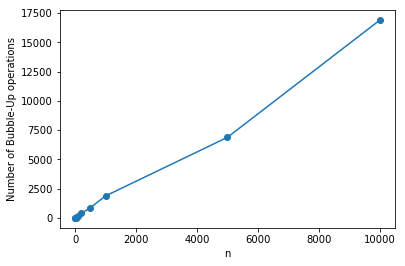

In [105]:
PQ = PriorityQueue()
CC = Count_Complexity()

import random
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
from scipy import stats

CC.bubbleup_ops()
CC.plot_bubble()


[0, 10, 39, 117, 379, 991, 2400, 6586, 15939, 74317, 201038]
Sift-down Operations vs. n : 


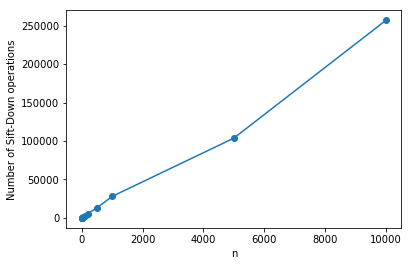

In [106]:
PQ = PriorityQueue()
CC = Count_Complexity()

import random
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
from scipy import stats


CC.siftdown_ops()
CC.plot_sift()

[1, 6, 16, 36, 86, 186, 386, 886, 1886, 6886, 16886]
Bubble-Up Operations vs. n :
[15, 88, 235, 533, 1268, 2741, 5692, 13049, 27936, 103695, 256922]
Sift-down Operations vs. n : 


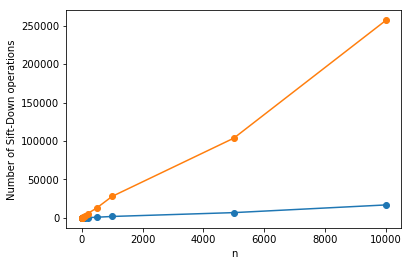

In [107]:
PQ = PriorityQueue()
CC = Count_Complexity()

import random
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import *
from scipy import stats

CC.bubbleup_ops()
CC.plot_bubble()

CC.siftdown_ops()
CC.plot_sift()